<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=7px>
                  <b> Capstone Project: <br> Credit score classification with ML </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="data"></a>
# 1. Data Description

<a id="dataset"></a>
## 1.1 About the DataSet

**ID:** An identifier for each record in the dataset, typically a unique number or code.

**Customer_ID:** An identifier for each customer, which can be used to link multiple records for the same customer.

**Month:** The month or time period to which the data corresponds. It may indicate when the data was collected or when the credit scoring assessment was made.

**Name:** The name of the customer or borrower.

**Age:** The age of the customer, which can be a factor in credit scoring.

**SSN:** The Social Security Number or a unique identification number for the customer, often used for verification purposes.

**Occupation:** The customer's occupation or employment status, which can provide insight into their financial stability.

**Annual_Income:** The customer's total annual income, a key factor in determining creditworthiness.

**Monthly_Inhand_Salary:** The customer's monthly take-home salary after deductions.

**Num_Bank_Accounts:** The number of bank accounts held by the customer, which may indicate financial stability.

**Num_Credit_Card:** The number of credit cards owned by the customer.

**Interest_Rate:** The interest rate associated with a loan or credit, if applicable.

**Num_of_Loan:** The number of loans currently held by the customer.

**Type_of_Loan:** The type or category of the loan(s), such as personal loan, mortgage, or car loan.

**Delay_from_due_date:** The delay in making payments from the due date, which may indicate a history of late payments.

**Num_of_Delayed_Payment:** The number of delayed or missed payments.

**Changed_Credit_Limit:** Whether there has been a change in the customer's credit limit.

**Num_Credit_Inquiries:** The number of times the customer's credit report has been accessed by creditors or lenders.

**Credit_Mix:** The variety of credit types used by the customer, such as credit cards, loans, and mortgages.

**Outstanding_Debt:** The total amount of outstanding debt owed by the customer.

**Credit_Utilization_Ratio:** The ratio of credit used to credit available, often associated with credit cards.

**Credit_History_Age:** The length of the customer's credit history, which can impact credit scores.

**Payment_of_Min_Amount:** Whether the customer has consistently made at least the minimum required payments on loans or credit cards.

**Total_EMI_per_month:** The total Equated Monthly Installments (EMI) paid by the customer.

**Amount_invested_monthly:** The amount the customer invests or saves monthly.

**Payment_Behaviour:** An indicator of the customer's payment behavior, such as "good," "fair," or "poor."

**Monthly_Balance:** The customer's monthly account balance or financial position.

**Credit_Score:** The credit score assigned to the customer based on various factors and calculations, which is often used to assess creditworthiness.


<a id="lib"></a>
## 1.2 Import Libraries

#### Let us import the required libraries.

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# import various functions from sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix

import statsmodels.api as sm

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [2]:
# load the csv file
df = pd.read_csv("train.csv")

# display first five observations using head()
df.head(8)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,21.46538,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,8.0,11.27,4.0,Good,809.98,22.537593,271.0,No,49.574949,21.46538,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,6.0,11.27,4.0,Good,809.98,23.933795,272.0,No,49.574949,21.46538,High_spent_Medium_value_payments,358.124168,Standard


In [3]:
# use 'shape' to check the dimension of data
df.shape

(100000, 28)

**Interpretation:** The data has 100000 observations and 28 variables.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

<a id="dtype"></a>
## 2.2 Check the Data Type

###### Check the data type of each variable. If the data type is not as per the data definition, change the data type.¶

In [5]:
# use 'dtypes' to check the data type of a variable
df.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

##### understanding the variables

In [6]:
# nunique(): it is used to identify the number of unique records in the variables
# unique(): it helps us to identify what are the unique records in the variables

In [7]:
print(df["ID"].nunique())
df["ID"].unique()

100000


array([  5634,   5635,   5636, ..., 155627, 155628, 155629], dtype=int64)

In [8]:
print(df["Customer_ID"].nunique())
df["Customer_ID"].unique()

12500


array([ 3392,  8625, 11708, ..., 44897, 34304, 37932], dtype=int64)

In [9]:
print(df["Name"].nunique())
df["Name"].unique()

10128


array(['Aaron Maashoh', 'Rick Rothackerj', 'Langep', ...,
       'Chris Wickhamm', 'Sarah McBridec', 'Nicks'], dtype=object)

In [10]:
df["Interest_Rate"].unique()

array([ 3.,  6.,  8.,  4.,  5., 15.,  7., 12., 20.,  1., 14., 32., 16.,
       17., 10., 31., 25., 18., 19.,  9., 24., 13., 33., 11., 21., 29.,
       28., 30., 23., 34.,  2., 27., 26., 22.])

In [11]:
df["Age"].unique()

array([23., 28., 34., 54., 55., 21., 31., 33., 30., 24., 44., 45., 40.,
       41., 32., 35., 36., 39., 37., 20., 46., 26., 42., 19., 48., 38.,
       43., 22., 16., 18., 15., 27., 25., 14., 17., 47., 53., 56., 29.,
       49., 51., 50., 52.])

The columns **Age, SSN, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age** are having discrete data in the records.The numerical variables in the columns are expected to be intergers. Hence, we will change the data type of above mentioned columns from float to integer.

#### Changing the data types

In [12]:
#Below are the variables changing its data type from float to int.

df["Age"] = df["Age"].astype(int)
df["SSN"] = df["SSN"].astype(int)
df["Num_Bank_Accounts"] = df["Num_Bank_Accounts"].astype(int)
df["Num_Credit_Card"] = df["Num_Credit_Card"].astype(int)
df["Interest_Rate"] = df["Interest_Rate"].astype(int)
df["Num_of_Loan"] = df["Num_of_Loan"].astype(int) 
df["Delay_from_due_date"] = df["Delay_from_due_date"].astype(int)
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(int)
df["Num_Credit_Inquiries"] = df["Num_Credit_Inquiries"].astype(int)
df["Credit_History_Age"] = df["Credit_History_Age"].astype(int)

#### check for data types of variables after changing the dtypes.

In [13]:
df.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                           int32
SSN                           int32
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int32
Num_Credit_Card               int32
Interest_Rate                 int32
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date           int32
Num_of_Delayed_Payment        int32
Changed_Credit_Limit        float64
Num_Credit_Inquiries          int32
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int32
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

<a id="five"></a>
## 2.3 five point summary 

In [14]:
# five point summary for numerical variables
pd.set_option('display.float_format', lambda x: "%.4f" % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0000,80631.5000,43301.4866,5634.0000,43132.7500,80631.5000,118130.2500,155629.0000
Customer_ID,100000.0000,25982.6666,14340.5431,1006.0000,13664.5000,25777.0000,38385.0000,50999.0000
Month,100000.0000,4.5000,2.2913,1.0000,2.7500,4.5000,6.2500,8.0000
Age,100000.0000,33.3163,10.7648,14.0000,24.0000,33.0000,42.0000,56.0000
SSN,100000.0000,500461680.2624,290826734.3862,81349.0000,245168577.2500,500688611.5000,756002666.2500,999993421.0000
Annual_Income,100000.0000,50505.1234,38299.4221,7005.9300,19342.9725,36999.7050,71683.4700,179987.2800
Monthly_Inhand_Salary,100000.0000,4197.2708,3186.4325,303.6454,1626.5942,3095.9050,5957.7150,15204.6333
Num_Bank_Accounts,100000.0000,5.3688,2.5933,0.0000,3.0000,5.0000,7.0000,11.0000
Num_Credit_Card,100000.0000,5.5336,2.0671,0.0000,4.0000,5.0000,7.0000,11.0000
Interest_Rate,100000.0000,14.5321,8.7413,1.0000,7.0000,13.0000,20.0000,34.0000


In [15]:
# five point summary for numerical variables
df.describe(include=object).T

,count,unique,top,freq
Name,100000,10128,Jessicad,48
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28580
Credit_Score,100000,3,Standard,53174


<a id="mv"></a>
# 3. Check for Missing Values

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [16]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
ID,0,0.0000
Customer_ID,0,0.0000
Monthly_Balance,0,0.0000
Payment_Behaviour,0,0.0000
Amount_invested_monthly,0,0.0000
Total_EMI_per_month,0,0.0000
Payment_of_Min_Amount,0,0.0000
Credit_History_Age,0,0.0000
Credit_Utilization_Ratio,0,0.0000
Outstanding_Debt,0,0.0000


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="outlier"></a>
# 4. Outliers:

<a id="detect"></a>
### 4.1 Outliers Detection:

Using Boxplots to identify and visualize outliers in numerical data.

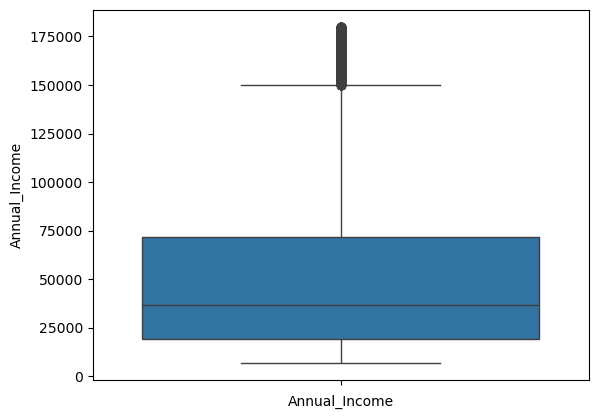

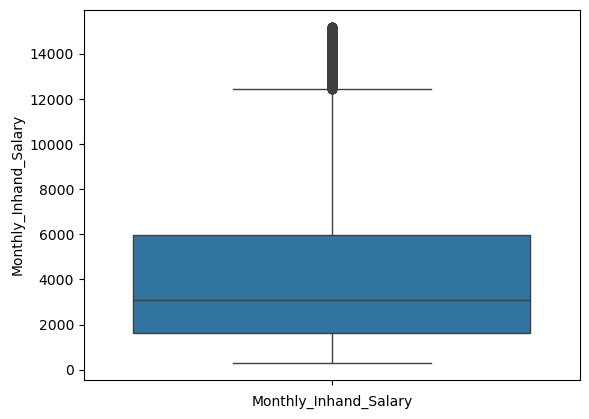

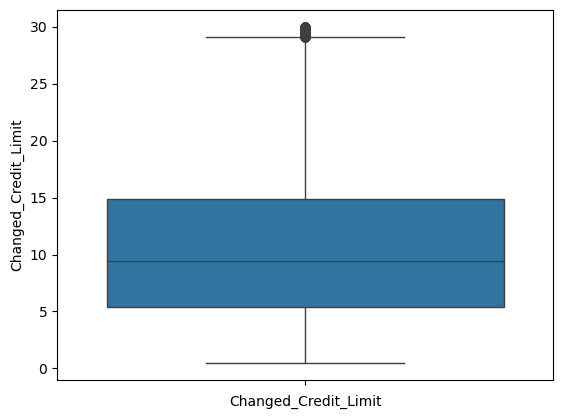

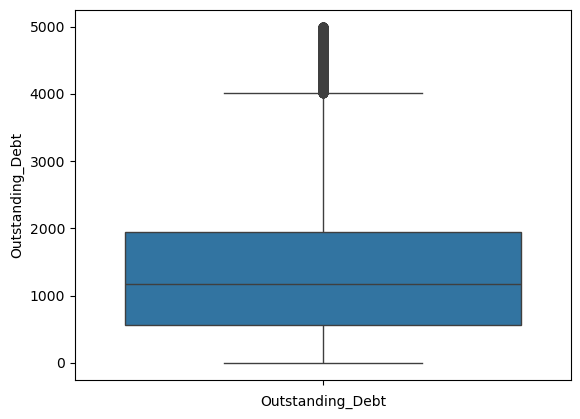

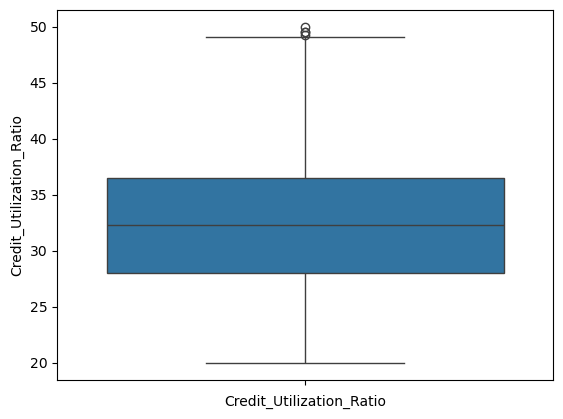

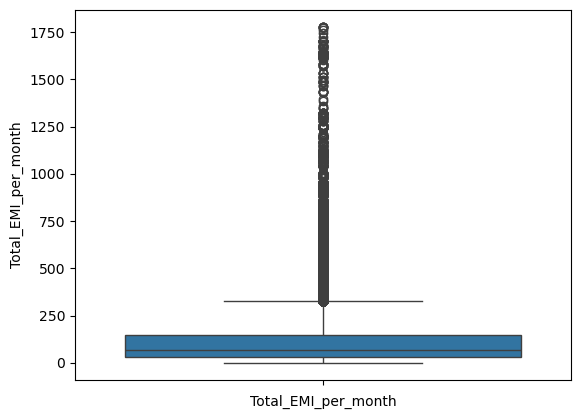

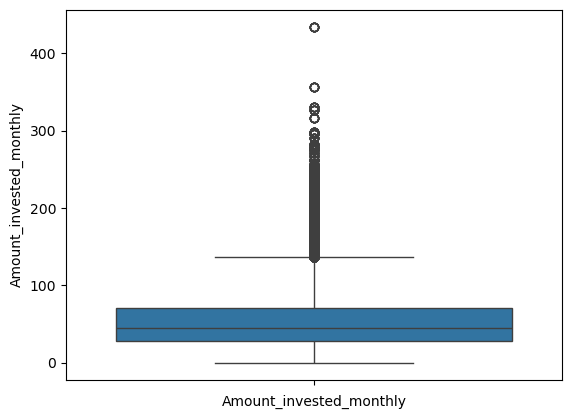

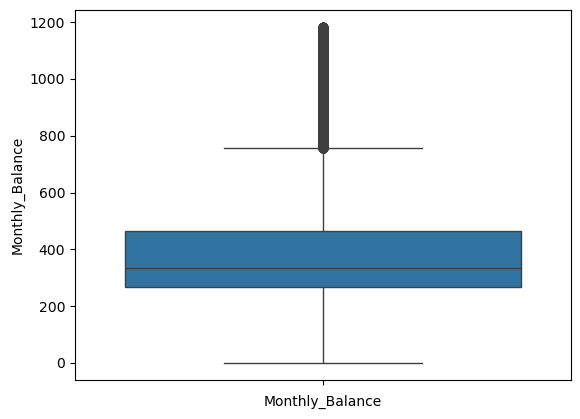

In [17]:
for i in df.columns:
    if df[i].dtypes == np.number :
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

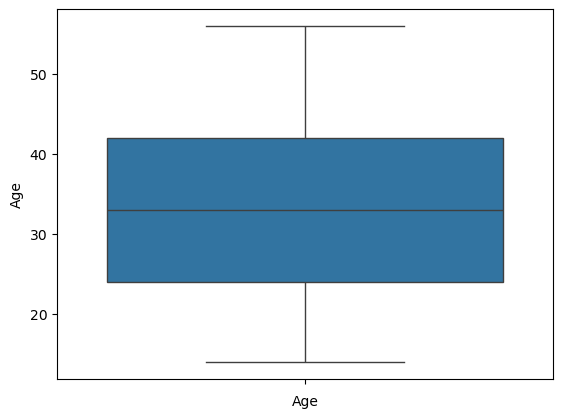

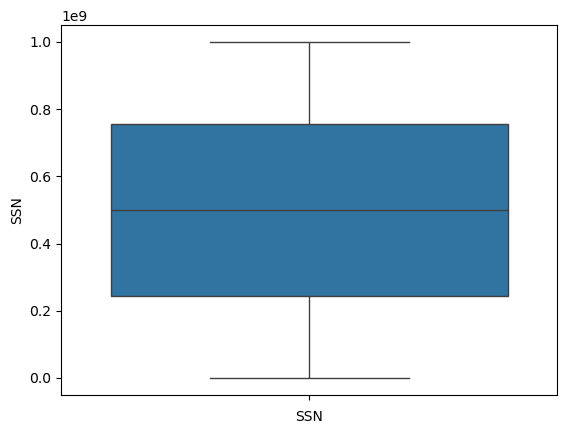

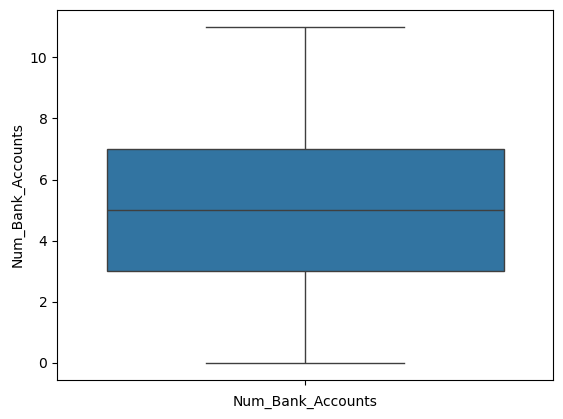

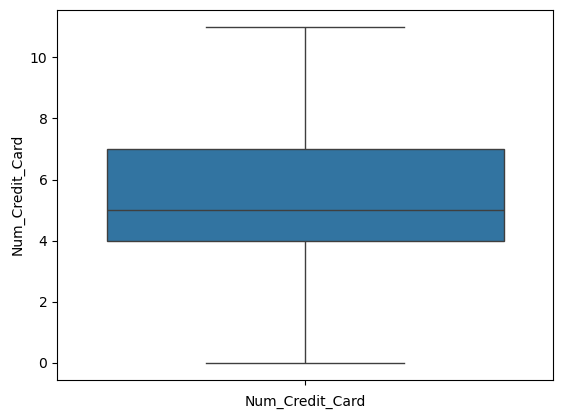

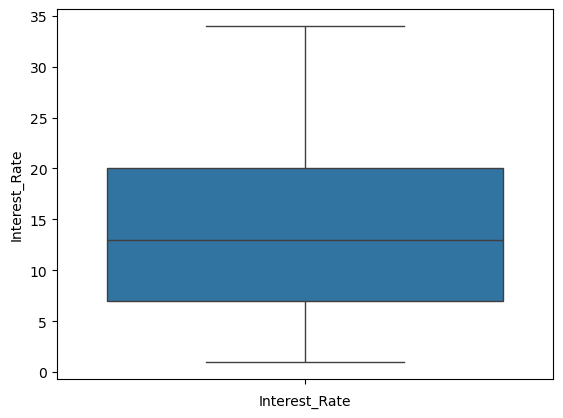

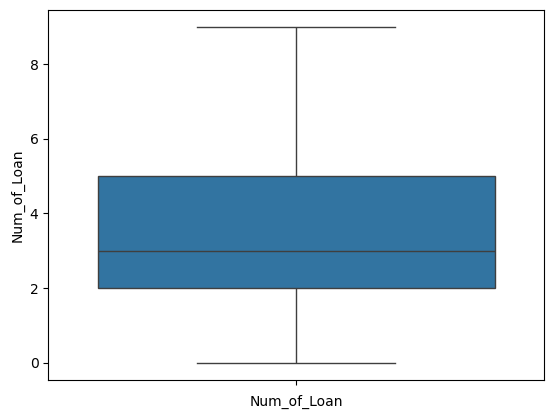

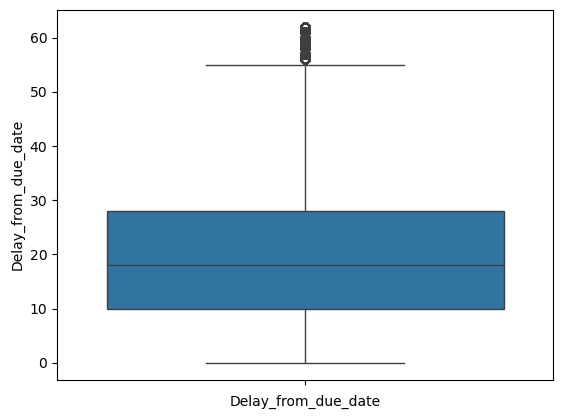

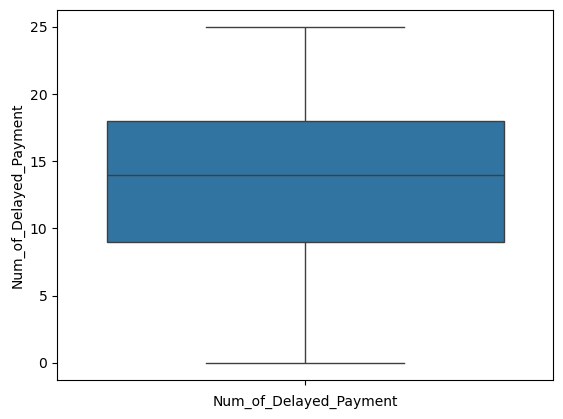

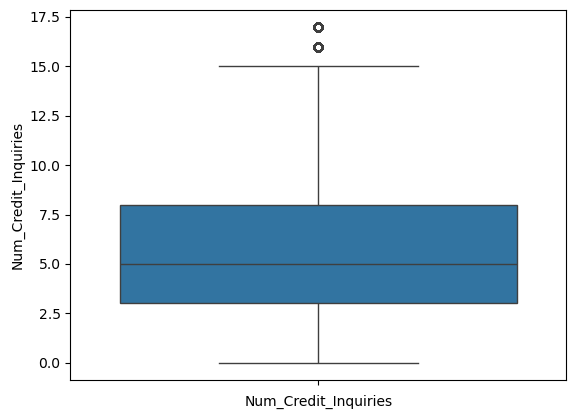

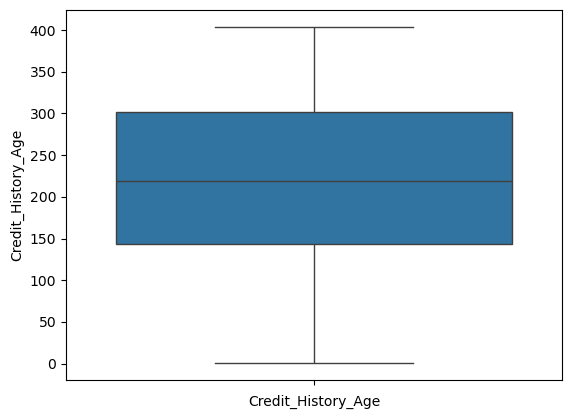

In [18]:
for i in df.columns:
    if df[i].dtypes == int :
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

**Interpretation:**

From the above boxplots we have observed that, the columns **Annual_Income, Monthly_Inhand_Salary, Changed_Credit_Limit, 
Outstanding_Debt, Credit_Utilization_Ratio, Total_EMI_per_month, Amount_invested_monthly, Monthly_Balance, Delay_from_due_date, Num_Credit_Inquiries** has the outliers.

<a id="treat"></a>
### 4.2 **Treating of Outliers:**

- Outliers represent natural variations and are genuine observations, not errors. Removing or altering these can result in a loss of valuable information about the underlying data distribution.
- Treating outliers can significantly alter the distribution of the data, which can be undesirable if the original distribution shape is important for the analysis or model being used.
- In this case, the outliers are providing valuable information that should not be discarded or are simply a natural part of the financial behavior patterns
- For example, the financial data like Annual_Income or Monthly_Inhand_Salary, high values could represent individuals with high earnings, which is a natural part of the income distribution. Treating these as outliers and removing them could distort the true economic variation present in the dataset. <br> In credit modeling, variables like Changed_Credit_Limit, Outstanding_Debt, or Credit_Utilization_Ratio may have outliers that are actually informative for predicting creditworthiness

<a id="univar"></a>
# 5. Univariate Analysis

The univariate analysis focuses on a single variable in the data. The main purpose of this type of analysis is to understand each variable in the data using various statistical and visualization techniques. It helps to study the pattern in each variable. The univariate analysis contains various techniques for numerical as well as a categorical variable.

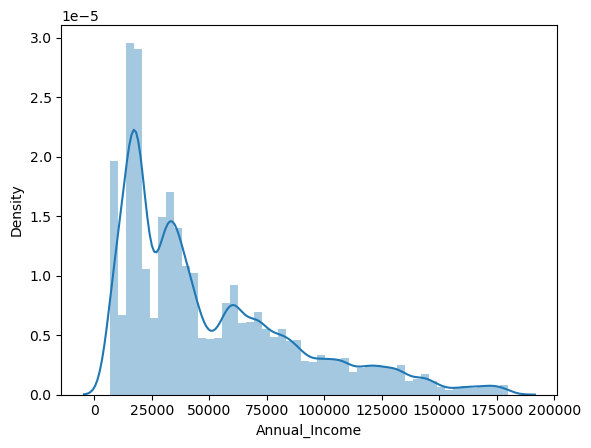

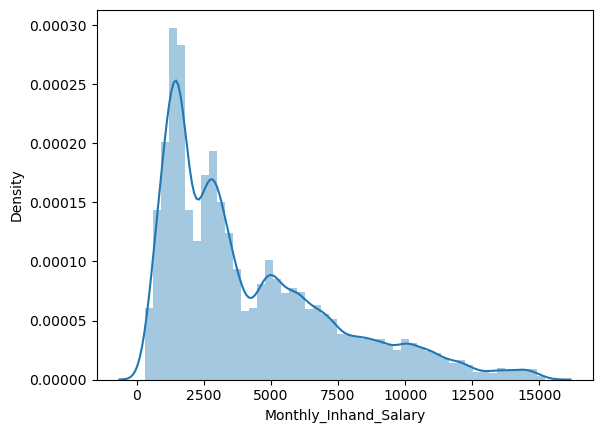

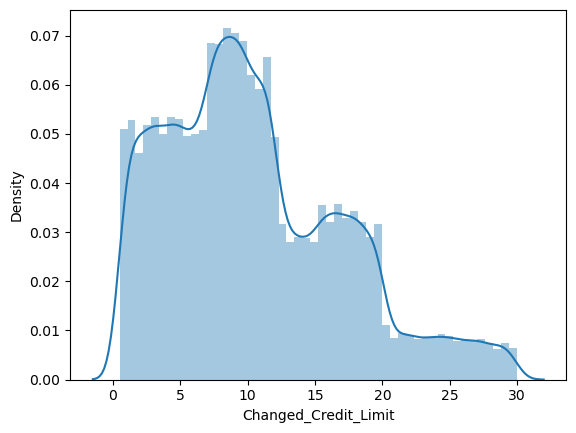

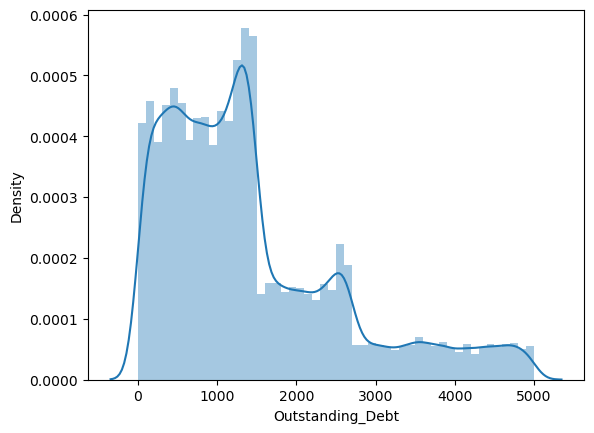

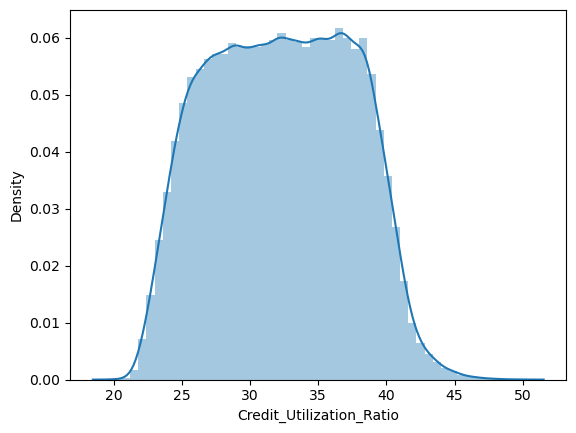

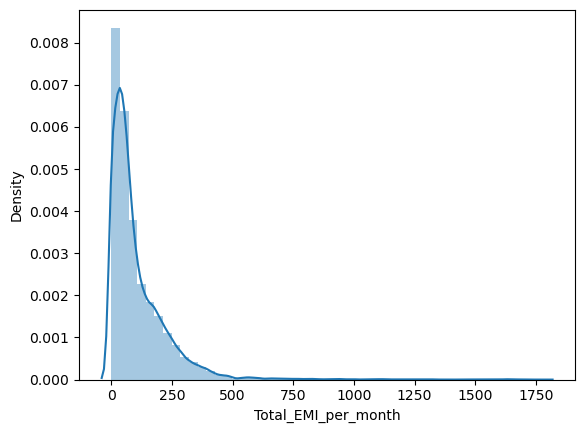

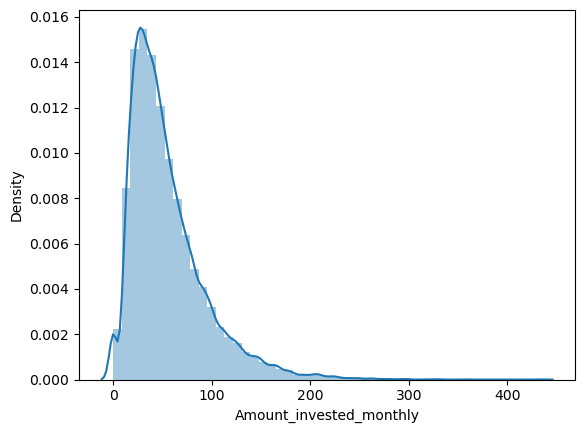

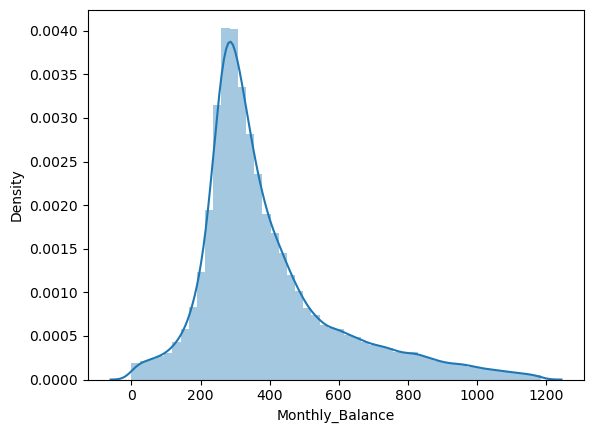

In [19]:
# Distplot for the numerical variables

for i in df.columns:
    if df[i].dtypes == np.number :
        sns.distplot(df[i])
        plt.xlabel(i)
        plt.show()

**INTERPRETATION :**

**Annual_Income:**
- The distribution of Annual_Income shows most individuals having lower annual income levels, with the histogram peaking in that lower range.
- The distribution is moderately right-skewed, suggesting that while the bulk of individuals have an income within a common lower range, there is a smaller number of individuals with much higher annual incomes.
- The long tail to the right indicates a few customers in the dataset with significantly higher incomes, which may include outliers or individuals with particularly high earnings.

**Monthly_Inhand_Salary:**
- The distribution of Monthly_Inhand_Salary is moderate right skewness present in the distribution, indicating that although the majority of the dataset's individuals earn a lower monthly salary, there is a tail of customers who earn significantly more.
- The tapering tail to the right suggests the there are fewer people with very high salaries compared to those with more common salary levels.

**Changed_Credit_Limit:**
- The distribution of Changed_Credit_Limit shows that most credit limit change values are concentrated around the lower end, which is indicated by the peak of the histogram. This suggests that the majority of credit limit changes were relatively small.
- There is moderate right skewness in the distribution, which implies that while most changes to credit limits were minor, there is a smaller subset of customers experiencing larger increases in their credit limits.
- The presence of the long tail to the right indicates that significant credit limit increases are less common but do occur for some customers.

**Outstanding_Debt:**
- The distribution is approximately symmetric with a slight right skewness, suggesting that while most customers have an average amount of debt, there are some with considerably higher amounts of debt.
- The generally symmetric shape of the distribution, however, implies that the customer base has a balanced amount of debt, with neither low nor high extremes predominating disproportionately.

**Credit_Utilization_Ratio:**
- The distribution of the credit utilization ratio seems to be fairly uniform with multiple peaks, indicating that there is no single common ratio amongst customers. This might suggest a diverse range of credit usage behavior among customers.
- There is no dominant skewness in the graph, but there are customers with higher ratios as indicated by the tail extending to higher values.

**Total_EMI_per_month:**
- The x-axis represents the Total EMI per month values, which indicate the amount of money customers are paying towards their debts on a monthly basis. The y-axis shows the frequency of these EMI values within the dataset.
- The distribution appears to have a right-skewed shape, with a peak in the lower region of the EMI range. This suggests that a majority of customers have a lower monthly EMI, with a decreasing number of customers as the EMI amount increases.
- There's also a long tail stretching towards higher EMI amounts, indicating that a small proportion of customers have a significantly higher monthly debt obligation.

**Amount_invested_monthly:**
- The distribution appears to be right-skewed, indicating that a larger number of customers invest lower amounts monthly, with fewer customers investing higher amounts.
- The peak of the distribution lies in the lower end of the investment range, which suggests that typical monthly investments are not very high for most customers.
- Some customers do invest significantly higher amounts, as we can see by the long tail extending to the right, although such cases are less common.

**Monthly_Balance:**
- The distribution of Monthly_Balance reveals a peak in the lower region, indicating that most customers tend to have a lower monthly balance in their accounts.
- The graph shows moderate right skewness, signaling that the majority of customers maintain a lower balance while there are relatively fewer customers with a much higher monthly balance.
- The long tail extending to higher balance values suggests that some customers have substantially higher balances, although this is not the norm.

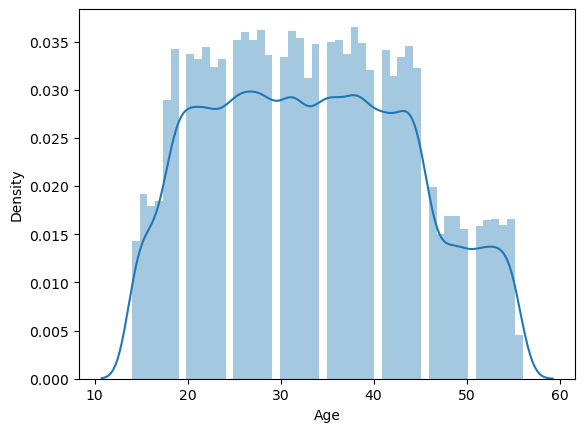

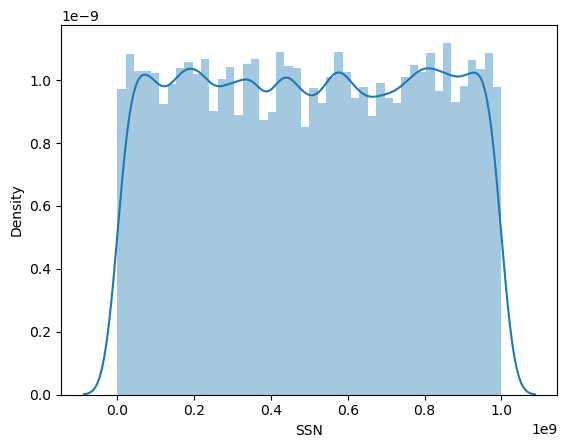

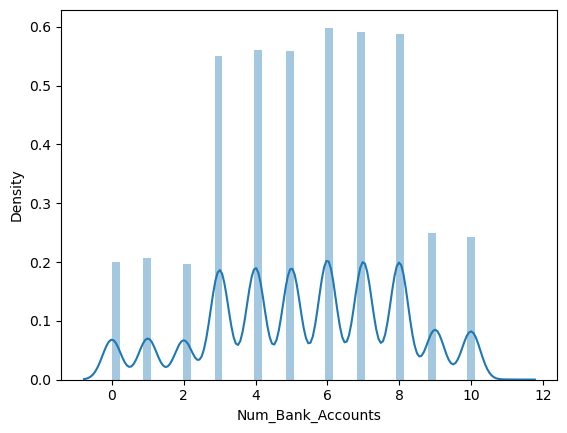

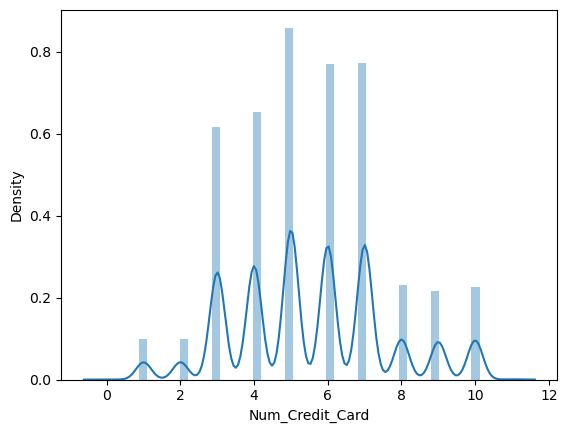

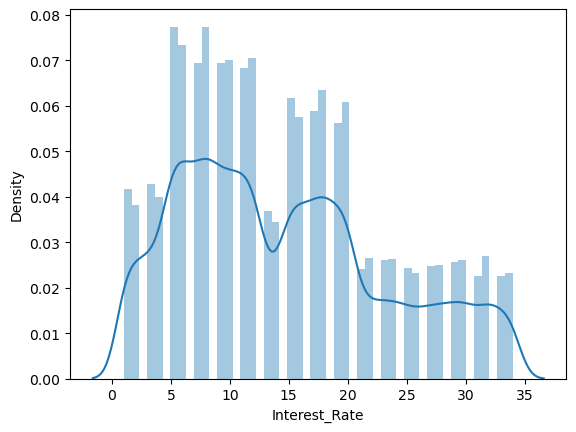

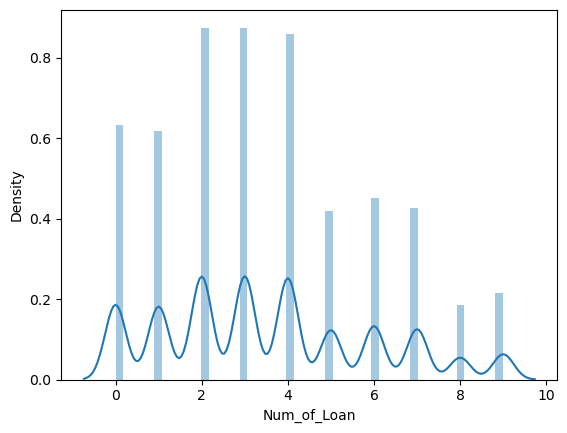

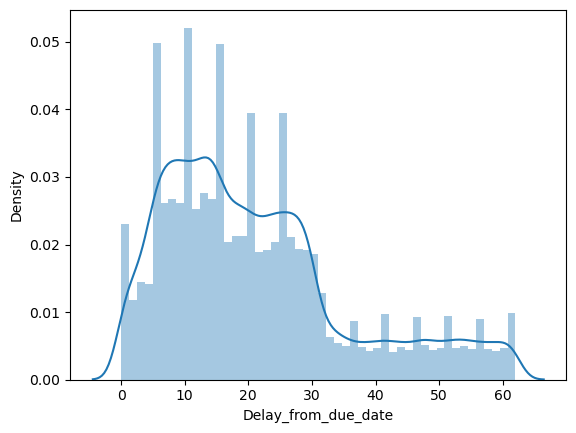

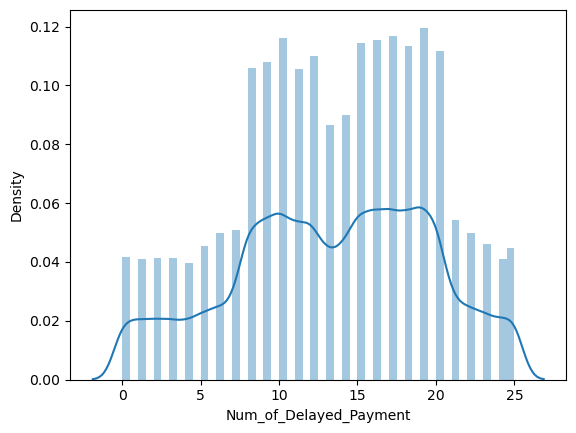

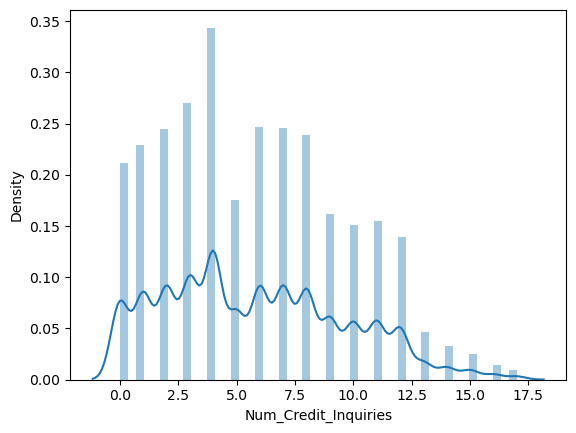

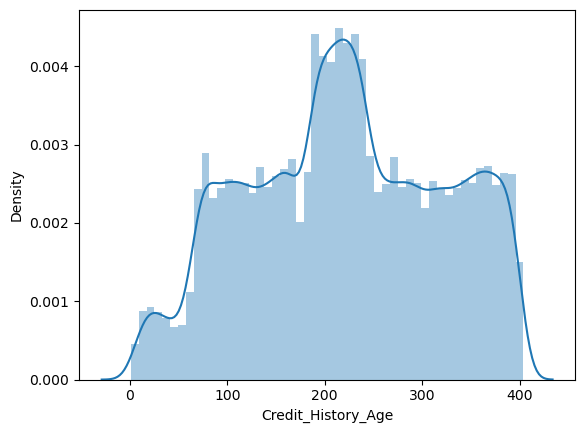

In [20]:
# Distplot for the numerical variables

for i in df.columns:
    if df[i].dtypes == int :
        sns.distplot(df[i])
        plt.xlabel(i)
        plt.show()

**Interpretation :**

**Age:** 
The age distribution shows a concentration in certain age ranges, possibly indicating a majority of customers belong to specific age groups.

**SSN (Social Security Number):** 
The plot suggests a uniform distribution of SSN values. This is expected as SSN is a unique identifier for individuals.

**Num_Bank_Accounts:** This plot shows the number of bank accounts held by customers. It appears right-skewed, indicating most customers have fewer bank accounts, with a few having many accounts.

**Num_Credit_Card:** The distribution of the number of credit cards held by customers is also right-skewed, suggesting most customers have fewer credit cards.

**Interest_Rate:** The distribution of interest rates could indicate the range of rates applied to different financial products held by customers.

**Num_of_Loan:** The number of loans taken by customers is skewed to the right, indicating most customers have fewer loans.

**Delay_from_due_date:** This variable indicates the days of delay from the due date for payments. It appears right-skewed, suggesting most payments are made close to the due date, with fewer instances of long delays.

**Num_of_Delayed_Payment:** The distribution suggests that while most customers have a lower number of delayed payments, there are some with higher instances of delays. This information is crucial for assessing the creditworthiness and potential risk associated with each customer.

**Num_Credit_Inquiries:** The number of credit inquiries is right-skewed, meaning most customers have fewer inquiries.

**Credit_History_Age:** The distribution of credit history age is likely to be right-skewed, indicating that most customers have a shorter credit history.


<Axes: xlabel='Credit_Score', ylabel='count'>

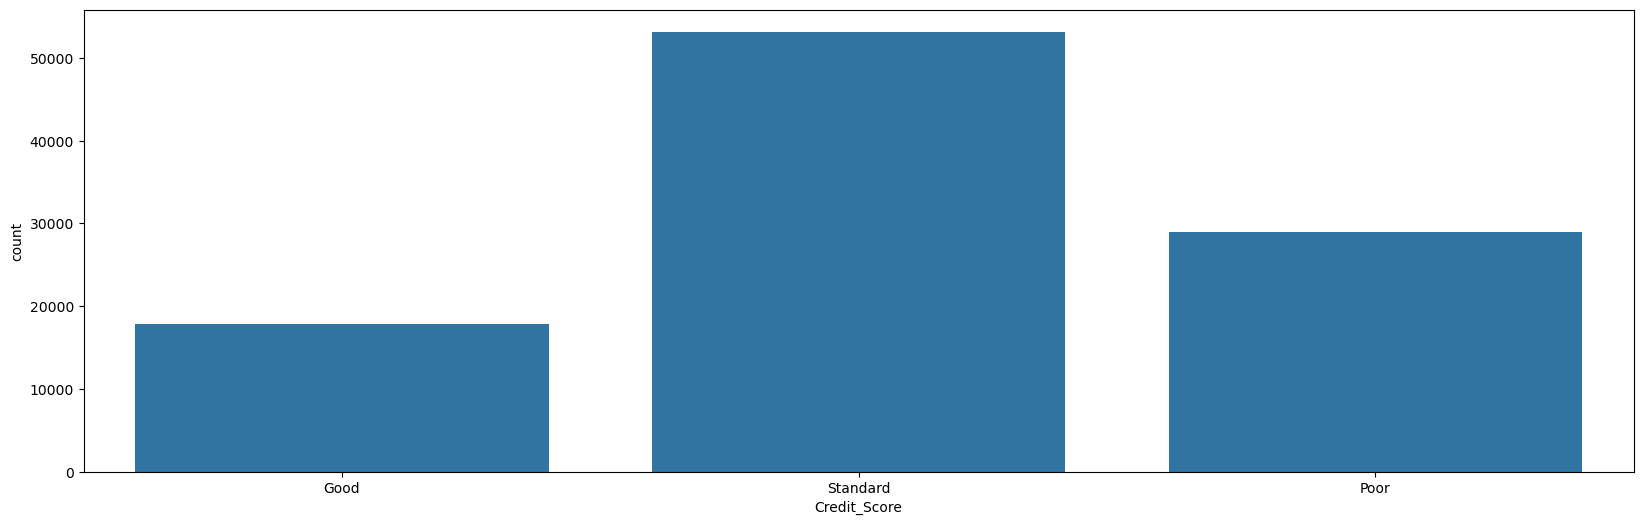

In [21]:
# Count plot for credit score

plt.figure(figsize=(20, 6))
sns.countplot(x='Credit_Score', data=df)

The count plot of 'Credit_Score' visually represents the frequency of each credit score category within the dataset. It helps to quickly identify the most common and least common credit score ratings among the customers, indicating the general creditworthiness distribution of the customer base. This information is vital for understanding the risk profile and financial health of the customers.

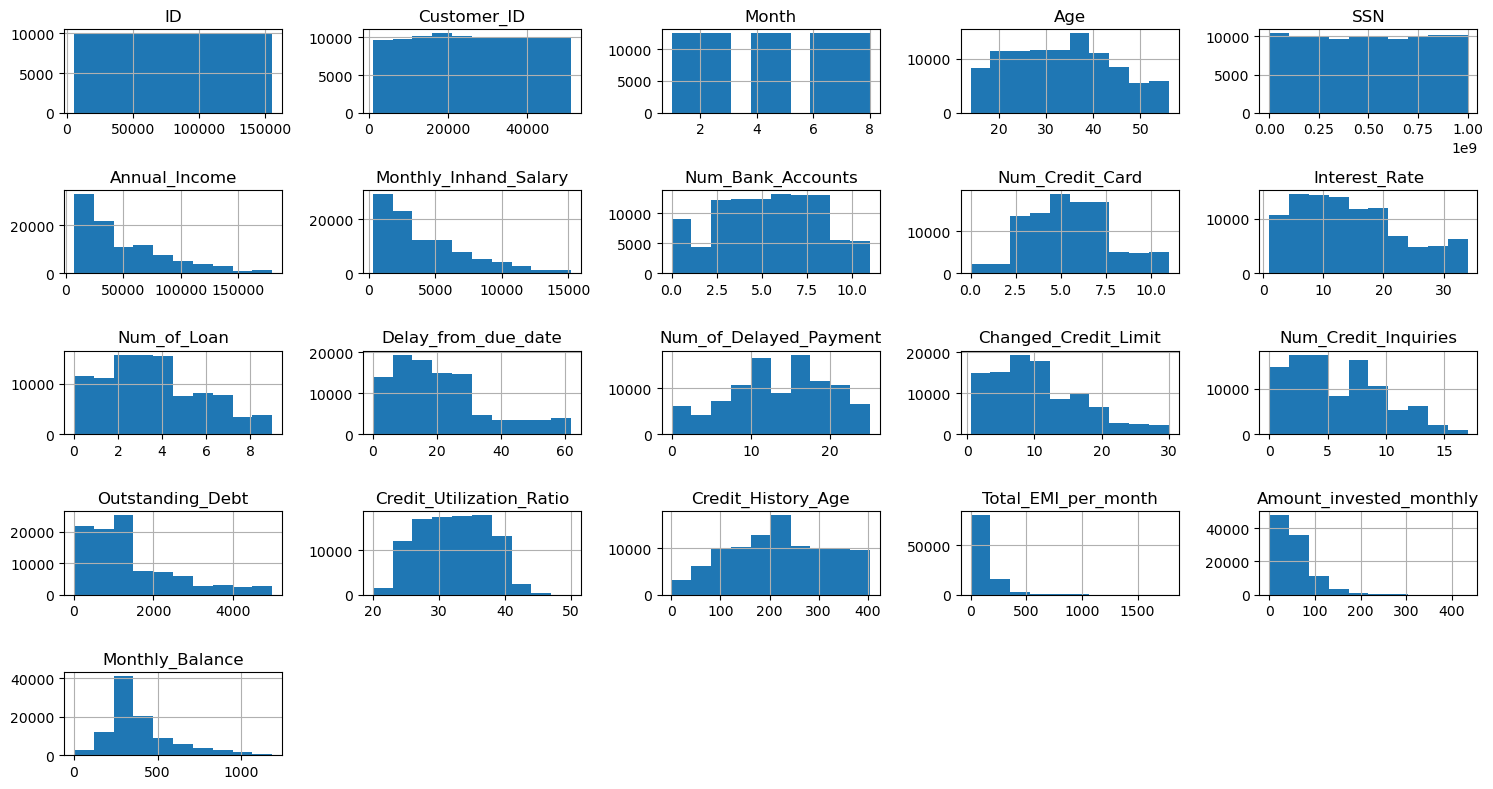

In [22]:
plt.rcParams['figure.figsize'] = [15,8]

# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
df.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**Interpretation:**
The above plot allows for a comparative analysis of the distributions accross the numerical variables 

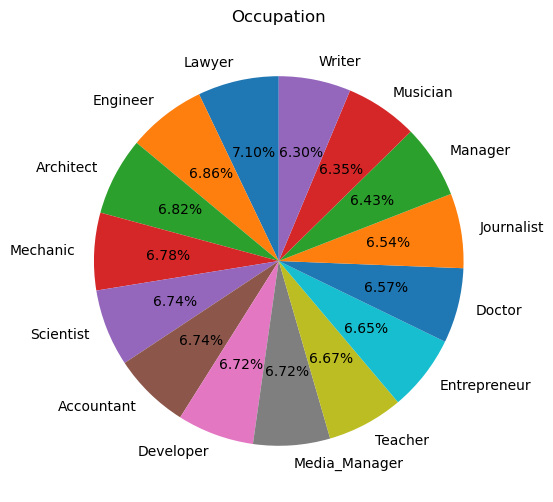

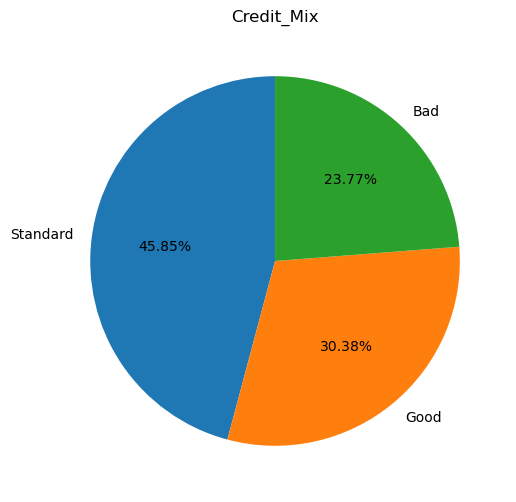

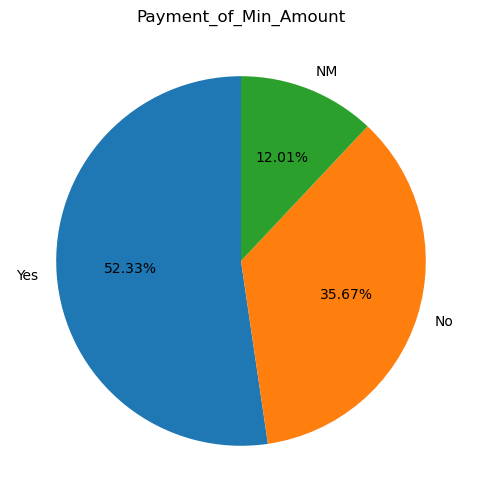

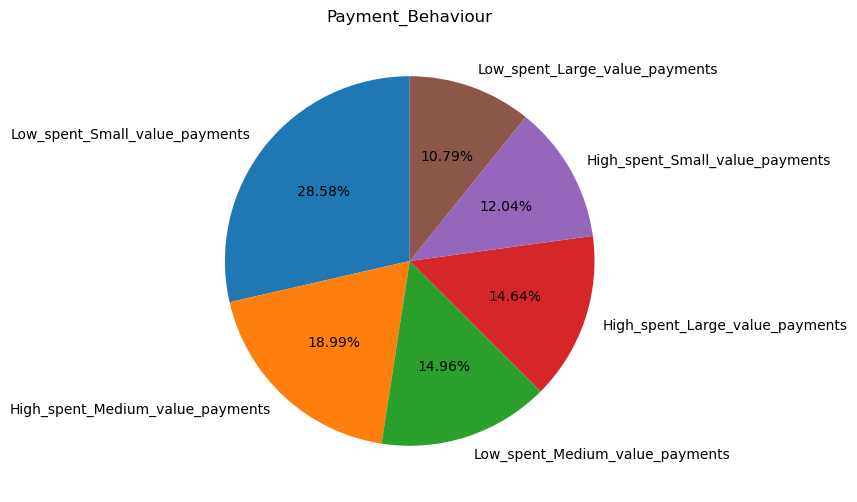

In [23]:
df_cat_uni = df[["Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"]]
for i in df_cat_uni:
    occupation_counts = df[i].value_counts()
    labels = occupation_counts.index

    # Set up the pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(occupation_counts, labels=labels, autopct='%.2f%%', startangle=90)

    # Add a title
    plt.title(i)

    # Show the plot
    plt.show()

<a id="bivar"></a>
# 6. Bivariate Analysis:

Bivariate analysis is the analysis of two variables (attributes).<br>
Now, we will explore the association between each variable of the dataset and the target variable to find the relationship between them.

<a id="cat"></a>
### 6.1 Categorical Vs Categorical

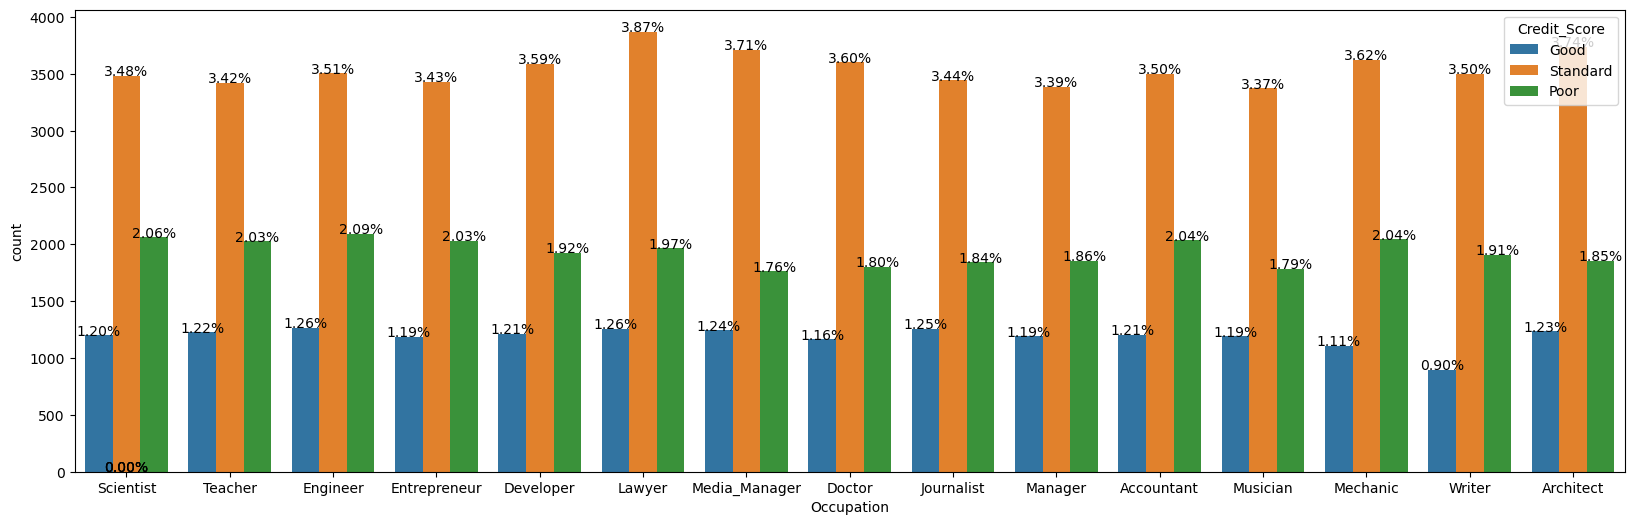

In [24]:
# Relationship between "Occupation" and "Credit Score" 
# Can provide insights into how different occupations might correlate with creditworthiness

plt.figure(figsize=(20, 6))
ax = sns.countplot(x='Occupation', hue='Credit_Score', data=df) 

# Add percentage annotations
total = len(df['Occupation'])
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., height + 0.1, f'{height/total:.2%}', ha="center")
    
# Display the plot
plt.show()

**Interpretation:**

- **Occupational Insights:** Some occupations, such as Lawyers, Media Managers, and Doctors, have a slightly higher percentage of 'Standard' credit scores. In contrast, occupations like Writer and Architect have a higher percentage of 'Poor' credit scores compared to other occupations.

- **Overall Interpretation:** The majority of individuals in the dataset have 'Standard' credit scores across various occupations, with 'Good' creditworthiness also being common, while 'Poor' credit scores are less frequent. This indicates a general trend of positive credit status among the professions sampled, with relatively small variations between different jobs.

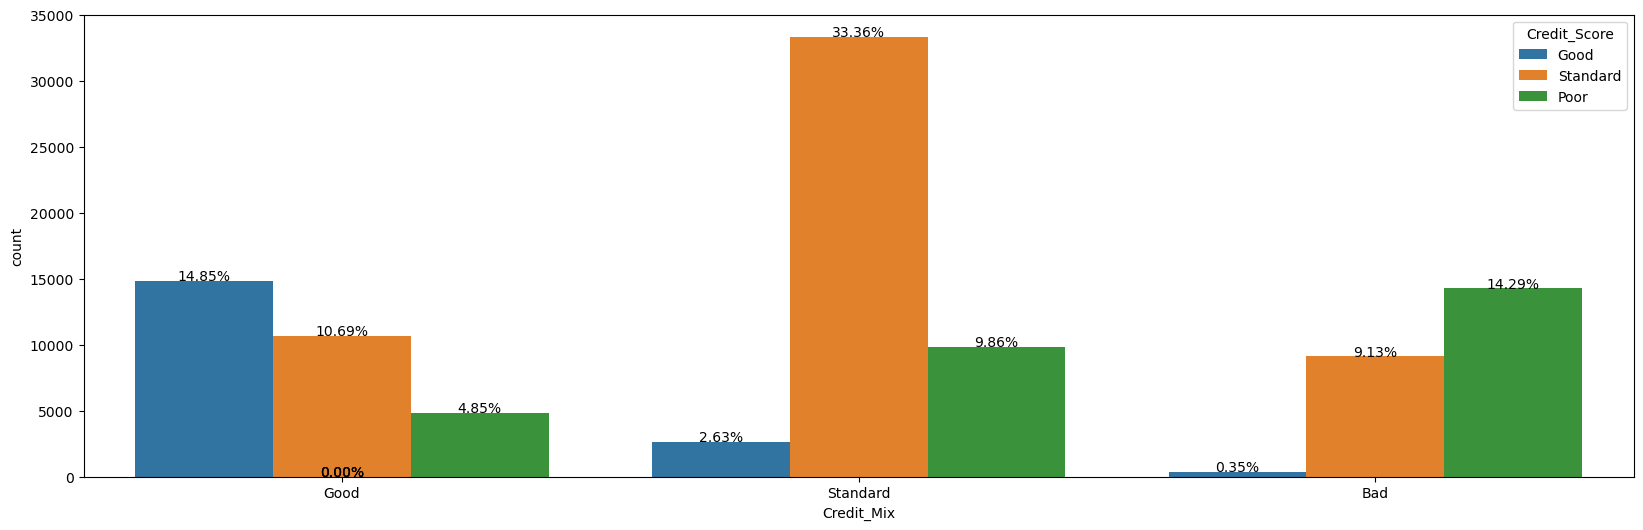

In [25]:
# Relationship between "Credit_Mix" and "Credit Score" 
# Can provide insights into how different Credit_Mix might correlate with creditworthiness

plt.figure(figsize=(20, 6))
ax = sns.countplot(x='Credit_Mix', hue='Credit_Score', data=df)

# Add percentage annotations
total = len(df['Credit_Mix'])
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., height + 0.1, f'{height/total:.2%}', ha="center")
    
# Display the plot
plt.show()

**Interpretation:**

- The 'Standard' credit mix has a higher percentage of 'Standard' credit scores compared to the 'Good' and 'Bad' credit mix category. This could indicate that individuals with a standard mix of credit might be maintaining or improving their creditworthiness effectively.
- The 'Bad' credit mix has the lowest counts for 'Good' and 'Standard' credit scores, with very small percentages (0.35% and 9.13%, respectively), reinforcing the negative impact of a bad credit mix on credit score ratings.

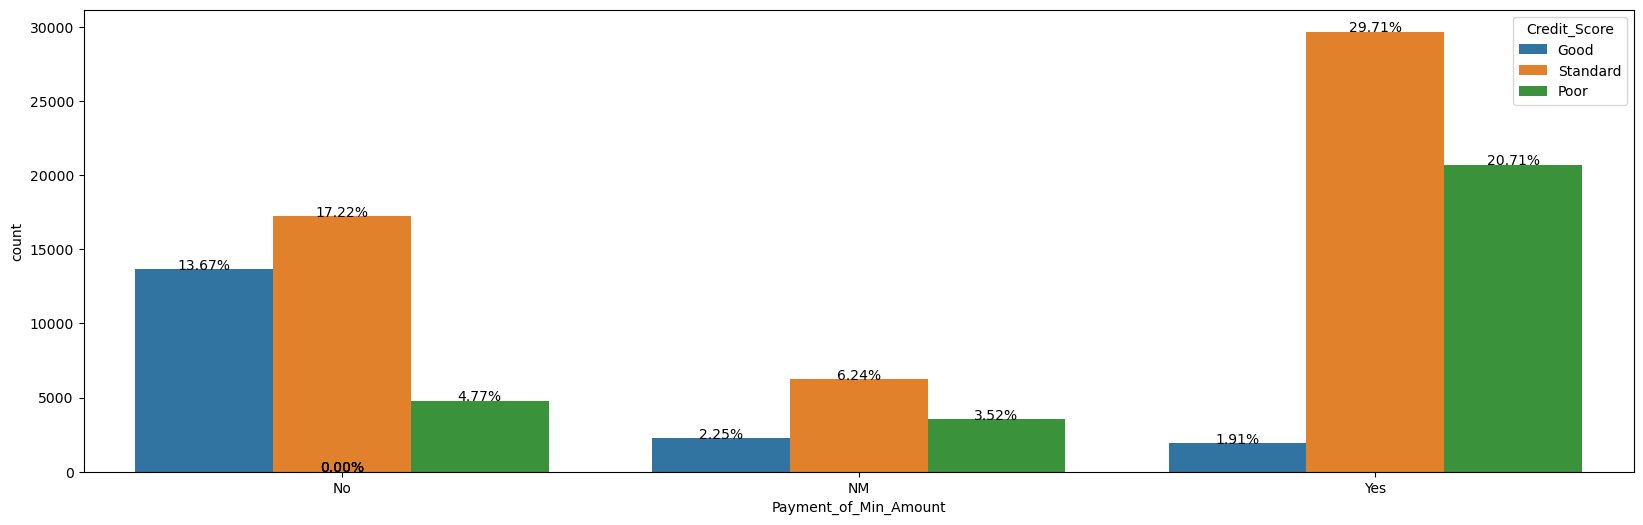

In [26]:
# Relationship between "Payment_of_Min_Amount" and "Credit Score" 
# Can provide insights into how different Payment_of_Min_Amount might correlate with creditworthiness

plt.figure(figsize=(20, 6))
ax = sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=df)

# Add percentage annotations
total = len(df['Payment_of_Min_Amount'])
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., height + 0.1, f'{height/total:.2%}', ha="center")
    
# Display the plot
plt.show()

**Interpretation:**
- The plot suggests that there is a positive correlation between making minimum payments and having a standard credit score, which is consistent with general expectations about credit behavior. Those who consistently make minimum payments are likely to have better credit scores. 
- Conversely, not making minimum payments appears to be associated with lower credit scores, although the effect is less pronounced. 
- The "NM" category is less informative without further context, but it may indicate records where payment behavior is unknown or not applicable.

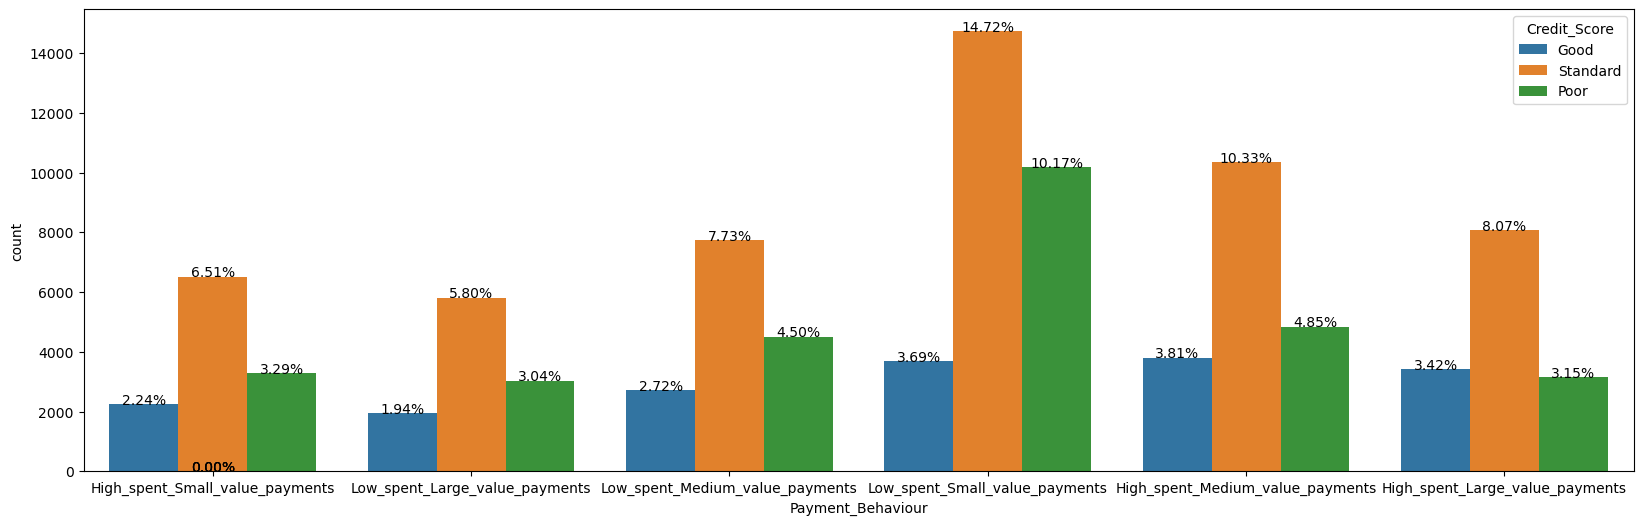

In [27]:
# Relationship between "Payment_Behaviour" and "Credit Score" 
# Can provide insights into how different Payment_Behaviour might correlate with creditworthiness

plt.figure(figsize=(20, 6))
ax = sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df)

# Add percentage annotations
total = len(df['Payment_Behaviour'])
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., height + 0.1, f'{height/total:.2%}', ha="center")
    
# Display the plot
plt.show()

**Interpretation:**
- This visualization suggests a pattern "Low_spent_Small_value_payments" has a relatively balanced distribution across the credit scores, but with a slightly higher percentage of individuals with a "Standard" credit score.
- where higher spending behavior, whether in small, medium, or large payment values, is associated with better credit scores. 
- Conversely, lower spending, particularly in large and medium payment values, might be associated with poorer credit scores. This could imply that those with better credit scores engage more in high spending behaviors, which might reflect their financial stability or management skills that contribute to a higher credit score.

<a id="num"></a>
### 6.2 Numerical vs Categorical

<Axes: xlabel='Annual_Income', ylabel='Occupation'>

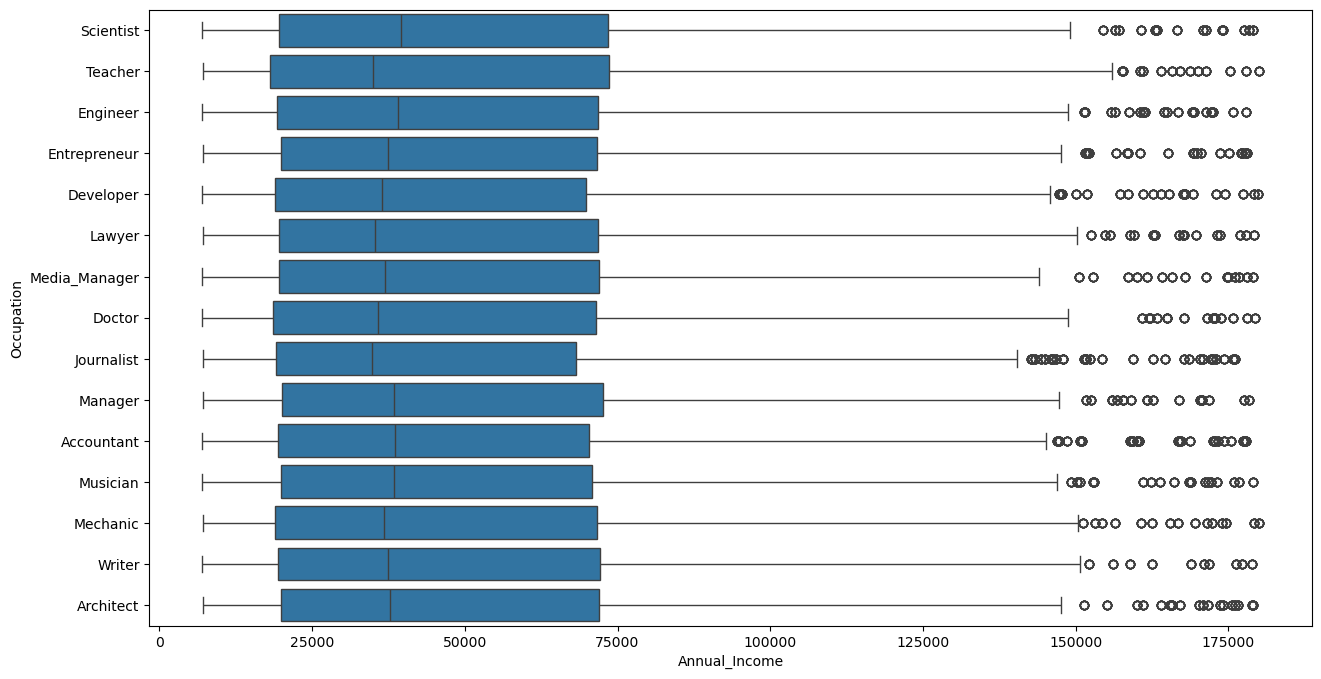

In [28]:
# Relationship between "Annual_Income" and "Occupation" 
# It helps us to understand that the Annual income across different occupation

sns.boxplot(x=df["Annual_Income"], y=df["Occupation"])

**Interpretation:**
- Scientists have the highest median income with substantial variability, while journalists have the lowest.
- Entrepreneurs and lawyers exhibit a broad income range, indicating high earnings potential but also greater income disparity within these professions. 
- Media managers and doctors have many high-income outliers, suggesting that top earners in these fields significantly outpace the average. 

<Axes: xlabel='Outstanding_Debt', ylabel='Credit_Score'>

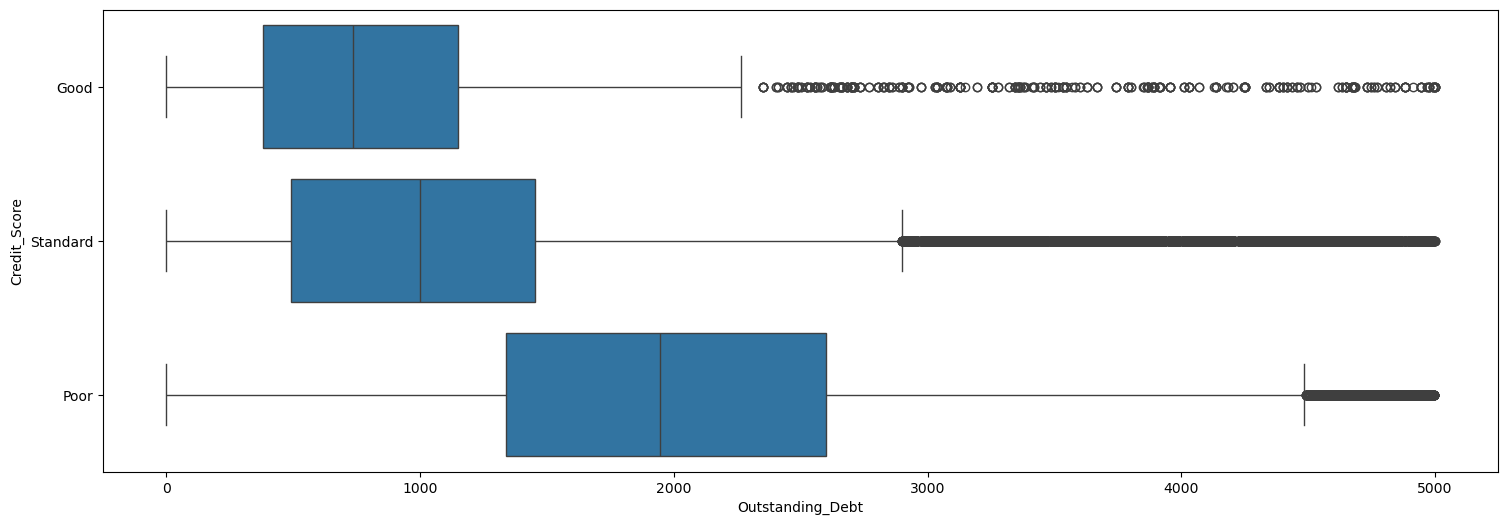

In [29]:
# Relationship between Credit Score and Outstanding_Debt
# This could show if there is a correlation between the amount of debt a person has and their credit score.

plt.figure(figsize=(18, 6))
sns.boxplot(x=df["Outstanding_Debt"], y=df["Credit_Score"])

**Interpretation:**
- **Good Credit Score:** The median outstanding debt for this group is lower than the other two groups, indicating that individuals with good credit scores tend to have less debt. The interquartile range (IQR) is relatively tight, suggesting less variability in debt amounts. However, there are many outliers, indicating that some individuals with good credit scores have significantly higher debt.
- **Standard Credit Score:** This group's median debt is higher than that of the Good category, and the IQR is wider, suggesting more variation in the amount of debt held by individuals with standard credit scores.
- **Poor Credit Score:** The median debt is the highest among the three groups, and the IQR is wide, indicating a high level of variability in debt amounts within this group. The range of debt is also quite extensive, stretching from the lowest to the highest values on the plot.

<Axes: xlabel='Credit_Utilization_Ratio', ylabel='Credit_Score'>

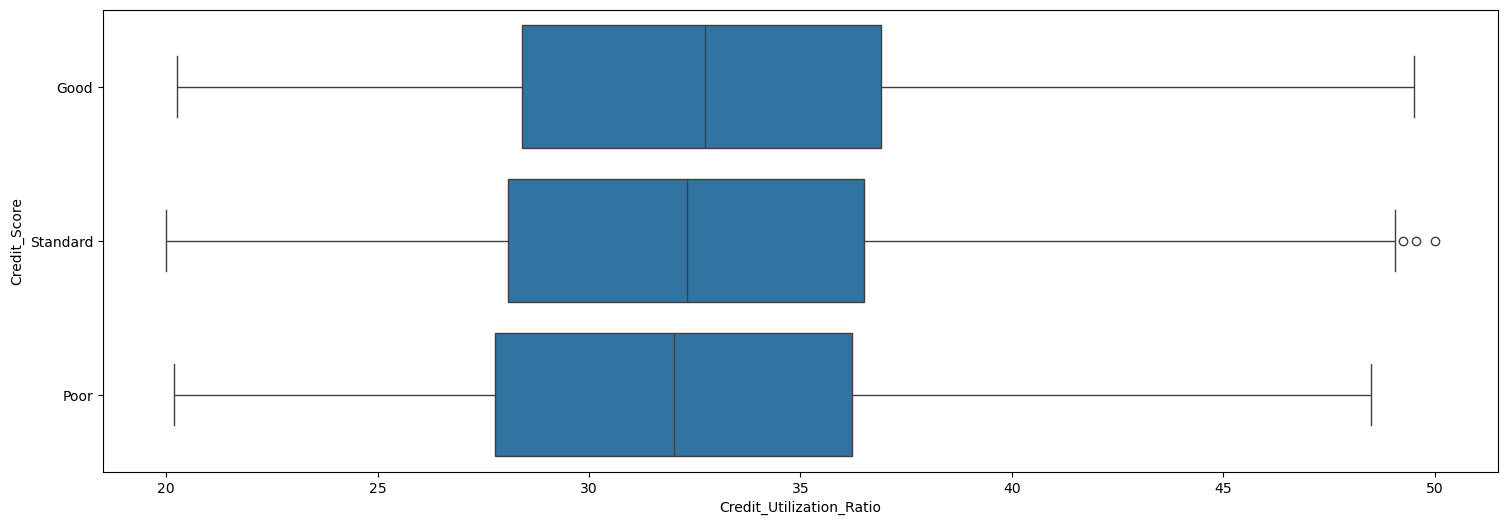

In [30]:
# Relationship between Credit Score and Credit_Utilization_Ratio
# This represents the % of available credit utilized by an individual, playing a crucial role in determining their creditworthiness.

plt.figure(figsize=(18, 6))
sns.boxplot(x=df["Credit_Utilization_Ratio"], y=df["Credit_Score"])

**Interpretation:**

- **Good Credit Score:** This group has a higher median credit utilization ratio compared to the Standard score category, and the IQR is slightly wider, indicating a bit more variability in how much credit is used.

- **Standard Credit Score:** The credit utilization ratios for individuals with Standard credit scores are grouped tightly around the median, with a relatively narrow interquartile range (IQR), indicating consistent credit usage habits. There are some outliers on the higher end, suggesting a few individuals with Standard credit scores who have high credit utilization ratios.

- **Poor Credit Score:** The median credit utilization ratio for individuals with poor credit scores is low.

- The boxplot suggests that individuals with good credit scores tend to have lower and more consistent credit utilization ratios, while those with poor credit scores tend to have higher and more varied ratios. High credit utilization is often associated with higher risk and can negatively impact credit scores.

<Axes: xlabel='Num_Bank_Accounts', ylabel='Credit_Score'>

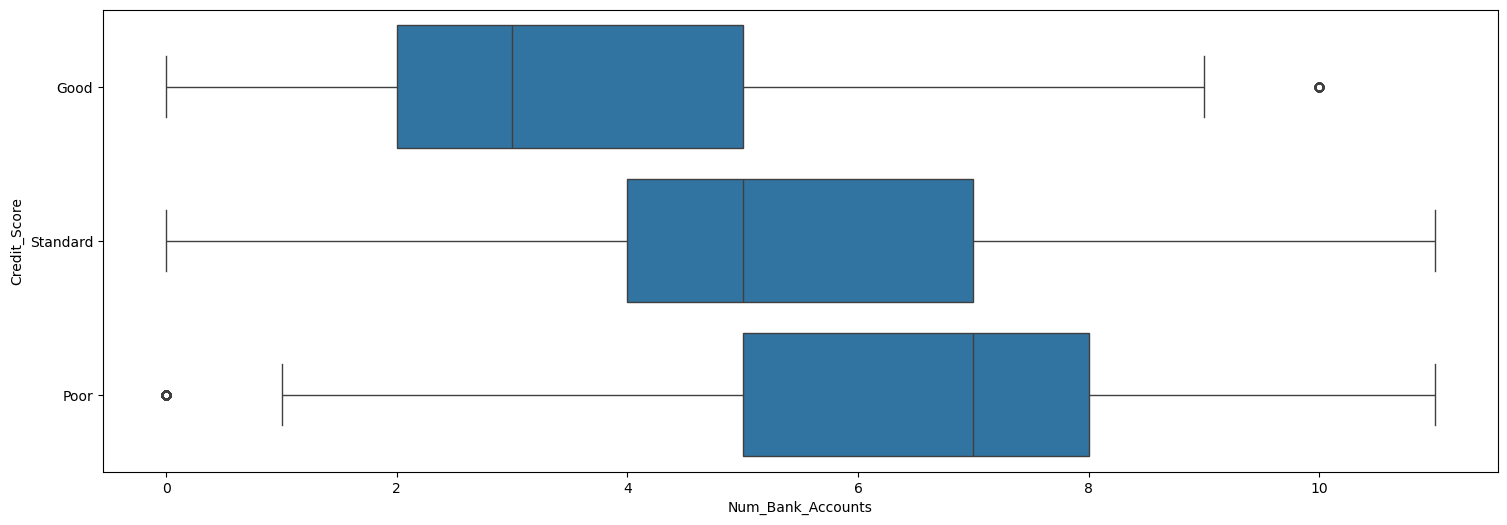

In [31]:
# Relationship between Credit Score and Num_Bank_Accounts
# To see if there is a trend in the number of open credit accounts people with different credit scores have.

plt.figure(figsize=(18, 6))
sns.boxplot(x=df["Num_Bank_Accounts"], y=df["Credit_Score"])

**Interpretation:**
- There is some overlap in the number of bank accounts between the credit score categories, it appears that having a good credit score is associated with having fewer bank accounts, and individuals with standard or poor credit scores have a wider range of bank account numbers. The presence of outliers in Good category suggests that there are exceptions to these trend.

<Axes: xlabel='Num_of_Delayed_Payment', ylabel='Payment_Behaviour'>

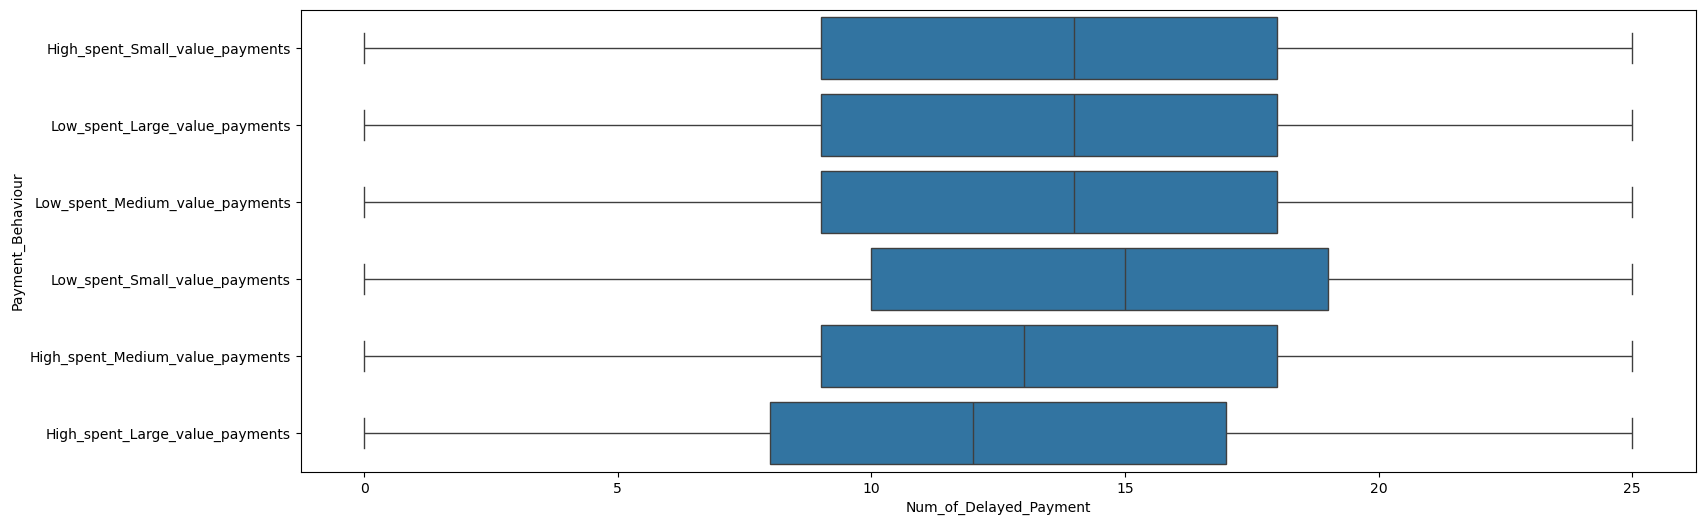

In [32]:
# Relationship between Num_of_Delayed_Payment and Payment_Behaviour
# To see how payment behavior correlates with the frequency of missed payments.

plt.figure(figsize=(18, 6))
sns.boxplot(x=df["Num_of_Delayed_Payment"], y=df["Payment_Behaviour"])

**Interpretation:**
- The plot suggests that individuals who spend high amounts on large value payments tend to have fewer delays in their payments. In contrast, those who spend less, particularly on small value payments, tend to have more delayed payments and greater variability in their payment behavior.

<Axes: xlabel='Age', ylabel='Credit_Score'>

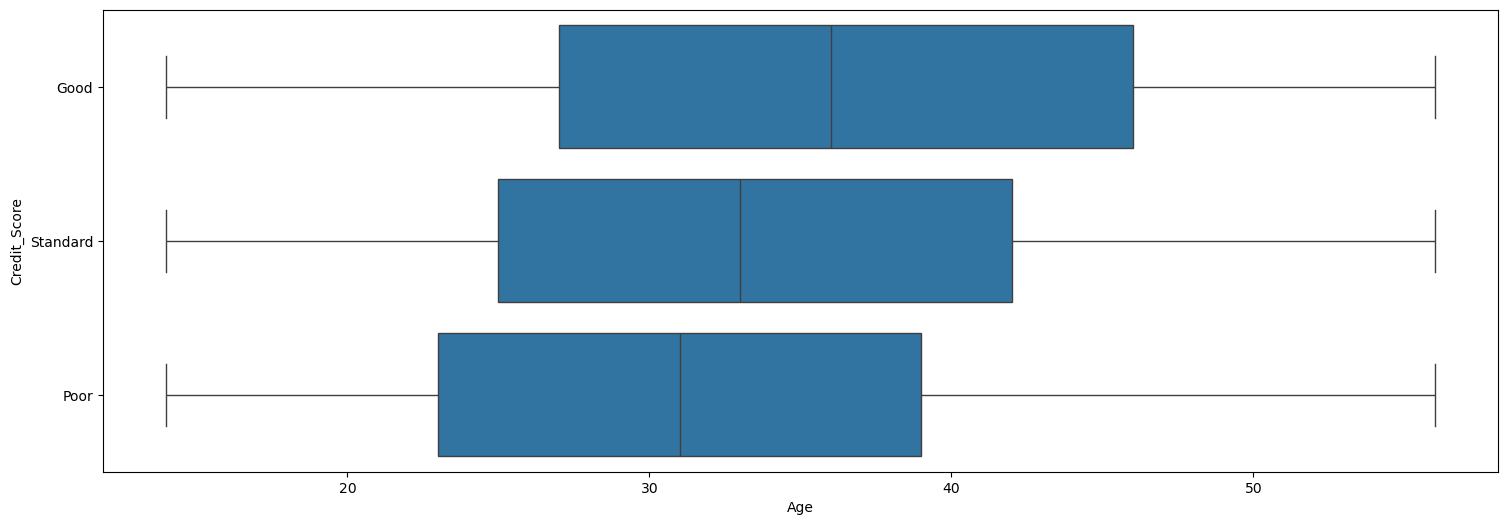

In [33]:
# Relationship between Age and Credit_Score
# To see the credit score across difference age groups

plt.figure(figsize=(18, 6))
sns.boxplot(x=df["Age"], y=df["Credit_Score"])

**Interpretation:**
- It appears that the age distribution is relatively similar across different credit score categories, implying that age might not be a strong differentiator of credit score in this dataset.

<Axes: xlabel='Num_of_Loan', ylabel='Credit_Score'>

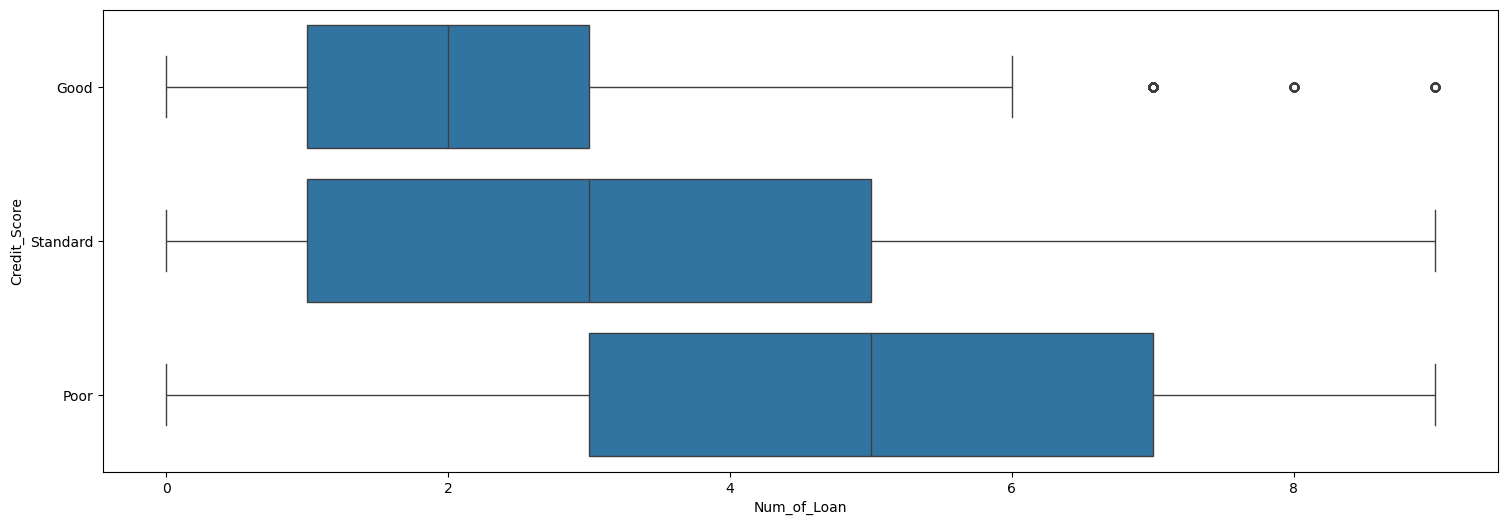

In [34]:
# Relationship between Num_of_Loan and Credit_Score
# To see the credit score of number of loans taken by an individuals

plt.figure(figsize=(18, 6))
sns.boxplot(x=df["Num_of_Loan"], y=df["Credit_Score"])

**Interpretation:**
- There are outliers across Good category, with some customers having a significantly higher number of loans than the average within their respective credit score groups. This implies that some individuals manage to maintain a good credit score despite having many loans, while others with fewer loans might have lower scores.
- There does not seem to be a clear trend that higher numbers of loans are associated with worse credit scores or vice versa based on this boxplot alone.

# 7. Introducing Weights Based on Monthly Values for Enhanced Analysis:

Our dataset comprises detailed credit information spanning 100,000 rows, segmented into records for individual customers.

Each customer's data is presented across eight rows, corresponding to eight distinct months of credit activity. 

Recognizing the varying significance of credit activities over time, we aim to introduce a weighted analysis framework. 

This framework prioritizes recent months' data over older ones, underpinning the premise that recent financial behaviors provide a more accurate reflection of a customer's current creditworthiness.

**Weight Assignment:**

- To implement this weighting, we first calculate a weight for each month's data based on its chronological proximity to the most recent month covered in the dataset. Specifically, we divide the 'Month' column values by 36(1+2+3+4+5+6+7+8). 
- This operation establishes a linearly decreasing weight from the most recent month backward, thereby assigning higher importance to newer data in subsequent analyses.

In [35]:
# Assign weights based on the ratio of the 'Month' column to 36
df["Weights"] = round(df["Month"] / 36, 2)

# Calculate the product of 'Credit_Mix' and 'Month' for each row
df['Weighted_mode_list'] = list(df['Credit_Mix'] * df['Month'])

# Create a new column 'Weighted_mode' containing lists of 'Credit_Mix' repeated 'Month' times
df['Weighted_mode'] = df.apply(lambda row: [row['Credit_Mix']] * row['Month'], axis=1)

# Display the first two rows of the DataFrame
df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Weights,Weighted_mode_list,Weighted_mode
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.1200,1824.8433,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",3,7,11.2700,4,Good,809.9800,26.8226,265,No,49.5749,21.4654,High_spent_Small_value_payments,312.4941,Good,0.0300,Good,[Good]
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.1200,1824.8433,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",3,4,11.2700,4,Good,809.9800,31.9450,266,No,49.5749,21.4654,Low_spent_Large_value_payments,284.6292,Good,0.0600,GoodGood,"[Good, Good]"


- By integrating a temporal weightage system and enhancing the representation of credit mix data, we aim to achieve a more nuanced understanding of customer credit behavior. 
- This approach allows us to prioritize recent financial activities, offering a dynamic perspective on creditworthiness that aligns more closely with current economic conditions and individual circumstances.

# 7.1 Encoding of Categorical Variables

In [36]:
print("Number of unique records :", df["Type_of_Loan"].nunique())
df["Type_of_Loan"]. unique()

Number of unique records : 6261


array(['auto loan,credit-builder loan,personal loan,home equity loan',
       'credit-builder loan', 'auto loan,auto loan,not specified', ...,
       'home equity loan,auto loan,auto loan,auto loan',
       'payday loan,student loan,mortgage loan,not specified',
       'personal loan,auto loan,mortgage loan,student loan,student loan'],
      dtype=object)

Type_of_Loan consist of 6261 unique records and unarraged. Hence, will spilt the records and encode with the unique type of loan

In [37]:
def type_of_loan_split(df):
    
    # Split the strings and create a set of unique items
    unique_items = set()
    
    for item_list in df['Type_of_Loan']:
        
        items = item_list.split(',')
        unique_items.update(items)

    # Create a dictionary to hold binary indicators for each item
    unique_items = list(unique_items)
    indicators = {}
    for item in unique_items:
        indicators[item] = df['Type_of_Loan'].apply(lambda x: item in x).astype(int)

    # Create a new DataFrame with binary indicators
    result_df = pd.DataFrame(indicators)
    
    return result_df

In [38]:
# Concating the categorical variable with encoded-Type of loan

df1 = pd.concat([df, type_of_loan_split(df)], axis=1).drop('Type_of_Loan', axis=1)
print(df1.shape)
df1.head(2)

(100000, 40)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Weights,Weighted_mode_list,Weighted_mode,not specified,mortgage loan,No Data,home equity loan,credit-builder loan,debt consolidation loan,personal loan,payday loan,auto loan,student loan
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.1200,1824.8433,3,4,3,4,3,7,11.2700,4,Good,809.9800,26.8226,265,No,49.5749,21.4654,High_spent_Small_value_payments,312.4941,Good,0.0300,Good,[Good],0,0,0,1,1,0,1,0,1,0
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.1200,1824.8433,3,4,3,4,3,4,11.2700,4,Good,809.9800,31.9450,266,No,49.5749,21.4654,Low_spent_Large_value_payments,284.6292,Good,0.0600,GoodGood,"[Good, Good]",0,0,0,1,1,0,1,0,1,0


In [39]:
df1["unknown"] = np.where(np.logical_or(df1["No Data"]==1, df1["not specified"]==1),1,0)
df1.drop(columns = ["No Data","not specified"],inplace = True)
df1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Weights,Weighted_mode_list,Weighted_mode,mortgage loan,home equity loan,credit-builder loan,debt consolidation loan,personal loan,payday loan,auto loan,student loan,unknown
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.1200,1824.8433,3,4,3,4,3,7,11.2700,4,Good,809.9800,26.8226,265,No,49.5749,21.4654,High_spent_Small_value_payments,312.4941,Good,0.0300,Good,[Good],0,1,1,0,1,0,1,0,0
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.1200,1824.8433,3,4,3,4,3,4,11.2700,4,Good,809.9800,31.9450,266,No,49.5749,21.4654,Low_spent_Large_value_payments,284.6292,Good,0.0600,GoodGood,"[Good, Good]",0,1,1,0,1,0,1,0,0
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.1200,1824.8433,3,4,3,4,3,7,11.2700,4,Good,809.9800,28.6094,267,No,49.5749,21.4654,Low_spent_Medium_value_payments,331.2099,Good,0.0800,GoodGoodGood,"[Good, Good, Good]",0,1,1,0,1,0,1,0,0
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.1200,1824.8433,3,4,3,4,5,4,6.2700,4,Good,809.9800,31.3779,268,No,49.5749,21.4654,Low_spent_Small_value_payments,223.4513,Good,0.1100,GoodGoodGoodGood,"[Good, Good, Good, Good]",0,1,1,0,1,0,1,0,0
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.1200,1824.8433,3,4,3,4,6,4,11.2700,4,Good,809.9800,24.7973,269,No,49.5749,21.4654,High_spent_Medium_value_payments,341.4892,Good,0.1400,GoodGoodGoodGoodGood,"[Good, Good, Good, Good, Good]",0,1,1,0,1,0,1,0,0


In [40]:
payment_behaviour_enc = pd.get_dummies(df1["Payment_Behaviour"],dtype = int)
df1 =  pd.concat([df1,payment_behaviour_enc], axis=1)
df1.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Weights,Weighted_mode_list,Weighted_mode,mortgage loan,home equity loan,credit-builder loan,debt consolidation loan,personal loan,payday loan,auto loan,student loan,unknown,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.1200,1824.8433,3,4,3,4,3,7,11.2700,4,Good,809.9800,26.8226,265,No,49.5749,21.4654,High_spent_Small_value_payments,312.4941,Good,0.0300,Good,[Good],0,1,1,0,1,0,1,0,0,0,0,1,0,0,0
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.1200,1824.8433,3,4,3,4,3,4,11.2700,4,Good,809.9800,31.9450,266,No,49.5749,21.4654,Low_spent_Large_value_payments,284.6292,Good,0.0600,GoodGood,"[Good, Good]",0,1,1,0,1,0,1,0,0,0,0,0,1,0,0


<a id="remove"></a>
# 7.2 Removal of Insignificant Variables

In [41]:
df1.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Weights', 'Weighted_mode_list', 'Weighted_mode',
       'mortgage loan', 'home equity loan', 'credit-builder loan',
       'debt consolidation loan', 'personal loan', 'payday loan', 'auto loan',
       'student loan', 'unknown', 'High_spent_Large_value_payments',
       'High_spent_Medium_value_payments', 'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments',
       'Low_spent_Small_va

- The columns **ID, SSN** are unique to each individual and do not contain predictive information or patterns that are useful for analysis or modeling. They are arbitrary and do not have a quantitative relationship with other variables.
- Including unique identifiers in a predictive model could cause the model to overfit. Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.

In [42]:
df1.drop(columns = ["ID","SSN"],inplace = True)
df1.head(2)

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Weights,Weighted_mode_list,Weighted_mode,mortgage loan,home equity loan,credit-builder loan,debt consolidation loan,personal loan,payday loan,auto loan,student loan,unknown,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,3392,1,Aaron Maashoh,23,Scientist,19114.1200,1824.8433,3,4,3,4,3,7,11.2700,4,Good,809.9800,26.8226,265,No,49.5749,21.4654,High_spent_Small_value_payments,312.4941,Good,0.0300,Good,[Good],0,1,1,0,1,0,1,0,0,0,0,1,0,0,0
1,3392,2,Aaron Maashoh,23,Scientist,19114.1200,1824.8433,3,4,3,4,3,4,11.2700,4,Good,809.9800,31.9450,266,No,49.5749,21.4654,Low_spent_Large_value_payments,284.6292,Good,0.0600,GoodGood,"[Good, Good]",0,1,1,0,1,0,1,0,0,0,0,0,1,0,0


# 8. Data Downsizing:

### 8.1 Mode of Occupations for Each Customer in the Dataset:

In [43]:
customer_data = pd.DataFrame(df.groupby('Customer_ID')['Occupation'].apply(lambda x: x.mode())).reset_index()

# drop the level_1 column created from the above code
customer_data.drop(columns = ["level_1"],inplace = True)

customer_data.head()

,Customer_ID,Occupation
0,1006,Journalist
1,1007,Manager
2,1008,Developer
3,1009,Accountant
4,1011,Writer


### 8.2 Maximum Age for Each Customer in the Dataset:

In [44]:
customer_age = df.groupby('Customer_ID')['Age'].apply(lambda x: x.max())
age = pd.DataFrame(customer_age).reset_index()

customer_data["Age"] = age["Age"]
customer_data.head()

,Customer_ID,Occupation,Age
0,1006,Journalist,38
1,1007,Manager,48
2,1008,Developer,37
3,1009,Accountant,23
4,1011,Writer,44


### 8.3 Weighted Sum of Monthly Inhand Salary for Each Customer in the Dataset:

In [45]:
# Monthly_Inhand_Salary
df1["Monthly_Inhand_Salary*Weights"] = df1["Weights"]*df1["Monthly_Inhand_Salary"]
MI_Salary = pd.DataFrame(df1.groupby("Customer_ID").sum("Monthly_Inhand_Salary*Weights")["Monthly_Inhand_Salary*Weights"]
                        ).reset_index()

customer_data["Monthly_Inhand_Salary_weighted"] = MI_Salary["Monthly_Inhand_Salary*Weights"]

# Annual_Income
df1["Annual_Income*Weights"] = df1["Weights"]*df1["Annual_Income"]
MI_Salary = pd.DataFrame(df1.groupby("Customer_ID").sum("Annual_Income*Weights")["Annual_Income*Weights"]
                        ).reset_index()

customer_data["Annual_Income_weighted"] = MI_Salary["Annual_Income*Weights"]

customer_data.head()

,Customer_ID,Occupation,Age,Monthly_Inhand_Salary_weighted,Annual_Income_weighted
0,1006,Journalist,38,1331.3483,16756.1800
1,1007,Manager,48,1496.7425,21212.9100
2,1008,Developer,37,2655.0358,33540.4300
3,1009,Accountant,23,6692.6367,80983.6400
4,1011,Writer,44,8433.5467,104142.5600


### 8.4 Weighted Average Interest Rate for Each Customer in the Dataset:

In [46]:
weighted_interest_rate = pd.DataFrame(df1.groupby('Customer_ID').apply(
                                     lambda x: np.average(x['Interest_Rate'], weights=x['Weights']))).reset_index()
weighted_interest_rate.columns = ["Customer_ID","Interest_Rate_Weighted"]

customer_data["Interest_Rate_Weighted"] = weighted_interest_rate["Interest_Rate_Weighted"]
customer_data.head()

,Customer_ID,Occupation,Age,Monthly_Inhand_Salary_weighted,Annual_Income_weighted,Interest_Rate_Weighted
0,1006,Journalist,38,1331.3483,16756.1800,22.0000
1,1007,Manager,48,1496.7425,21212.9100,10.0000
2,1008,Developer,37,2655.0358,33540.4300,17.0000
3,1009,Accountant,23,6692.6367,80983.6400,15.0000
4,1011,Writer,44,8433.5467,104142.5600,5.0000


### 8.5 No.of Bank Accounts, Credit Cards, No.of loans & Credit-history-age for Each Customer in the Month 8:

In [47]:
customer_data["Num_Bank_Accounts"] = np.array(df1[df1["Month"] == 8].sort_values(by = "Customer_ID")["Num_Bank_Accounts"])
customer_data["Num_Credit_Card"] = np.array(df1[df1["Month"] == 8].sort_values(by = "Customer_ID")["Num_Credit_Card"])
customer_data["Num_of_Loans"] = np.array(df1[df1["Month"] == 8].sort_values(by = "Customer_ID")["Num_of_Loan"])
customer_data["Credit_History_Age"] = np.array(df1[df1["Month"] == 8].sort_values(by = "Customer_ID")["Credit_History_Age"])

customer_data.head()

,Customer_ID,Occupation,Age,Monthly_Inhand_Salary_weighted,Annual_Income_weighted,Interest_Rate_Weighted,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loans,Credit_History_Age
0,1006,Journalist,38,1331.3483,16756.1800,22.0000,9,6,2,189
1,1007,Manager,48,1496.7425,21212.9100,10.0000,3,4,3,353
2,1008,Developer,37,2655.0358,33540.4300,17.0000,6,3,0,299
3,1009,Accountant,23,6692.6367,80983.6400,15.0000,6,3,4,338
4,1011,Writer,44,8433.5467,104142.5600,5.0000,3,5,3,186


### 8.6 Aggregate Weighted Modes and Extract Credit Mix for Each Customer in the Dataset:

In [48]:
from statistics import mode

def aggregate_rows_with_mode(df):
    
    # Group by 'CustomerID' and aggregate the 'DataList' column
    aggregated_df = df.groupby('Customer_ID').agg({'Weighted_mode': lambda x: sum(x, []),}).reset_index() # Concatenate lists

    # Calculate the mode for each 'Weighted_mode' and add it as a third column
    aggregated_df['ModeData'] = aggregated_df['Weighted_mode'].apply(lambda x: mode(x))

    return aggregated_df

In [49]:
weighted_mode_df = aggregate_rows_with_mode(df1)
customer_data["Credit_Mix"] = weighted_mode_df["ModeData"]
customer_data.head()

,Customer_ID,Occupation,Age,Monthly_Inhand_Salary_weighted,Annual_Income_weighted,Interest_Rate_Weighted,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loans,Credit_History_Age,Credit_Mix
0,1006,Journalist,38,1331.3483,16756.1800,22.0000,9,6,2,189,Standard
1,1007,Manager,48,1496.7425,21212.9100,10.0000,3,4,3,353,Standard
2,1008,Developer,37,2655.0358,33540.4300,17.0000,6,3,0,299,Standard
3,1009,Accountant,23,6692.6367,80983.6400,15.0000,6,3,4,338,Standard
4,1011,Writer,44,8433.5467,104142.5600,5.0000,3,5,3,186,Standard


### 8.7 Weighted Average Financial Metrics for Each Customer in the Dataset:

In [50]:
weighted_avg_df = df1[["Customer_ID","Num_of_Delayed_Payment", "Delay_from_due_date", "Num_Credit_Inquiries",
                       'Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly',
                       'Monthly_Balance',"Weights"]]

for i in weighted_avg_df.drop(columns = ["Customer_ID","Weights"]).columns:
    customer_data[i] = np.array(df1.groupby('Customer_ID').apply(lambda x: np.average(x[i], weights=x['Weights'])))

customer_data.head()

,Customer_ID,Occupation,Age,Monthly_Inhand_Salary_weighted,Annual_Income_weighted,Interest_Rate_Weighted,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loans,Credit_History_Age,Credit_Mix,Num_of_Delayed_Payment,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,1006,Journalist,38,1331.3483,16756.1800,22.0000,9,6,2,189,Standard,11.8600,48.0000,8.0000,1941.7300,29.7665,27.4421,45.3011,315.6422
1,1007,Manager,48,1496.7425,21212.9100,10.0000,3,4,3,353,Standard,19.5300,18.3400,1.0000,993.1500,37.0663,45.7457,30.3735,280.8033
2,1008,Developer,37,2655.0358,33540.4300,17.0000,6,3,0,299,Standard,11.4400,25.7700,9.8800,1138.9700,28.2433,0.0000,50.9302,368.5070
3,1009,Accountant,23,6692.6367,80983.6400,15.0000,6,3,4,338,Standard,18.3800,19.0000,7.0000,982.4400,34.0409,188.4566,101.1202,520.6237
4,1011,Writer,44,8433.5467,104142.5600,5.0000,3,5,3,186,Standard,14.0600,19.9900,6.0000,1371.8000,34.2440,257.7386,102.4880,432.3982


### 8.8 Encoding of Loan Types for Each Customer in the Dataset:

In [51]:
type_loans_enc = df1[["Customer_ID",'student loan', 'personal loan', 'mortgage loan', 'payday loan',
       'auto loan', 'debt consolidation loan', 'home equity loan',
       'credit-builder loan', 'unknown']]
type_loans_cust = type_loans_enc.groupby("Customer_ID").sum().reset_index()

for i in type_loans_cust.drop(columns = "Customer_ID").columns:
    type_loans_cust[i] = np.where(type_loans_cust[i]>=1,1,0)
    
type_loans_cust.head()

,Customer_ID,student loan,personal loan,mortgage loan,payday loan,auto loan,debt consolidation loan,home equity loan,credit-builder loan,unknown
0,1006,0,0,0,1,0,0,0,1,0
1,1007,1,0,1,0,0,0,1,0,0
2,1008,0,0,0,0,0,0,0,0,1
3,1009,1,0,0,0,0,0,0,1,1
4,1011,0,1,0,0,1,0,0,0,0


### 8.9 Aggregated Payment Behavior Encoding for Each Customer in the Dataset:

In [52]:
payment_behaviour_enc = df1[["Customer_ID",'High_spent_Large_value_payments',
       'High_spent_Medium_value_payments', 'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments']]

payment_behaviour_cust = payment_behaviour_enc.groupby("Customer_ID").sum().reset_index()

payment_behaviour_cust.head()

,Customer_ID,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,1006,0,1,1,2,1,3
1,1007,0,3,0,0,0,5
2,1008,0,1,3,3,0,1
3,1009,2,3,0,2,1,0
4,1011,1,1,1,1,2,2


### 8.10 Concating Customer Data with Encodings of Loan Types and Aggregated Payment Behavior:

In [53]:
customer_data = pd.concat([customer_data, type_loans_cust.drop(columns = "Customer_ID"), 
                           payment_behaviour_cust.drop(columns = "Customer_ID")],axis =1)
customer_data.head()

,Customer_ID,Occupation,Age,Monthly_Inhand_Salary_weighted,Annual_Income_weighted,Interest_Rate_Weighted,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loans,Credit_History_Age,Credit_Mix,Num_of_Delayed_Payment,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,student loan,personal loan,mortgage loan,payday loan,auto loan,debt consolidation loan,home equity loan,credit-builder loan,unknown,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,1006,Journalist,38,1331.3483,16756.1800,22.0000,9,6,2,189,Standard,11.8600,48.0000,8.0000,1941.7300,29.7665,27.4421,45.3011,315.6422,0,0,0,1,0,0,0,1,0,0,1,1,2,1,3
1,1007,Manager,48,1496.7425,21212.9100,10.0000,3,4,3,353,Standard,19.5300,18.3400,1.0000,993.1500,37.0663,45.7457,30.3735,280.8033,1,0,1,0,0,0,1,0,0,0,3,0,0,0,5
2,1008,Developer,37,2655.0358,33540.4300,17.0000,6,3,0,299,Standard,11.4400,25.7700,9.8800,1138.9700,28.2433,0.0000,50.9302,368.5070,0,0,0,0,0,0,0,0,1,0,1,3,3,0,1
3,1009,Accountant,23,6692.6367,80983.6400,15.0000,6,3,4,338,Standard,18.3800,19.0000,7.0000,982.4400,34.0409,188.4566,101.1202,520.6237,1,0,0,0,0,0,0,1,1,2,3,0,2,1,0
4,1011,Writer,44,8433.5467,104142.5600,5.0000,3,5,3,186,Standard,14.0600,19.9900,6.0000,1371.8000,34.2440,257.7386,102.4880,432.3982,0,1,0,0,1,0,0,0,0,1,1,1,1,2,2


### 8.11 Aggregated Weighted Credit Scores(Target Variable) for Each Customer in the Dataset:

In [54]:
df1['Weighted_Score'] = df.apply(lambda row: [row['Credit_Score']] * row['Month'], axis=1)
df1['Weighted_Score'].sample(10)

70201                                         [Good, Good]
30879    [Standard, Standard, Standard, Standard, Stand...
80554                                   [Good, Good, Good]
30755             [Standard, Standard, Standard, Standard]
56319    [Standard, Standard, Standard, Standard, Stand...
24161                                 [Standard, Standard]
81467                             [Poor, Poor, Poor, Poor]
57220                       [Good, Good, Good, Good, Good]
86812    [Standard, Standard, Standard, Standard, Stand...
46065                                 [Standard, Standard]
Name: Weighted_Score, dtype: object

In [55]:
def aggregate_score_with_mode(df):
    
    # Group by 'CustomerID' and aggregate the 'DataList' column
    aggregated_df = df.groupby('Customer_ID').agg({'Weighted_Score': lambda x: sum(x,[]),}).reset_index() # Concatenate lists

    # Calculate the mode for each 'Weighted_mode' and add it as a third column
    aggregated_df['ModeData'] = aggregated_df['Weighted_Score'].apply(lambda x: mode(x))

    return aggregated_df

In [56]:
weighted_score_df = aggregate_score_with_mode(df1)

customer_data["Credit_Score"] = weighted_score_df["ModeData"]
customer_data.head()

,Customer_ID,Occupation,Age,Monthly_Inhand_Salary_weighted,Annual_Income_weighted,Interest_Rate_Weighted,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loans,Credit_History_Age,Credit_Mix,Num_of_Delayed_Payment,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,student loan,personal loan,mortgage loan,payday loan,auto loan,debt consolidation loan,home equity loan,credit-builder loan,unknown,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Credit_Score
0,1006,Journalist,38,1331.3483,16756.1800,22.0000,9,6,2,189,Standard,11.8600,48.0000,8.0000,1941.7300,29.7665,27.4421,45.3011,315.6422,0,0,0,1,0,0,0,1,0,0,1,1,2,1,3,Poor
1,1007,Manager,48,1496.7425,21212.9100,10.0000,3,4,3,353,Standard,19.5300,18.3400,1.0000,993.1500,37.0663,45.7457,30.3735,280.8033,1,0,1,0,0,0,1,0,0,0,3,0,0,0,5,Standard
2,1008,Developer,37,2655.0358,33540.4300,17.0000,6,3,0,299,Standard,11.4400,25.7700,9.8800,1138.9700,28.2433,0.0000,50.9302,368.5070,0,0,0,0,0,0,0,0,1,0,1,3,3,0,1,Standard
3,1009,Accountant,23,6692.6367,80983.6400,15.0000,6,3,4,338,Standard,18.3800,19.0000,7.0000,982.4400,34.0409,188.4566,101.1202,520.6237,1,0,0,0,0,0,0,1,1,2,3,0,2,1,0,Standard
4,1011,Writer,44,8433.5467,104142.5600,5.0000,3,5,3,186,Standard,14.0600,19.9900,6.0000,1371.8000,34.2440,257.7386,102.4880,432.3982,0,1,0,0,1,0,0,0,0,1,1,1,1,2,2,Standard


### 8.12 Summary Information of the Customer Data DataFrame:

In [57]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_ID                       12500 non-null  int64  
 1   Occupation                        12500 non-null  object 
 2   Age                               12500 non-null  int64  
 3   Monthly_Inhand_Salary_weighted    12500 non-null  float64
 4   Annual_Income_weighted            12500 non-null  float64
 5   Interest_Rate_Weighted            12500 non-null  float64
 6   Num_Bank_Accounts                 12500 non-null  int32  
 7   Num_Credit_Card                   12500 non-null  int32  
 8   Num_of_Loans                      12500 non-null  int32  
 9   Credit_History_Age                12500 non-null  int32  
 10  Credit_Mix                        12500 non-null  object 
 11  Num_of_Delayed_Payment            12500 non-null  float64
 12  Dela

### 8.13 One-Hot Encoded Categorical Features in the Customer Data DataFrame:

In [58]:
# Categorical variables:
customer_data_cat = customer_data.select_dtypes(object)

# Encoding categorical variables:
customer_data_cat_encd = pd.get_dummies(customer_data_cat.drop("Credit_Score", axis=1), dtype=int, drop_first=True)
customer_data_cat_encd.head()

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [59]:
# Numerical variables:

customer_data_num = customer_data.select_dtypes(np.number)
customer_data_num.head()

,Customer_ID,Age,Monthly_Inhand_Salary_weighted,Annual_Income_weighted,Interest_Rate_Weighted,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loans,Credit_History_Age,Num_of_Delayed_Payment,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,student loan,personal loan,mortgage loan,payday loan,auto loan,debt consolidation loan,home equity loan,credit-builder loan,unknown,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,1006,38,1331.3483,16756.1800,22.0000,9,6,2,189,11.8600,48.0000,8.0000,1941.7300,29.7665,27.4421,45.3011,315.6422,0,0,0,1,0,0,0,1,0,0,1,1,2,1,3
1,1007,48,1496.7425,21212.9100,10.0000,3,4,3,353,19.5300,18.3400,1.0000,993.1500,37.0663,45.7457,30.3735,280.8033,1,0,1,0,0,0,1,0,0,0,3,0,0,0,5
2,1008,37,2655.0358,33540.4300,17.0000,6,3,0,299,11.4400,25.7700,9.8800,1138.9700,28.2433,0.0000,50.9302,368.5070,0,0,0,0,0,0,0,0,1,0,1,3,3,0,1
3,1009,23,6692.6367,80983.6400,15.0000,6,3,4,338,18.3800,19.0000,7.0000,982.4400,34.0409,188.4566,101.1202,520.6237,1,0,0,0,0,0,0,1,1,2,3,0,2,1,0
4,1011,44,8433.5467,104142.5600,5.0000,3,5,3,186,14.0600,19.9900,6.0000,1371.8000,34.2440,257.7386,102.4880,432.3982,0,1,0,0,1,0,0,0,0,1,1,1,1,2,2


<a id="encdtarget"></a>
### 8.14 Encoding the target variable

In [60]:
customer_data["Credit_Score"].value_counts()

Credit_Score
Standard    6170
Poor        3930
Good        2400
Name: count, dtype: int64

In [61]:
Credit_Score_mapping = {'Poor': 0, 'Good': 1, 'Standard': 2}

customer_data['Credit_Score'] = customer_data['Credit_Score'].map(Credit_Score_mapping)
customer_data['Credit_Score'].value_counts()

Credit_Score
2    6170
0    3930
1    2400
Name: count, dtype: int64

<a id="finaldf"></a>
## 9. Final DataFrame

In [113]:
# Concating the Numerical variales, encoded categorical variables and encoded target variable(Credit_Score)

final_df = pd.concat([customer_data_num, customer_data_cat_encd, customer_data['Credit_Score']], axis=1)
final_df.set_index('Customer_ID', inplace=True)
print(final_df.shape)
final_df.head()

(12500, 48)


,Age,Monthly_Inhand_Salary_weighted,Annual_Income_weighted,Interest_Rate_Weighted,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loans,Credit_History_Age,Num_of_Delayed_Payment,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,student loan,personal loan,mortgage loan,payday loan,auto loan,debt consolidation loan,home equity loan,credit-builder loan,unknown,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Credit_Score
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1006,38,1331.3483,16756.1800,22.0000,9,6,2,189,11.8600,48.0000,8.0000,1941.7300,29.7665,27.4421,45.3011,315.6422,0,0,0,1,0,0,0,1,0,0,1,1,2,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1007,48,1496.7425,21212.9100,10.0000,3,4,3,353,19.5300,18.3400,1.0000,993.1500,37.0663,45.7457,30.3735,280.8033,1,0,1,0,0,0,1,0,0,0,3,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
1008,37,2655.0358,33540.4300,17.0000,6,3,0,299,11.4400,25.7700,9.8800,1138.9700,28.2433,0.0000,50.9302,368.5070,0,0,0,0,0,0,0,0,1,0,1,3,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
1009,23,6692.6367,80983.6400,15.0000,6,3,4,338,18.3800,19.0000,7.0000,982.4400,34.0409,188.4566,101.1202,520.6237,1,0,0,0,0,0,0,1,1,2,3,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
1011,44,8433.5467,104142.5600,5.0000,3,5,3,186,14.0600,19.9900,6.0000,1371.8000,34.2440,257.7386,102.4880,432.3982,0,1,0,0,1,0,0,0,0,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2


In [114]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 1006 to 50999
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               12500 non-null  int64  
 1   Monthly_Inhand_Salary_weighted    12500 non-null  float64
 2   Annual_Income_weighted            12500 non-null  float64
 3   Interest_Rate_Weighted            12500 non-null  float64
 4   Num_Bank_Accounts                 12500 non-null  int32  
 5   Num_Credit_Card                   12500 non-null  int32  
 6   Num_of_Loans                      12500 non-null  int32  
 7   Credit_History_Age                12500 non-null  int32  
 8   Num_of_Delayed_Payment            12500 non-null  float64
 9   Delay_from_due_date               12500 non-null  float64
 10  Num_Credit_Inquiries              12500 non-null  float64
 11  Outstanding_Debt                  12500 non-null  float64
 12  Credit

<a id="traintest"></a>
# 10. Train-Test Split

Before applying various classification techniques to predict the credit scores, let us split the dataset in train and test set.

In [115]:
x = final_df.drop("Credit_Score", axis=1)
y = final_df[["Credit_Score"]]

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=10, stratify=y)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('x_train', x_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (8750, 47)
y_train (8750, 1)
x_test (3750, 47)
y_test (3750, 1)


<a id="scale"></a>
# 10.1 Scale the Data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [116]:
# initialize the standard scalar
ss = StandardScaler()

scaled_xtrain = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
scaled_xtest = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

#### Function to plot the confusion matrix

In [117]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(y_test, ypred):
    cm = confusion_matrix(y_test, ypred)

    # Use appropriate column and index names based on the number of classes (3 in this case)
    column_names = [f'Predicted:{i}' for i in range(cm.shape[1])]
    index_names = [f'Actual:{i}' for i in range(cm.shape[0])]

    conf_matrix = pd.DataFrame(data=cm, columns=column_names, index=index_names)

    # Plot the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.1, annot_kws={'size': 15})
    plt.figure(figsize=(8, 6))
    plt.show()

<a id="base"></a>
# 11. Base Models:

<a id="lr"></a>
## 11.1 Base Model 1 - Logistic Regression

              precision    recall  f1-score   support

           0       0.67      0.62      0.64      1179
           1       0.57      0.73      0.64       720
           2       0.72      0.68      0.70      1851

    accuracy                           0.67      3750
   macro avg       0.65      0.67      0.66      3750
weighted avg       0.68      0.67      0.67      3750

Accuracy: 0.6693333333333333


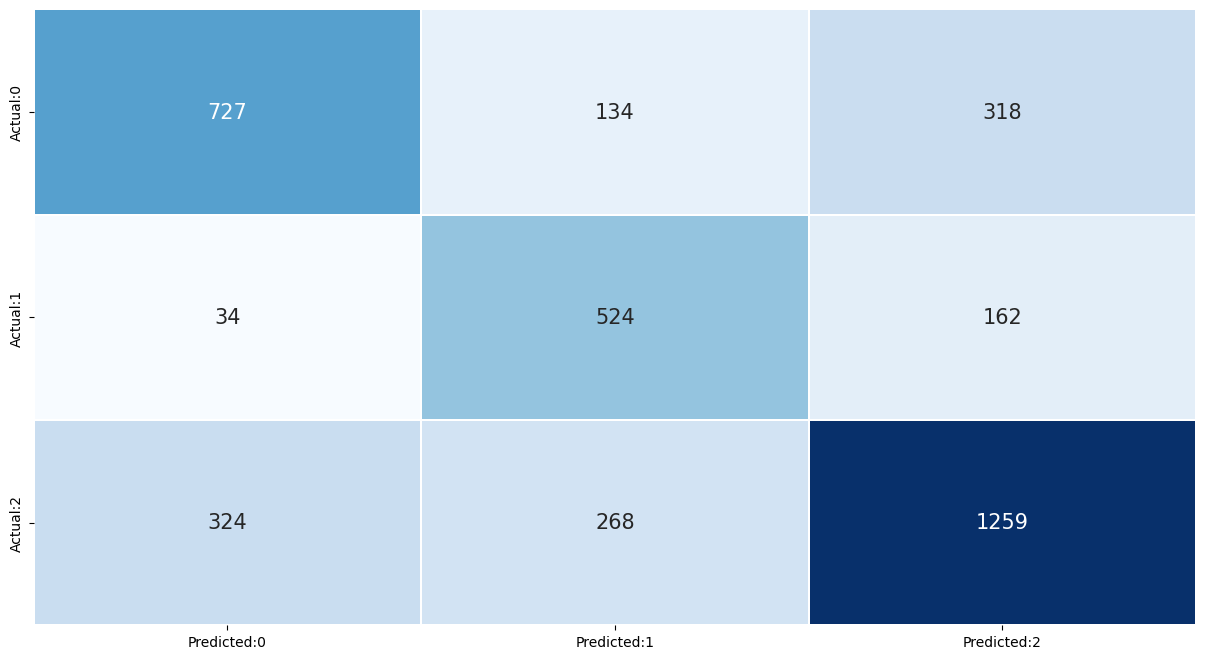

<Figure size 800x600 with 0 Axes>

In [120]:
LR = LogisticRegression() #initiating model
LR_model = LR.fit(scaled_xtrain, y_train) #building the model
LR_ypred = LR_model.predict(scaled_xtest) #prediction
print(classification_report(y_test, LR_ypred))

accuracy = accuracy_score(y_test, LR_ypred)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(y_test, LR_ypred)

**Classification Report Interpretation:**

- **Precision (the ability of the classifier not to label a sample as positive if it is negative):**

Class 0: 67% of instances predicted as class 0.

Class 1: 57% of instances predicted as class 1.

Class 2: 72% of instances predicted as class 2.

- **Recall (the ability of the classifier to find all the positive samples):**

Class 0: The model correctly identified 62% of all actual class 0 instances.

Class 1: The model correctly identified 73% of all actual class 1 instances.

Class 2: The model correctly identified 68% of all actual class 2 instances.

- **F1-score (a weighted harmonic mean of precision and recall; the best value is 1 and the worst is 0):**

Class 0: The F1-score is 0.64, which is moderate, suggesting a balance between precision and recall for class 0.

Class 1: The F1-score is 0.64, indicating a slightly better balance for class 1 than class 0.

Class 2: The F1-score is 0.70, which is relatively high, indicating a good balance between precision and recall for class 2.

**Support indicates the number of actual occurrences of each class in the test set:**

Class 0: 1179 instances.

Class 1: 720 instances.

Class 2: 1851 instances.

- **Accuracy:** Overall, the model correctly predicted 66.93% of all cases.

- **Macro Avg:** The average precision, recall, and F1-score for the model without taking class imbalance into account are 65%, 67%, and 66%, respectively.

- **Weighted Avg:** When considering class imbalance, the average precision, recall, and F1-score are 68%, 67%, and 67%, respectively.

**Confusion Matrix Interpretation:**

- **Class 0:** Correctly predicted 727 times, but there were 134 false positives where class 1 was predicted instead of class 0, and 318 false negatives where class 2 was predicted instead of class 0.
- **Class 1:** Correctly predicted 524 times, with 34 instances incorrectly predicted as class 0 and 162 instances incorrectly as class 2.
- **Class 2:** This class has the highest number of correct predictions at 1259 with false positives of 268 for class 0 and 324 for class 1.

***Summary:***
The model performs best in predicting class 2 with the highest precision, recall, and F1-score. It struggles the most with class 0 predictions, as indicated by the lower recall. The accuracy of 66.93% indicates that the model is somewhat effective but may benefit from further optimization or the use of a more sophisticated model to improve its predictive performance.

<a id="dt"></a>
# 11.2 Base Model 2 - DecisionTreeCalssifier

              precision    recall  f1-score   support

           0       0.60      0.61      0.61      1179
           1       0.53      0.55      0.54       720
           2       0.67      0.65      0.66      1851

    accuracy                           0.62      3750
   macro avg       0.60      0.61      0.60      3750
weighted avg       0.62      0.62      0.62      3750

Accuracy: 0.6202666666666666


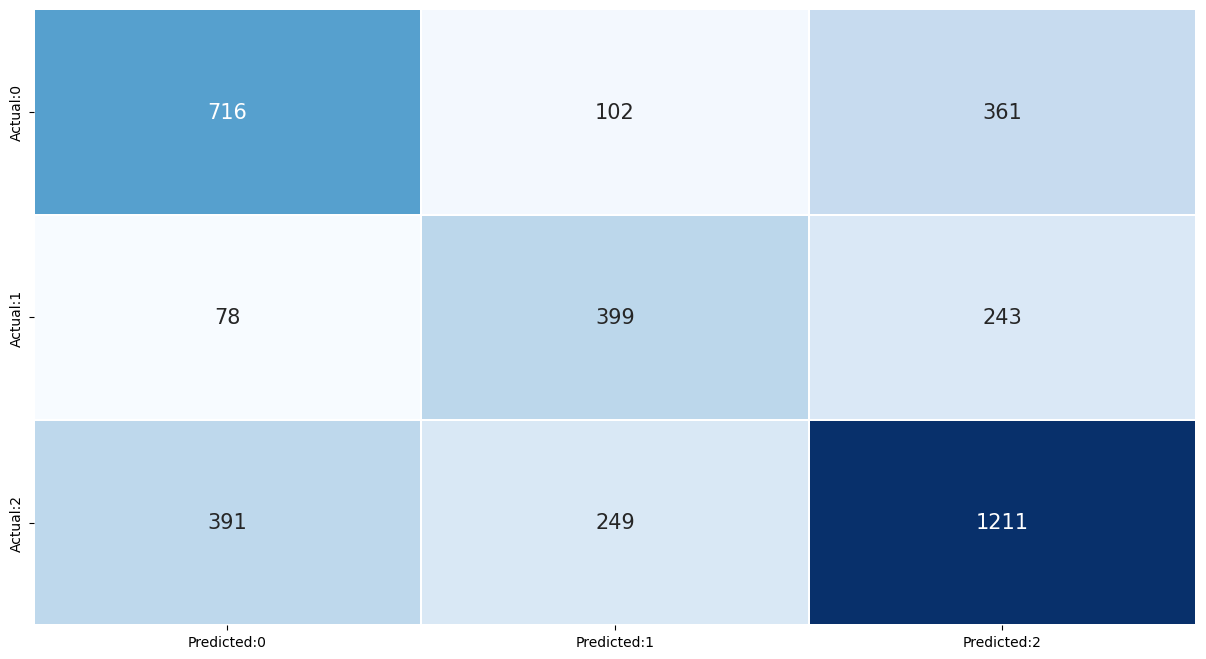

<Figure size 800x600 with 0 Axes>

array([[ 716,  102,  361],
       [  78,  399,  243],
       [ 391,  249, 1211]], dtype=int64)

In [126]:
DT = DecisionTreeClassifier(random_state=30)
DT_model = DT.fit(scaled_xtrain, y_train)
DT_ypred = DT_model.predict(scaled_xtest)
print(classification_report(y_test, DT_ypred))

accuracy = accuracy_score(y_test, DT_ypred)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(y_test, DT_ypred)
confusion_matrix(y_test, DT_ypred)

**Classification Report Interpretation:**

- **Precision (the ability of the classifier not to label a sample as positive if it is negative):**
  - Class 0: 67% of instances predicted as class 0.
  - Class 1: 57% of instances predicted as class 1.
  - Class 2: 72% of instances predicted as class 2.

- **Recall (the ability of the classifier to find all the positive samples):**
  - Class 0: The model correctly identified 62% of all actual class 0 instances.
  - Class 1: The model correctly identified 73% of all actual class 1 instances.
  - Class 2: The model correctly identified 68% of all actual class 2 instances.

- **F1-score (a weighted harmonic mean of precision and recall; the best value is 1 and the worst is 0):**
  - Class 0: The F1-score is 0.64, which is moderate, suggesting a balance between precision and recall for class 0.
  - Class 1: The F1-score is 0.64, indicating a slightly better balance for class 1 than class 0.
  - Class 2: The F1-score is 0.70, which is relatively high, indicating a good balance between precision and recall for class 2.

- **Support indicates the number of actual occurrences of each class in the test set:**
  - Class 0: 1179 instances.
  - Class 1: 720 instances.
  - Class 2: 1851 instances.

- **Accuracy:** Overall, the model correctly predicted 66.93% of all cases.

- **Macro Avg:** The average precision, recall, and F1-score for the model without taking class imbalance into account are 65%, 67%, and 66%, respectively.

- **Weighted Avg:** When considering class imbalance, the average precision, recall, and F1-score are 68%, 67%, and 67%, respectively.

**Confusion Matrix Interpretation:**

- **Class 0:** Correctly predicted 727 times, but there were 134 false positives where class 1 was predicted instead of class 0, and 318 false negatives where class 2 was predicted instead of class 0.
- **Class 1:** Correctly predicted 524 times, with 34 instances incorrectly predicted as class 0 and 162 instances incorrectly as class 2.
- **Class 2:** This class has the highest number of correct predictions at 1259 with false positives of 268 for class 0 and 324 for class 1.

***Summary:***
The model performs best in predicting class 2 with the highest precision, recall, and F1-score. It struggles the most with class 0 predictions, as indicated by the lower recall. The accuracy of 66.93% indicates that the model is somewhat effective but may benefit from further optimization or the use of a more sophisticated model to improve its predictive performance.


<a id="knn"></a>
# 11.3 Base Model 3 - KNN

              precision    recall  f1-score   support

           0       0.60      0.59      0.59      1179
           1       0.54      0.56      0.55       720
           2       0.69      0.68      0.69      1851

    accuracy                           0.63      3750
   macro avg       0.61      0.61      0.61      3750
weighted avg       0.63      0.63      0.63      3750

Accuracy: 0.6301333333333333


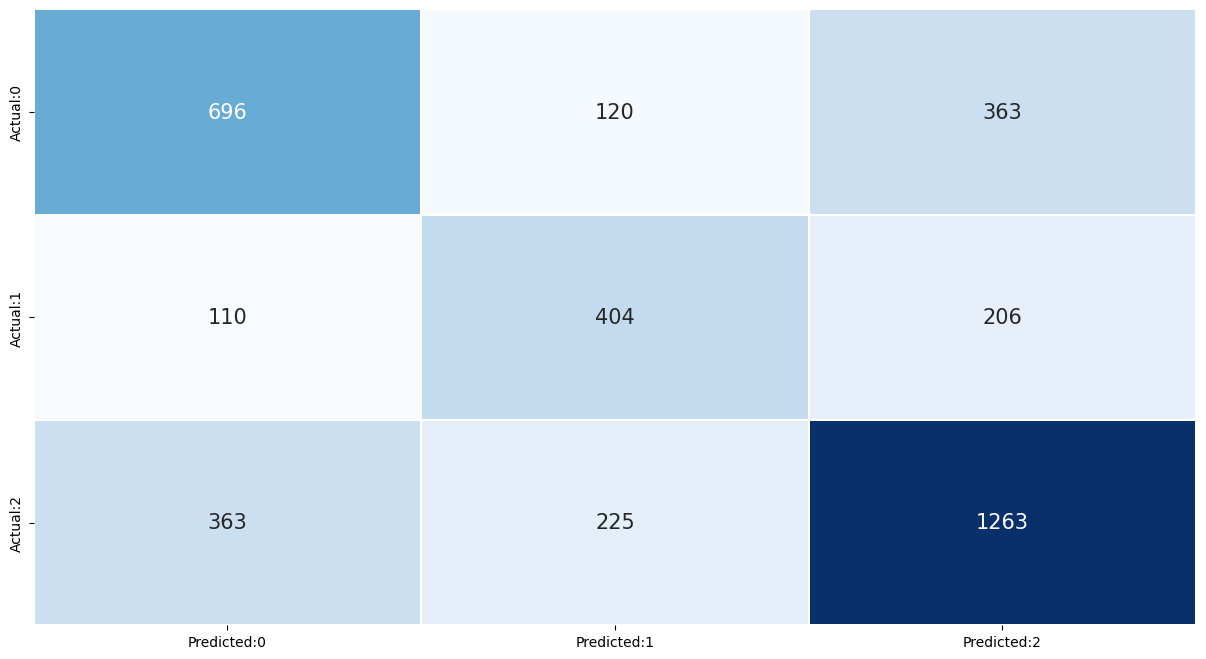

<Figure size 800x600 with 0 Axes>

array([[ 696,  120,  363],
       [ 110,  404,  206],
       [ 363,  225, 1263]], dtype=int64)

In [128]:
knn = KNeighborsClassifier()
knn_model = knn.fit(scaled_xtrain, y_train)
knn_ypred = knn_model.predict(scaled_xtest)
print(classification_report(y_test, knn_ypred))

accuracy = accuracy_score(y_test, knn_ypred)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(y_test, knn_ypred)

confusion_matrix(y_test, knn_ypred)

**Classification Report Interpretation:**

- **Precision (the ability of the classifier not to label a sample as positive if it is negative):**
  - Class 0: 60% of instances predicted as class 0.
  - Class 1: 54% of instances predicted as class 1.
  - Class 2: 69% of instances predicted as class 2.

- **Recall (the ability of the classifier to find all the positive samples):**
  - Class 0: The model correctly identified 59% of all actual class 0 instances.
  - Class 1: The model correctly identified 56% of all actual class 1 instances.
  - Class 2: The model correctly identified 68% of all actual class 2 instances.

- **F1-score (a weighted harmonic mean of precision and recall; the best value is 1 and the worst is 0):**
  - Class 0: The F1-score is 0.59, which is moderate, suggesting a balance between precision and recall for class 0.
  - Class 1: The F1-score is 0.55, indicating a slightly lower balance for class 1.
  - Class 2: The F1-score is 0.69, which is relatively high, indicating a good balance between precision and recall for class 2.

- **Support indicates the number of actual occurrences of each class in the test set:**
  - Class 0: 1179 instances.
  - Class 1: 720 instances.
  - Class 2: 1851 instances.

- **Accuracy:** Overall, the model correctly predicted 63.01% of all cases.

- **Macro Avg:** The average precision, recall, and F1-score for the model without taking class imbalance into account are 61%, 61%, and 61%, respectively.

- **Weighted Avg:** When considering class imbalance, the average precision, recall, and F1-score are 63%, 63%, and 63%, respectively.

**Confusion Matrix Interpretation:**

- **Class 0:** Correctly predicted 696 times, but there were 120 false positives where class 1 was predicted instead of class 0, and 363 false negatives where class 2 was predicted instead of class 0.
- **Class 1:** Correctly predicted 404 times, with 110 instances incorrectly predicted as class 0 and 206 instances incorrectly as class 2.
- **Class 2:** This class has the highest number of correct predictions at 1263 with false positives of 225 for class 0 and 363 for class 1.

***Summary:***
The model performs reasonably well, with the highest precision, recall, and F1-score for class 2. Class 0 and Class 1 exhibit slightly lower performance, as indicated by the lower recall and F1-score. The accuracy of 63.01% suggests a decent overall performance, but further optimization or the use of a more advanced model may improve predictive performance.


<a id="rf"></a>
# 11.4 Base Model 4 - Random Forest Classifier

              precision    recall  f1-score   support

           0       0.70      0.75      0.73      1179
           1       0.59      0.76      0.66       720
           2       0.79      0.66      0.72      1851

    accuracy                           0.71      3750
   macro avg       0.69      0.73      0.70      3750
weighted avg       0.72      0.71      0.71      3750

Accuracy: 0.7096


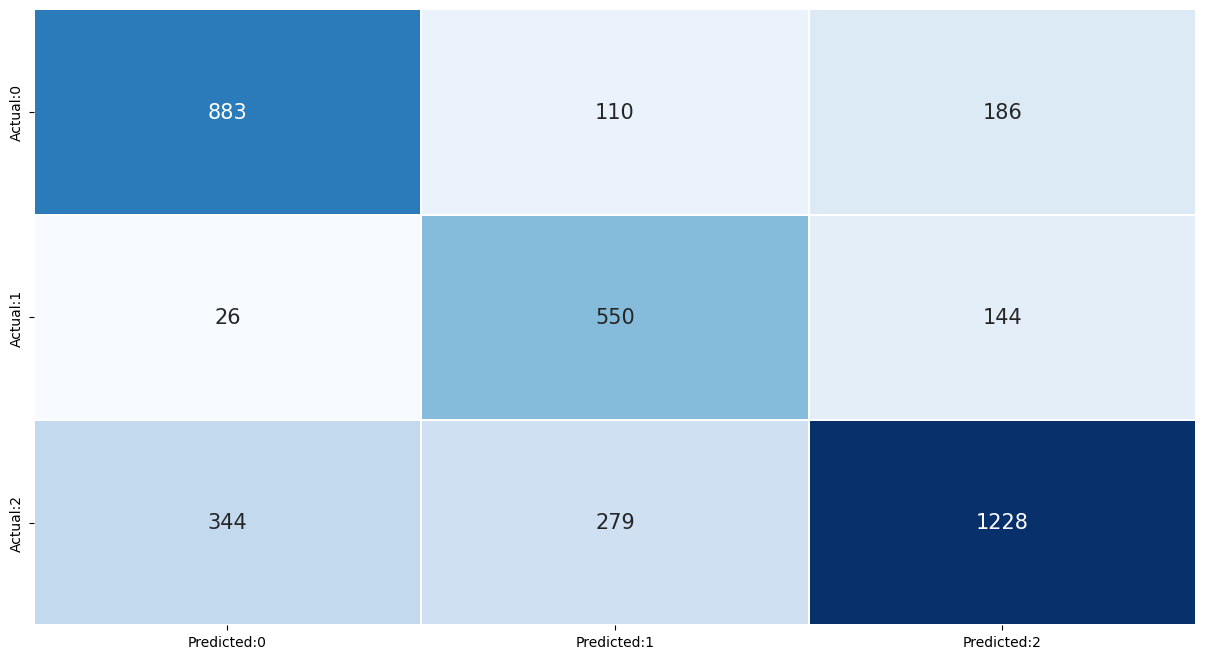

<Figure size 800x600 with 0 Axes>

array([[ 883,  110,  186],
       [  26,  550,  144],
       [ 344,  279, 1228]], dtype=int64)

In [132]:
RF = RandomForestClassifier(random_state=34)
RF_model = RF.fit(scaled_xtrain, y_train)
RF_ypred = RF_model.predict(scaled_xtest)
print(classification_report(y_test, RF_ypred))

accuracy = accuracy_score(y_test, RF_ypred)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(y_test, RF_ypred)

confusion_matrix(y_test, RF_ypred)

**Classification Report Interpretation:**

- **Precision (the ability of the classifier not to label a sample as positive if it is negative):**
  - Class 0: 70% of instances predicted as class 0.
  - Class 1: 59% of instances predicted as class 1.
  - Class 2: 79% of instances predicted as class 2.

- **Recall (the ability of the classifier to find all the positive samples):**
  - Class 0: The model correctly identified 75% of all actual class 0 instances.
  - Class 1: The model correctly identified 76% of all actual class 1 instances.
  - Class 2: The model correctly identified 66% of all actual class 2 instances.

- **F1-score (a weighted harmonic mean of precision and recall; the best value is 1 and the worst is 0):**
  - Class 0: The F1-score is 0.73, which is high, suggesting a good balance between precision and recall for class 0.
  - Class 1: The F1-score is 0.66, indicating a moderate balance for class 1.
  - Class 2: The F1-score is 0.72, which is relatively high, indicating a good balance between precision and recall for class 2.

**Support indicates the number of actual occurrences of each class in the test set:**
  - Class 0: 1179 instances.
  - Class 1: 720 instances.
  - Class 2: 1851 instances.

- **Accuracy:** Overall, the model correctly predicted 70.96% of all cases.

- **Macro Avg:** The average precision, recall, and F1-score for the model without taking class imbalance into account are 69%, 73%, and 70%, respectively.

- **Weighted Avg:** When considering class imbalance, the average precision, recall, and F1-score are 72%, 71%, and 71%, respectively.

**Confusion Matrix Interpretation:**

- **Class 0:** Correctly predicted 883 times, but there were 110 false positives where class 1 was predicted instead of class 0, and 186 false negatives where class 2 was predicted instead of class 0.
- **Class 1:** Correctly predicted 550 times, with 26 instances incorrectly predicted as class 0 and 144 instances incorrectly as class 2.
- **Class 2:** This class has the highest number of correct predictions at 1228 with false positives of 279 for class 0 and 344 for class 1.

***Summary:***
The model performs well, with the highest precision, recall, and F1-score for class 2. Class 1 exhibits a slightly lower performance, as indicated by the lower recall and F1-score. The accuracy of 70.96% suggests a good overall performance, and the model may be suitable for the task at hand.


# 12. Optimizing Model Performance:

## 12.1 Top 20 Important Features Ranked by Importance in Random Forest Model

In [133]:
features = pd.DataFrame()
features["Columns"] = RF.feature_names_in_
features["Importance"] = RF.feature_importances_
top_20 = features.sort_values(by = "Importance",ascending = False).head(20).reset_index()
top_20

,index,Columns,Importance
0,11,Outstanding_Debt,0.1028
1,3,Interest_Rate_Weighted,0.0747
2,9,Delay_from_due_date,0.0651
3,45,Credit_Mix_Good,0.0571
4,10,Num_Credit_Inquiries,0.0507
5,46,Credit_Mix_Standard,0.0502
6,7,Credit_History_Age,0.0472
7,8,Num_of_Delayed_Payment,0.0453
8,15,Monthly_Balance,0.0383
9,13,Total_EMI_per_month,0.0379


Building a model with the top 20 features from the feature importance analysis offers a balance between efficiency, interpretability, and predictive performance. It is a common practice to experiment with different feature sets and assess the impact on model outcomes based on the specific goals and requirements of the analysis

### Random forest top 20 features

In [134]:
x = final_df[top_20["Columns"]]
y = final_df["Credit_Score"]
xtrain_t20,xtest_t20,ytrain_t20,ytest_t20 = train_test_split(x,y,test_size=0.2,stratify=y,random_state=100)

# initialize the standard scalar
ss = StandardScaler()

scaled_xtrain20 = pd.DataFrame(ss.fit_transform(xtrain_t20), columns=xtrain_t20.columns)
scaled_xtest20 = pd.DataFrame(ss.transform(xtest_t20), columns=xtest_t20.columns)

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       786
           1       0.58      0.76      0.66       480
           2       0.77      0.69      0.73      1234

    accuracy                           0.71      2500
   macro avg       0.70      0.72      0.70      2500
weighted avg       0.72      0.71      0.71      2500

Accuracy: 0.7128


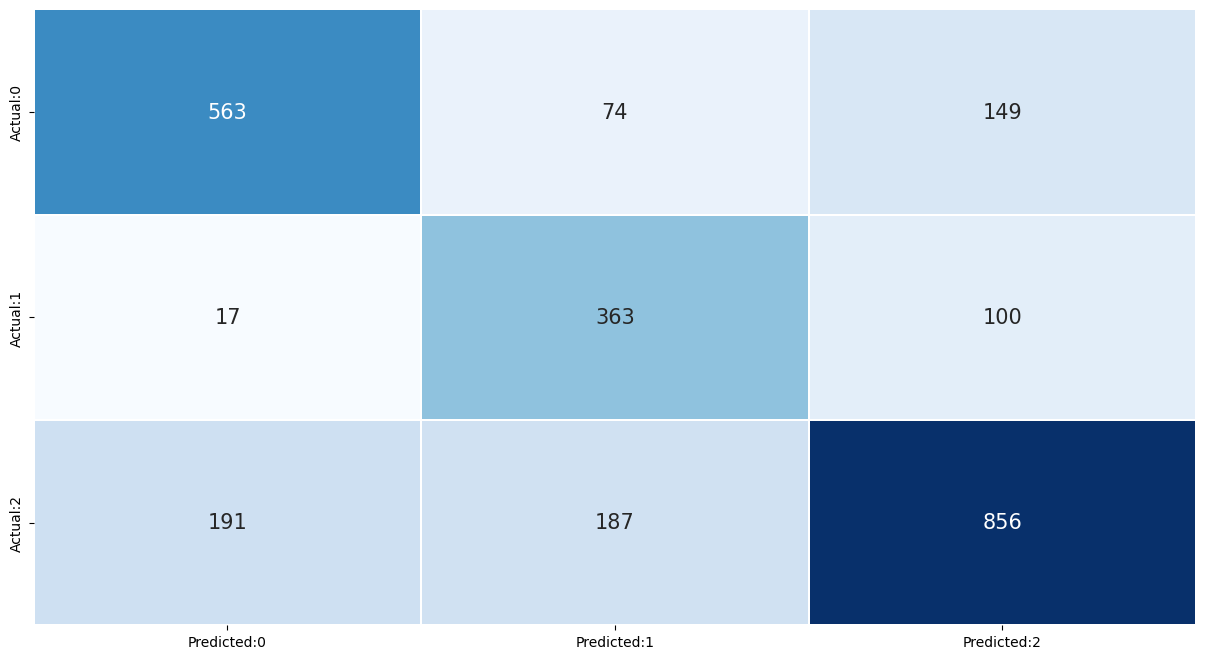

<Figure size 800x600 with 0 Axes>

array([[563,  74, 149],
       [ 17, 363, 100],
       [191, 187, 856]], dtype=int64)

In [135]:
RF = RandomForestClassifier(random_state=34)
RF_model20 = RF.fit(scaled_xtrain20, ytrain_t20)
RF_ypred20 = RF_model20.predict(scaled_xtest20)
print(classification_report(ytest_t20, RF_ypred20))

accuracy = accuracy_score(ytest_t20, RF_ypred20)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(ytest_t20, RF_ypred20)

confusion_matrix(ytest_t20, RF_ypred20)

**Classification Report Interpretation:**

- **Precision (the ability of the classifier not to label a sample as positive if it is negative):**
  - Class 0: 73% of instances predicted as class 0.
  - Class 1: 58% of instances predicted as class 1.
  - Class 2: 77% of instances predicted as class 2.

- **Recall (the ability of the classifier to find all the positive samples):**
  - Class 0: The model correctly identified 72% of all actual class 0 instances.
  - Class 1: The model correctly identified 76% of all actual class 1 instances.
  - Class 2: The model correctly identified 69% of all actual class 2 instances.

- **F1-score (a weighted harmonic mean of precision and recall; the best value is 1 and the worst is 0):**
  - Class 0: The F1-score is 0.72, which is high, suggesting a good balance between precision and recall for class 0.
  - Class 1: The F1-score is 0.66, indicating a moderate balance for class 1.
  - Class 2: The F1-score is 0.73, which is relatively high, indicating a good balance between precision and recall for class 2.

- **Support indicates the number of actual occurrences of each class in the test set:**
  - Class 0: 786 instances.
  - Class 1: 480 instances.
  - Class 2: 1234 instances.

- **Accuracy:** Overall, the model correctly predicted 71.28% of all cases.

- **Macro Avg:** The average precision, recall, and F1-score for the model without taking class imbalance into account are 70%, 72%, and 70%, respectively.

- **Weighted Avg:** When considering class imbalance, the average precision, recall, and F1-score are 72%, 71%, and 71%, respectively.

**Confusion Matrix Interpretation:**

- **Class 0:** Correctly predicted 563 times, but there were 74 false positives where class 1 was predicted instead of class 0, and 149 false negatives where class 2 was predicted instead of class 0.
- **Class 1:** Correctly predicted 363 times, with 17 instances incorrectly predicted as class 0 and 100 instances incorrectly as class 2.
- **Class 2:** This class has the highest number of correct predictions at 856 with false positives of 187 for class 0 and 191 for class 1.

***Summary:***
The model performs well, with high precision, recall, and F1-score for both class 0 and class 2. Class 1 exhibits a slightly lower performance, as indicated by the lower recall and F1-score. The accuracy of 71.28% suggests a good overall performance, and the model may be suitable for the task at hand.


### 12.2 Optimizing RandomForestClassifier: Hyperparameter Tuning using RandomizedSearchCV 1:

In [161]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

RF = RandomForestClassifier()
param_dist = {
    "n_estimators" : range(1,200),
    "max_depth"  : range(1,200),
    "min_samples_leaf": range(1,200)
    
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator = RF,  # Model to be tuned
    param_distributions=param_dist,  # Hyperparameter search space
    n_iter=10,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    scoring='f1_micro',  # Scoring metric
    random_state=42  # For reproducibility
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Print the best cross-validated score
print("Best Cross-Validated Score (Accuracy):", random_search.best_score_)

# Evaluate the model on the test set using the best hyperparameters
test_accuracy = random_search.best_estimator_.score(x_test, y_test)
print("Test Set Accuracy with Best Hyperparameters:", test_accuracy)

Best Hyperparameters: {'n_estimators': 67, 'min_samples_leaf': 41, 'max_depth': 163}
Best Cross-Validated Score (Accuracy): 0.7129142857142857
Test Set Accuracy with Best Hyperparameters: 0.7090666666666666


              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1179
           1       0.56      0.82      0.67       720
           2       0.83      0.63      0.72      1851

    accuracy                           0.71      3750
   macro avg       0.70      0.74      0.71      3750
weighted avg       0.74      0.71      0.71      3750

Accuracy: 0.7122666666666667


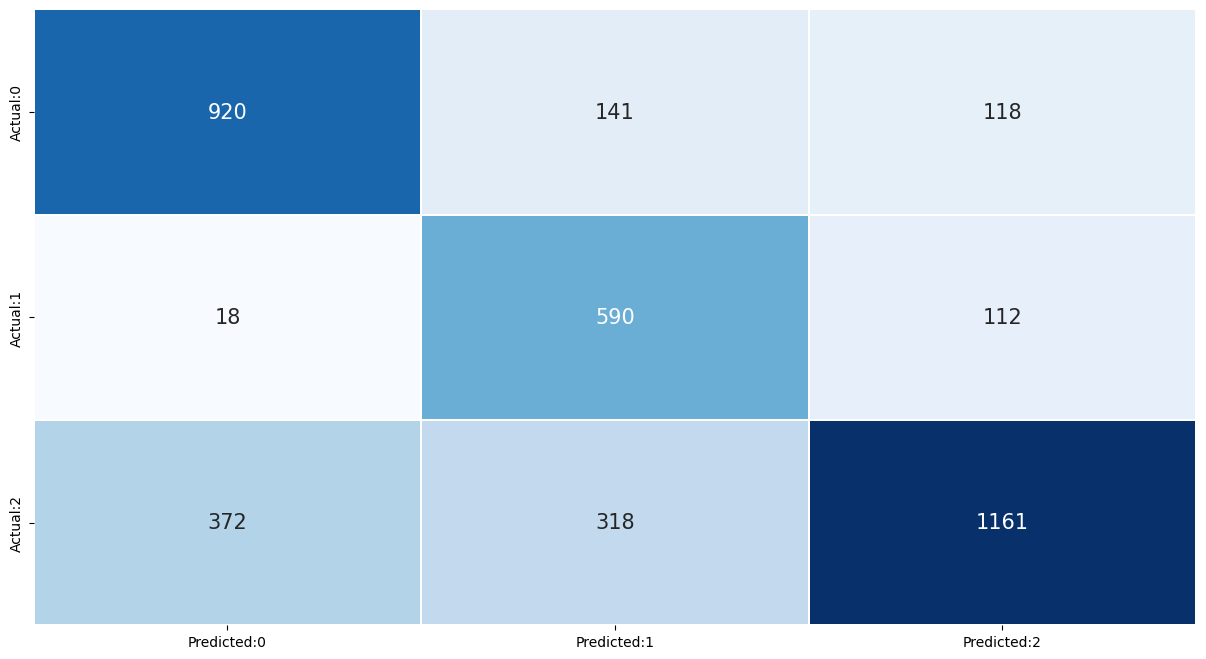

<Figure size 800x600 with 0 Axes>

array([[ 920,  141,  118],
       [  18,  590,  112],
       [ 372,  318, 1161]], dtype=int64)

In [162]:
RF_gs1 = RandomForestClassifier(n_estimators= 67, min_samples_leaf= 41, max_depth= 163)
RF_model_gs1 = RF_gs1.fit(scaled_xtrain, y_train)
RF_ypred_gs1 = RF_model_gs1.predict(scaled_xtest)
print(classification_report(y_test, RF_ypred_gs1))

accuracy = accuracy_score(y_test, RF_ypred_gs1)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(y_test, RF_ypred_gs1)

confusion_matrix(y_test, RF_ypred_gs1)

**Classification Report Interpretation:**

- **Precision (the ability of the classifier not to label a sample as positive if it is negative):**
  - Class 0: 70% of instances predicted as class 0.
  - Class 1: 56% of instances predicted as class 1.
  - Class 2: 83% of instances predicted as class 2.

- **Recall (the ability of the classifier to find all the positive samples):**
  - Class 0: The model correctly identified 78% of all actual class 0 instances.
  - Class 1: The model correctly identified 82% of all actual class 1 instances.
  - Class 2: The model correctly identified 63% of all actual class 2 instances.

- **F1-score (a weighted harmonic mean of precision and recall; the best value is 1 and the worst is 0):**
  - Class 0: The F1-score is 0.74, indicating a good balance between precision and recall for class 0.
  - Class 1: The F1-score is 0.67, suggesting a relatively balanced performance for class 1.
  - Class 2: The F1-score is 0.72, which is relatively high, indicating a good balance between precision and recall for class 2.

-  **Support indicates the number of actual occurrences of each class in the test set:**
  - Class 0: 1179 instances.
  - Class 1: 720 instances.
  - Class 2: 1851 instances.

- **Accuracy:** Overall, the model correctly predicted 71.23% of all cases.

- **Macro Avg:** The average precision, recall, and F1-score for the model without taking class imbalance into account are 70%, 74%, and 71%, respectively.

- **Weighted Avg:** When considering class imbalance, the average precision, recall, and F1-score are 74%, 71%, and 71%, respectively.

**Confusion Matrix Interpretation:**

- **Class 0:** Correctly predicted 920 times, but there were 141 false positives where class 1 was predicted instead of class 0, and 118 false negatives where class 2 was predicted instead of class 0.
- **Class 1:** Correctly predicted 590 times, with 18 instances incorrectly predicted as class 0 and 112 instances incorrectly as class 2.
- **Class 2:** This class has the highest number of correct predictions at 1161 with false positives of 318 for class 0 and 372 for class 1.

***Summary:*** The model performs well, with a good balance between precision and recall for all classes. The accuracy of 71.23% indicates that the model is effective, and further optimization or the use of a more sophisticated model may enhance its predictive performance.


### 12.3 Optimizing RandomForestClassifier: Hyperparameter Tuning using RandomizedSearchCV 2:

In [167]:
RF = RandomForestClassifier()
param_dist = {
    "n_estimators" : range(100,200),
    "max_depth"  : range(1,200),
    "min_samples_leaf": range(1,200)
    
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator = RF,  # Model to be tuned
    param_distributions=param_dist,  # Hyperparameter search space
    n_iter=10,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    scoring='f1_micro',  # Scoring metric
    random_state=42  # For reproducibility
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Print the best cross-validated score
print("Best Cross-Validated Score (Accuracy):", random_search.best_score_)

# Evaluate the model on the test set using the best hyperparameters
test_accuracy = random_search.best_estimator_.score(x_test, y_test)
print("Test Set Accuracy with Best Hyperparameters:", test_accuracy)

Best Hyperparameters: {'n_estimators': 184, 'min_samples_leaf': 3, 'max_depth': 113}
Best Cross-Validated Score (Accuracy): 0.7197714285714286
Test Set Accuracy with Best Hyperparameters: 0.7138666666666666


              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1179
           1       0.58      0.79      0.67       720
           2       0.81      0.66      0.73      1851

    accuracy                           0.72      3750
   macro avg       0.70      0.74      0.71      3750
weighted avg       0.73      0.72      0.72      3750

Accuracy: 0.7165333333333334


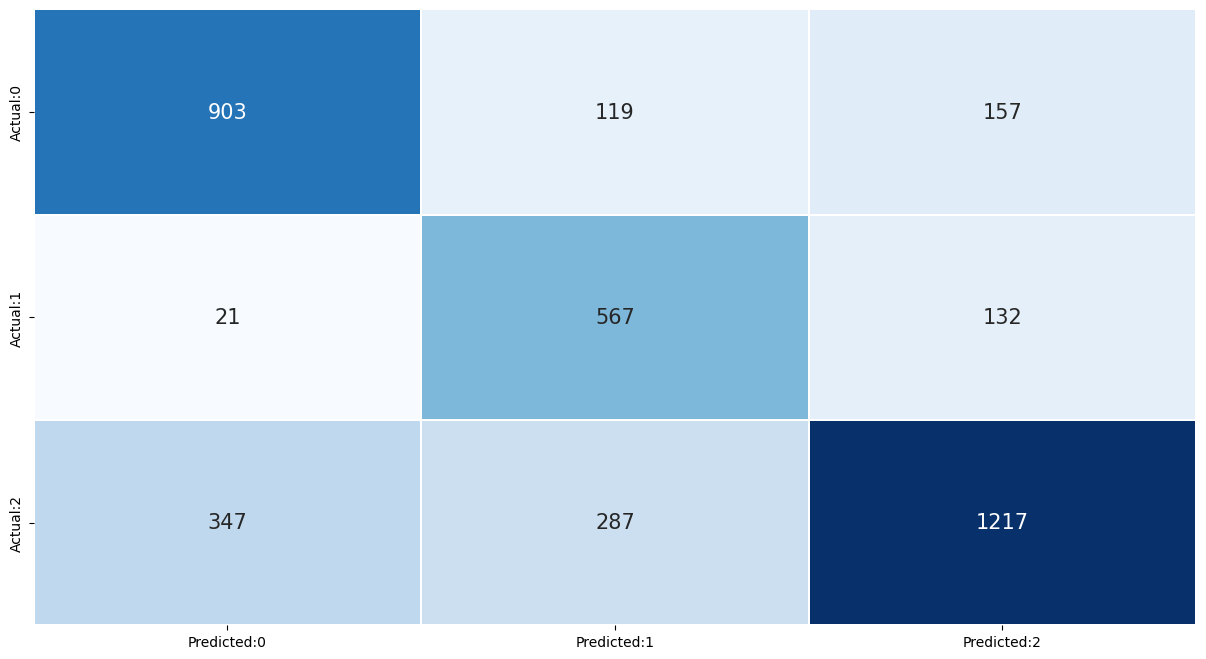

<Figure size 800x600 with 0 Axes>

array([[ 903,  119,  157],
       [  21,  567,  132],
       [ 347,  287, 1217]], dtype=int64)

In [171]:
RF_gs2 = RandomForestClassifier(n_estimators= 184, min_samples_leaf= 3, max_depth= 113, random_state=23)
RF_model_gs2 = RF_gs2.fit(scaled_xtrain, y_train)
RF_ypred_gs2 = RF_model_gs2.predict(scaled_xtest)
print(classification_report(y_test, RF_ypred_gs2))

accuracy = accuracy_score(y_test, RF_ypred_gs2)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(y_test, RF_ypred_gs2)

confusion_matrix(y_test, RF_ypred_gs2)

**Classification Report Interpretation:**

- **Precision (the ability of the classifier not to label a sample as positive if it is negative):**
  - Class 0: 71% of instances predicted as class 0.
  - Class 1: 58% of instances predicted as class 1.
  - Class 2: 81% of instances predicted as class 2.

- **Recall (the ability of the classifier to find all the positive samples):**
  - Class 0: The model correctly identified 77% of all actual class 0 instances.
  - Class 1: The model correctly identified 79% of all actual class 1 instances.
  - Class 2: The model correctly identified 66% of all actual class 2 instances.

- **F1-score (a weighted harmonic mean of precision and recall; the best value is 1 and the worst is 0):**
  - Class 0: The F1-score is 0.74, indicating a good balance between precision and recall for class 0.
  - Class 1: The F1-score is 0.67, suggesting a relatively balanced performance for class 1.
  - Class 2: The F1-score is 0.73, which is relatively high, indicating a good balance between precision and recall for class 2.

- **Support indicates the number of actual occurrences of each class in the test set:**
  - Class 0: 1179 instances.
  - Class 1: 720 instances.
  - Class 2: 1851 instances.

- **Accuracy:** Overall, the model correctly predicted 71.65% of all cases.

- **Macro Avg:** The average precision, recall, and F1-score for the model without taking class imbalance into account are 70%, 74%, and 71%, respectively.

- **Weighted Avg:** When considering class imbalance, the average precision, recall, and F1-score are 73%, 72%, and 72%, respectively.

**Confusion Matrix Interpretation:**

- **Class 0:** Correctly predicted 903 times, but there were 119 false positives where class 1 was predicted instead of class 0, and 157 false negatives where class 2 was predicted instead of class 0.
- **Class 1:** Correctly predicted 567 times, with 21 instances incorrectly predicted as class 0 and 132 instances incorrectly as class 2.
- **Class 2:** This class has the highest number of correct predictions at 1217 with false positives of 287 for class 0 and 347 for class 1.

***Summary:*** The model performs well, with a good balance between precision and recall for all classes. The accuracy of 71.65% indicates that the model is effective, and further optimization or the use of a more sophisticated model may enhance its predictive performance.


### Random Forest Classification with SMOTE Oversampling:

In [166]:
final_df["Credit_Score"].value_counts()

Credit_Score
2    6170
0    3930
1    2400
Name: count, dtype: int64

With 6170 instances, Class 2 dominates the dataset, while Class 0 and Class 1 have 3930 and 2400 instances, respectively.

The class imbalance suggests that techniques like SMOTE can be valuable, generating synthetic samples to enhance the model's performance, particularly for the minority class (Class 1).

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1179
           1       0.57      0.81      0.67       720
           2       0.82      0.64      0.72      1851

    accuracy                           0.71      3750
   macro avg       0.70      0.74      0.71      3750
weighted avg       0.74      0.71      0.72      3750

Accuracy: 0.7141333333333333


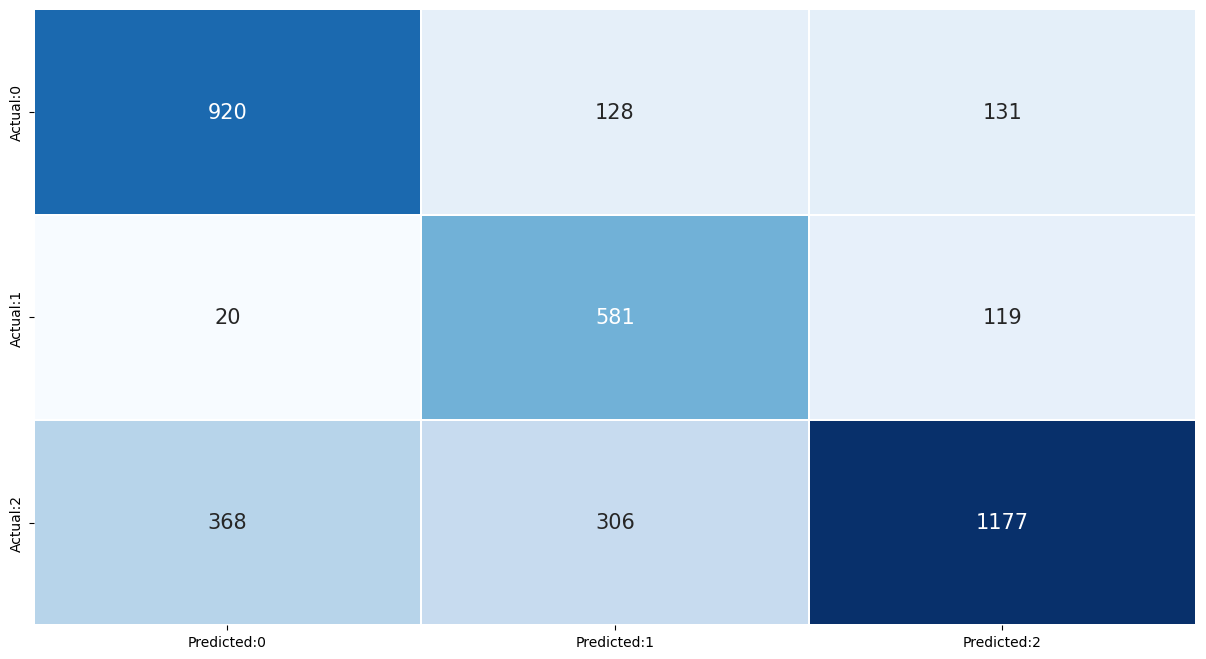

<Figure size 800x600 with 0 Axes>

array([[ 920,  128,  131],
       [  20,  581,  119],
       [ 368,  306, 1177]], dtype=int64)

In [138]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=43)
xtrain_smote, ytrain_smote = smote.fit_resample(scaled_xtrain, y_train)

RF = RandomForestClassifier()
RF_model_smote = RF.fit(xtrain_smote, ytrain_smote)
RF_ypred_smote = RF_model_smote.predict(scaled_xtest)
print(classification_report(y_test, RF_ypred_smote))

accuracy = accuracy_score(y_test, RF_ypred_smote)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(y_test, RF_ypred_smote)

confusion_matrix(y_test, RF_ypred_smote)

**Classification Report Interpretation:**

- **Precision (the ability of the classifier not to label a sample as positive if it is negative):**
  - Class 0: 70% of instances predicted as class 0.
  - Class 1: 57% of instances predicted as class 1.
  - Class 2: 82% of instances predicted as class 2.

- **Recall (the ability of the classifier to find all the positive samples):**
  - Class 0: The model correctly identified 78% of all actual class 0 instances.
  - Class 1: The model correctly identified 81% of all actual class 1 instances.
  - Class 2: The model correctly identified 64% of all actual class 2 instances.

- **F1-score (a weighted harmonic mean of precision and recall; the best value is 1 and the worst is 0):**
  - Class 0: The F1-score is 0.74, which is high, suggesting a good balance between precision and recall for class 0.
  - Class 1: The F1-score is 0.67, indicating a moderate balance for class 1.
  - Class 2: The F1-score is 0.72, which is relatively high, indicating a good balance between precision and recall for class 2.

- **Support indicates the number of actual occurrences of each class in the test set:**
  - Class 0: 1179 instances.
  - Class 1: 720 instances.
  - Class 2: 1851 instances.

- **Accuracy:** Overall, the model correctly predicted 71.41% of all cases.

- **Macro Avg:** The average precision, recall, and F1-score for the model without taking class imbalance into account are 70%, 74%, and 71%, respectively.

- **Weighted Avg:** When considering class imbalance, the average precision, recall, and F1-score are 74%, 71%, and 72%, respectively.

**Confusion Matrix Interpretation:**

- **Class 0:** Correctly predicted 920 times, but there were 128 false positives where class 1 was predicted instead of class 0, and 131 false negatives where class 2 was predicted instead of class 0.
- **Class 1:** Correctly predicted 581 times, with 20 instances incorrectly predicted as class 0 and 119 instances incorrectly as class 2.
- **Class 2:** This class has the highest number of correct predictions at 1177 with false positives of 306 for class 0 and 368 for class 1.

***Summary:***
The model performs well, with high precision, recall, and F1-score for both class 0 and class 2. Class 1 exhibits a slightly lower performance, as indicated by the lower recall and F1-score. The accuracy of 71.41% suggests a good overall performance, and the model may be suitable for the task at hand.


### 12.4 AdaBoost Classifier Evaluation:

              precision    recall  f1-score   support

           0       0.68      0.64      0.66      1179
           1       0.56      0.74      0.64       720
           2       0.75      0.68      0.71      1851

    accuracy                           0.68      3750
   macro avg       0.66      0.69      0.67      3750
weighted avg       0.69      0.68      0.68      3750

Accuracy: 0.6802666666666667


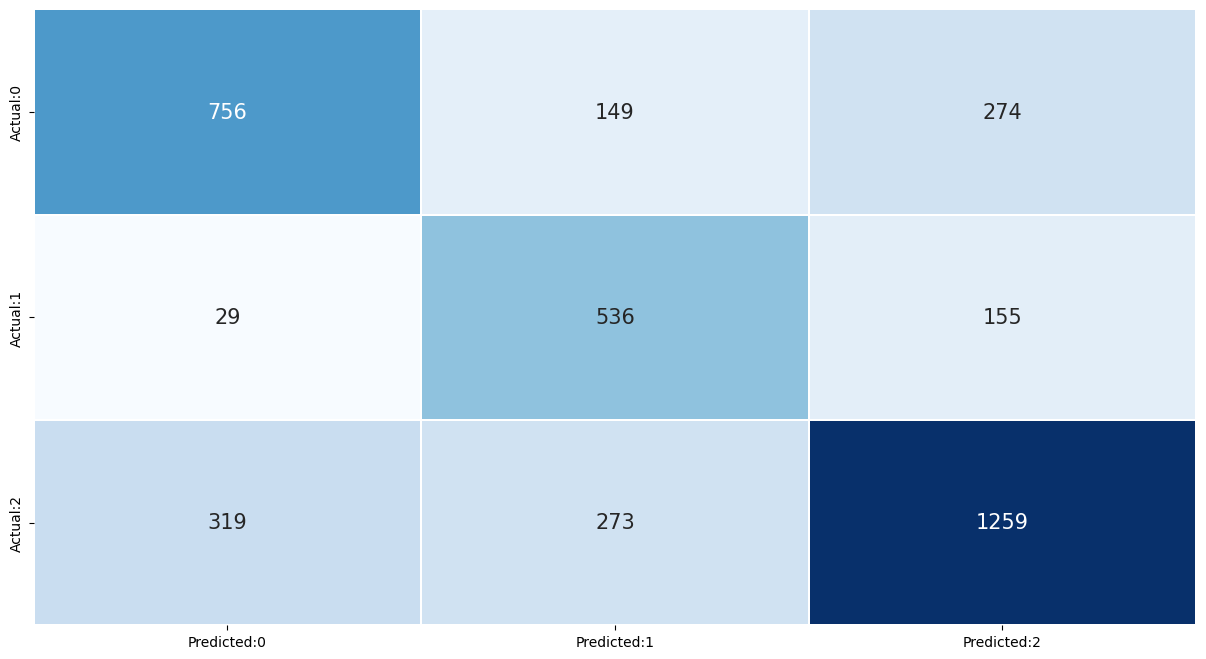

<Figure size 800x600 with 0 Axes>

array([[ 756,  149,  274],
       [  29,  536,  155],
       [ 319,  273, 1259]], dtype=int64)

In [140]:
ada_boost = AdaBoostClassifier(random_state=34)
ada_model = ada_boost.fit(scaled_xtrain, y_train)
ada_ypred = ada_model.predict(scaled_xtest)
print (classification_report(y_test, ada_ypred ))

accuracy = accuracy_score(y_test, ada_ypred)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(y_test, ada_ypred)

confusion_matrix(y_test, ada_ypred)

**Classification Report Interpretation:**

- **Precision (the ability of the classifier not to label a sample as positive if it is negative):**
  - Class 0: 68% of instances predicted as class 0.
  - Class 1: 56% of instances predicted as class 1.
  - Class 2: 75% of instances predicted as class 2.

- **Recall (the ability of the classifier to find all the positive samples):**
  - Class 0: The model correctly identified 64% of all actual class 0 instances.
  - Class 1: The model correctly identified 74% of all actual class 1 instances.
  - Class 2: The model correctly identified 68% of all actual class 2 instances.

- **F1-score (a weighted harmonic mean of precision and recall; the best value is 1 and the worst is 0):**
  - Class 0: The F1-score is 0.66, which is moderate, suggesting a balance between precision and recall for class 0.
  - Class 1: The F1-score is 0.64, indicating a slightly better balance for class 1 than class 0.
  - Class 2: The F1-score is 0.71, which is relatively high, indicating a good balance between precision and recall for class 2.

- **Support indicates the number of actual occurrences of each class in the test set:**
  - Class 0: 1179 instances.
  - Class 1: 720 instances.
  - Class 2: 1851 instances.

- **Accuracy:** Overall, the model correctly predicted 68.03% of all cases.

- **Macro Avg:** The average precision, recall, and F1-score for the model without taking class imbalance into account are 66%, 69%, and 67%, respectively.

- **Weighted Avg:** When considering class imbalance, the average precision, recall, and F1-score are 69%, 68%, and 68%, respectively.

**Confusion Matrix Interpretation:**

- **Class 0:** Correctly predicted 756 times, but there were 149 false positives where class 1 was predicted instead of class 0, and 274 false negatives where class 2 was predicted instead of class 0.
- **Class 1:** Correctly predicted 536 times, with 29 instances incorrectly predicted as class 0 and 155 instances incorrectly as class 2.
- **Class 2:** This class has the highest number of correct predictions at 1259 with false positives of 273 for class 0 and 319 for class 1.

***Summary:***
The model performs moderately well, with a good balance between precision and recall for all classes. The accuracy of 68.03% indicates that the model is reasonably effective, and further optimization or the use of a more sophisticated model may enhance its predictive performance.


### AdaBoost Classifier ith SMOTE Oversampling:

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1179
           1       0.54      0.79      0.64       720
           2       0.78      0.64      0.70      1851

    accuracy                           0.68      3750
   macro avg       0.66      0.70      0.67      3750
weighted avg       0.70      0.68      0.68      3750

Accuracy: 0.6789333333333334


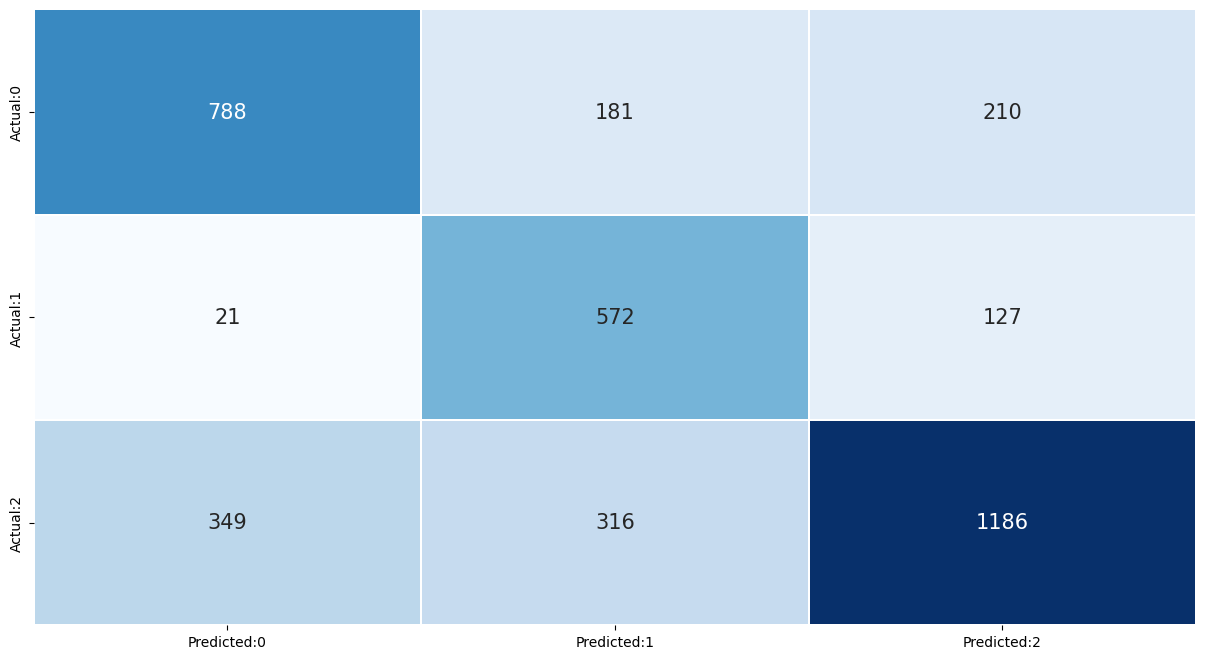

<Figure size 800x600 with 0 Axes>

array([[ 788,  181,  210],
       [  21,  572,  127],
       [ 349,  316, 1186]], dtype=int64)

In [141]:
ada_boost = AdaBoostClassifier(random_state=34)
ada_model_smote = ada_boost.fit(xtrain_smote, ytrain_smote)
ada_ypred_smote = ada_model_smote.predict(scaled_xtest)
print (classification_report(y_test, ada_ypred_smote ))

accuracy = accuracy_score(y_test, ada_ypred_smote)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(y_test, ada_ypred_smote)

confusion_matrix(y_test, ada_ypred_smote)

**Interpretation:**
- The AdaBoost model, trained with SMOTE oversampling, demonstrates good performance across all three classes.
- Class 0 demonstrates the highest F1-score (0.67), indicating good balance between precision and recall.
- Class 1 has a lower F1-score (0.64), suggesting a trade-off between precision and recall.
- Class 2 exhibits a moderate F1-score (0.70), showing balanced performance.
- While the overall accuracy is 68%, it's essential to consider F1-scores for a more nuanced evaluation of the model's predictive capabilities.

### 12.5 AdaBoost Hyperparameter Tuning:

In [151]:
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'base_estimator__max_depth': [1, 2, 3]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='f1_micro') 

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Print the best cross-validated score
print("Best Cross-Validated Score (F1 micro):", grid_search.best_score_)

# Evaluate the model on the test set using the best hyperparameters
test_f1_micro = grid_search.best_estimator_.score(x_test, y_test)
print("Test Set F1 Micro with Best Hyperparameters:", test_f1_micro)

Best Hyperparameters: {'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 50}
Best Cross-Validated Score (F1 micro): 0.7112
Test Set F1 Micro with Best Hyperparameters: 0.7026666666666667


              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1179
           1       0.61      0.69      0.64       720
           2       0.76      0.69      0.73      1851

    accuracy                           0.70      3750
   macro avg       0.68      0.70      0.69      3750
weighted avg       0.71      0.70      0.70      3750

Accuracy: 0.7029333333333333


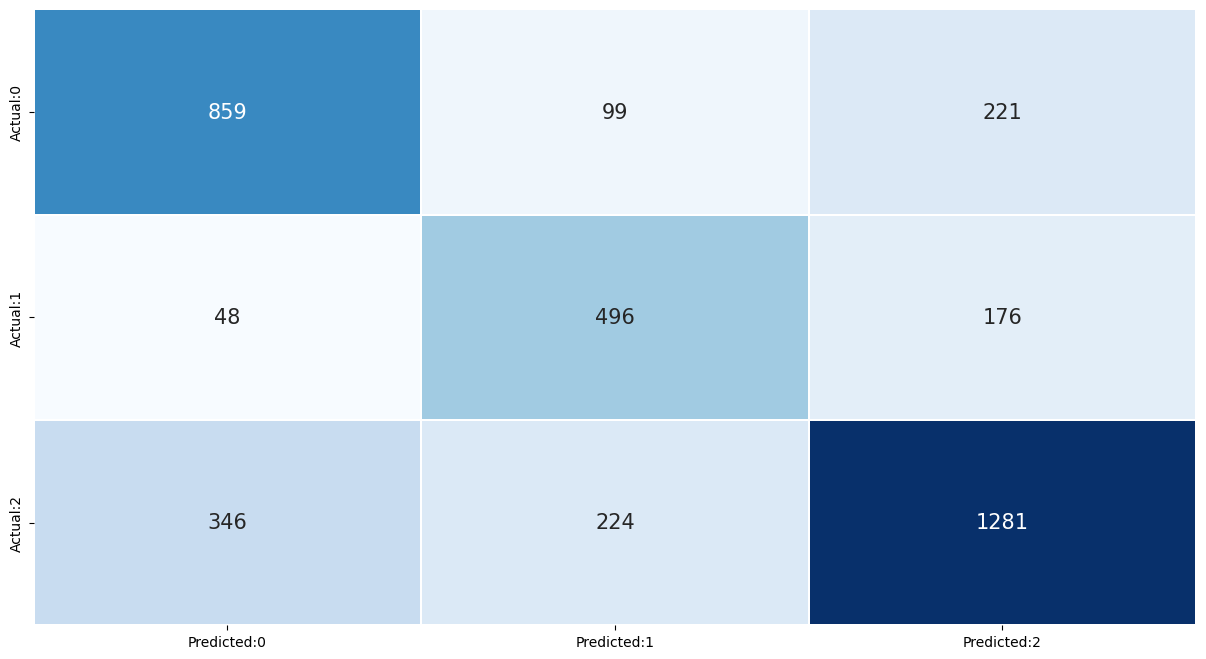

<Figure size 800x600 with 0 Axes>

array([[ 859,   99,  221],
       [  48,  496,  176],
       [ 346,  224, 1281]], dtype=int64)

In [158]:
DT = DecisionTreeClassifier(max_depth=3, random_state=34)
ada_boost_gs1 = AdaBoostClassifier(base_estimator=DT, learning_rate=0.1, n_estimators=50)
ada_model_gs1 = ada_boost_gs1.fit(scaled_xtrain, y_train)
ada_ypred_gs1 = ada_model_gs1.predict(scaled_xtest)
print (classification_report(y_test, ada_ypred_gs1 ))

accuracy = accuracy_score(y_test, ada_ypred_gs1)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(y_test, ada_ypred_gs1)

confusion_matrix(y_test, ada_ypred_gs1)

**Classification Report Interpretation:**

- **Precision (the ability of the classifier not to label a sample as positive if it is negative):**
  - Class 0: 69% of instances predicted as class 0.
  - Class 1: 61% of instances predicted as class 1.
  - Class 2: 76% of instances predicted as class 2.

- **Recall (the ability of the classifier to find all the positive samples):**
  - Class 0: The model correctly identified 73% of all actual class 0 instances.
  - Class 1: The model correctly identified 69% of all actual class 1 instances.
  - Class 2: The model correctly identified 69% of all actual class 2 instances.

- **F1-score (a weighted harmonic mean of precision and recall; the best value is 1 and the worst is 0):**
  - Class 0: The F1-score is 0.71, indicating a good balance between precision and recall for class 0.
  - Class 1: The F1-score is 0.64, suggesting a balanced performance for class 1.
  - Class 2: The F1-score is 0.73, which is relatively high, indicating a good balance between precision and recall for class 2.

- **Support indicates the number of actual occurrences of each class in the test set:**
  - Class 0: 1179 instances.
  - Class 1: 720 instances.
  - Class 2: 1851 instances.

- **Accuracy:** Overall, the model correctly predicted 70.29% of all cases.

- **Macro Avg:** The average precision, recall, and F1-score for the model without taking class imbalance into account are 68%, 70%, and 69%, respectively.

- **Weighted Avg:** When considering class imbalance, the average precision, recall, and F1-score are 71%, 70%, and 70%, respectively.

**Confusion Matrix Interpretation:**

- **Class 0:** Correctly predicted 859 times, but there were 99 false positives where class 1 was predicted instead of class 0, and 221 false negatives where class 2 was predicted instead of class 0.
- **Class 1:** Correctly predicted 496 times, with 48 instances incorrectly predicted as class 0 and 176 instances incorrectly as class 2.
- **Class 2:** This class has the highest number of correct predictions at 1281 with false positives of 224 for class 0 and 346 for class 1.

***Summary:*** The model performs well, with a good balance between precision and recall for all classes. The accuracy of 70.29% indicates that the model is effective, and further optimization or the use of a more sophisticated model may enhance its predictive performance.


### 12.6 Gradient Boosting Classifier Evaluation:

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1179
           1       0.61      0.74      0.67       720
           2       0.78      0.71      0.74      1851

    accuracy                           0.72      3750
   macro avg       0.70      0.73      0.71      3750
weighted avg       0.73      0.72      0.72      3750

Accuracy: 0.7197333333333333


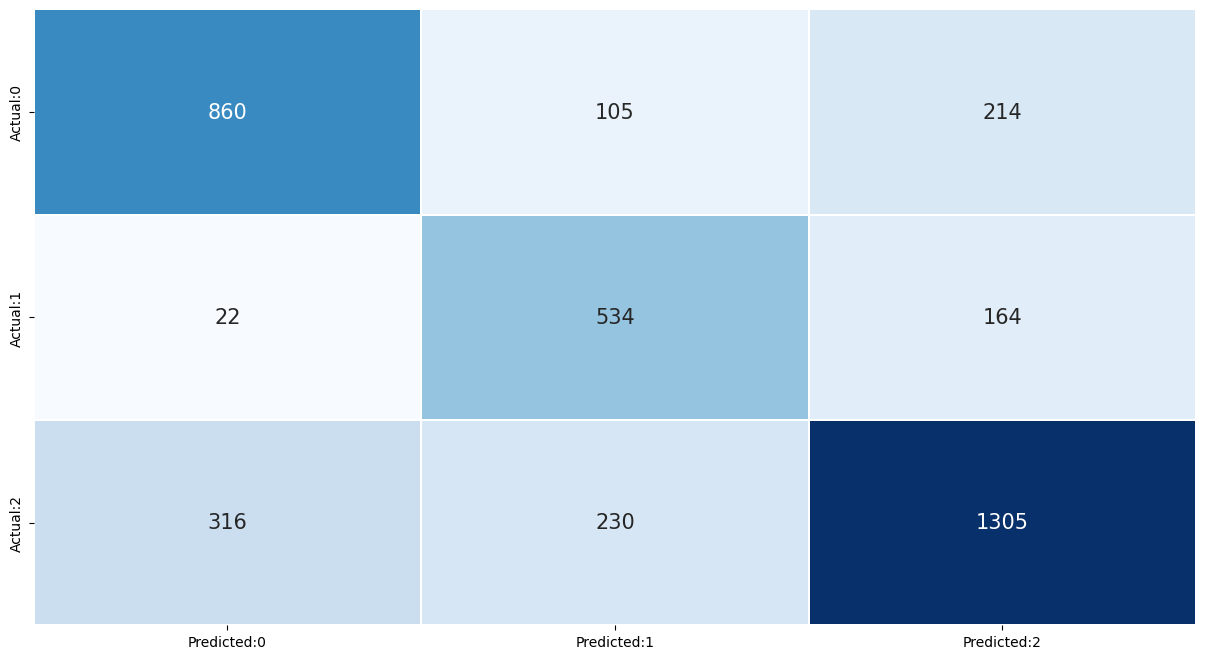

<Figure size 800x600 with 0 Axes>

array([[ 860,  105,  214],
       [  22,  534,  164],
       [ 316,  230, 1305]], dtype=int64)

In [143]:
gb = GradientBoostingClassifier(random_state=34)
gb_model = gb.fit(scaled_xtrain, y_train)
gb_ypred = gb_model.predict(scaled_xtest)
print(classification_report(y_test, gb_ypred))

accuracy = accuracy_score(y_test, gb_ypred)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(y_test, gb_ypred)

confusion_matrix(y_test, gb_ypred)

**Classification Report Interpretation:**

- **Precision (the ability of the classifier not to label a sample as positive if it is negative):**
  - Class 0: 72% of instances predicted as class 0.
  - Class 1: 61% of instances predicted as class 1.
  - Class 2: 78% of instances predicted as class 2.

- **Recall (the ability of the classifier to find all the positive samples):**
  - Class 0: The model correctly identified 73% of all actual class 0 instances.
  - Class 1: The model correctly identified 74% of all actual class 1 instances.
  - Class 2: The model correctly identified 71% of all actual class 2 instances.

- **F1-score (a weighted harmonic mean of precision and recall; the best value is 1 and the worst is 0):**
  - Class 0: The F1-score is 0.72, indicating a good balance between precision and recall for class 0.
  - Class 1: The F1-score is 0.67, suggesting a balanced performance for class 1.
  - Class 2: The F1-score is 0.74, which is relatively high, indicating a good balance between precision and recall for class 2.

- **Support indicates the number of actual occurrences of each class in the test set:**
  - Class 0: 1179 instances.
  - Class 1: 720 instances.
  - Class 2: 1851 instances.

- **Accuracy:** Overall, the model correctly predicted 71.97% of all cases.

- **Macro Avg:** The average precision, recall, and F1-score for the model without taking class imbalance into account are 70%, 73%, and 71%, respectively.

- **Weighted Avg:** When considering class imbalance, the average precision, recall, and F1-score are 73%, 72%, and 72%, respectively.

**Confusion Matrix Interpretation:**

- **Class 0:** Correctly predicted 860 times, but there were 105 false positives where class 1 was predicted instead of class 0, and 214 false negatives where class 2 was predicted instead of class 0.
- **Class 1:** Correctly predicted 534 times, with 22 instances incorrectly predicted as class 0 and 164 instances incorrectly as class 2.
- **Class 2:** This class has the highest number of correct predictions at 1305 with false positives of 230 for class 0 and 316 for class 1.

***Summary:***
The model performs well, with a good balance between precision and recall for all classes. The accuracy of 71.97% indicates that the model is effective, and further optimization or the use of a more sophisticated model may enhance its predictive performance.


### Gradient Boosting Classifier with SMOTE Oversampling: 

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1179
           1       0.61      0.74      0.67       720
           2       0.78      0.71      0.74      1851

    accuracy                           0.72      3750
   macro avg       0.70      0.73      0.71      3750
weighted avg       0.73      0.72      0.72      3750

Accuracy: 0.7197333333333333


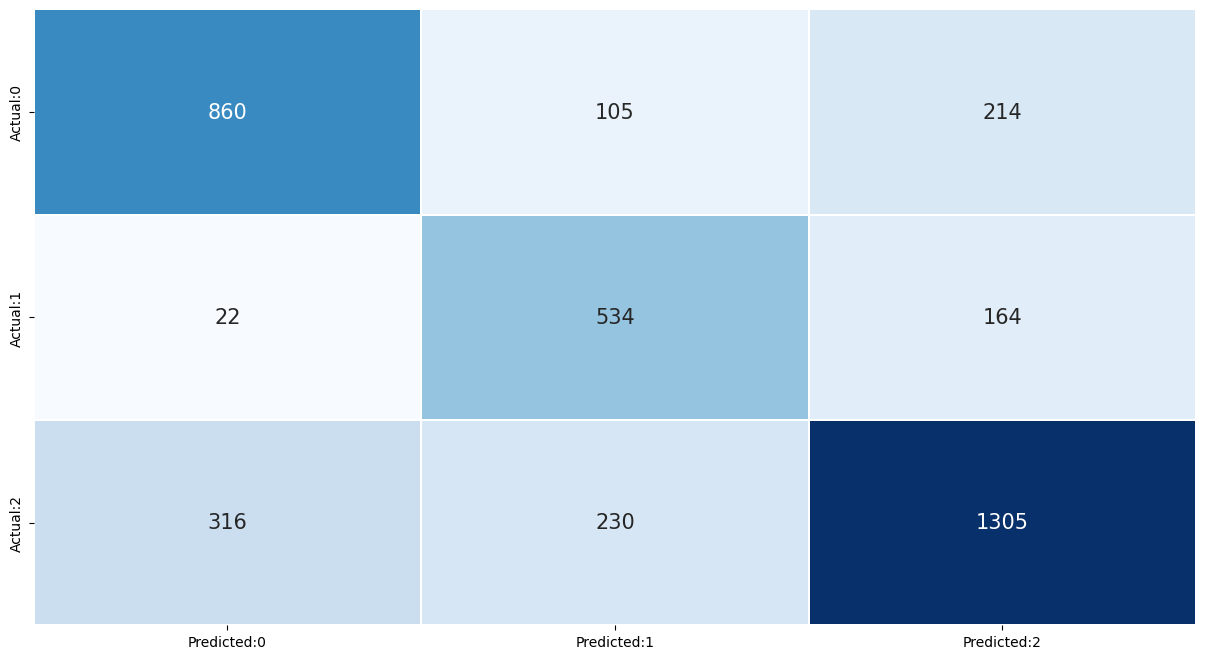

<Figure size 800x600 with 0 Axes>

array([[ 860,  105,  214],
       [  22,  534,  164],
       [ 316,  230, 1305]], dtype=int64)

In [145]:
gb = GradientBoostingClassifier(random_state=34)
gb_model_smote = gb.fit(xtrain_smote, ytrain_smote)
gb_ypred_smote = gb_model.predict(scaled_xtest)
print(classification_report(y_test, gb_ypred_smote))

accuracy = accuracy_score(y_test, gb_ypred_smote)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(y_test, gb_ypred_smote)

confusion_matrix(y_test, gb_ypred_smote)

**Interpretation:**
- The gradient boosting classifier, with an accuracy of 72%, demonstrates balanced performance across precision, recall, and F1-score metrics.
- Class 0 shows a decent balance between precision and recall (F1-score: 0.72), indicating reliable predictions.
- Class 1 has a lower F1-score (0.67), suggesting a trade-off between precision and recall.
- Class 2 exhibits a strong F1-score (0.74), demonstrating good precision and recall balance.

### 12.7 Stacking Classifier

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1179
           1       0.57      0.83      0.67       720
           2       0.84      0.62      0.71      1851

    accuracy                           0.71      3750
   macro avg       0.70      0.74      0.71      3750
weighted avg       0.74      0.71      0.71      3750

Accuracy: 0.7088


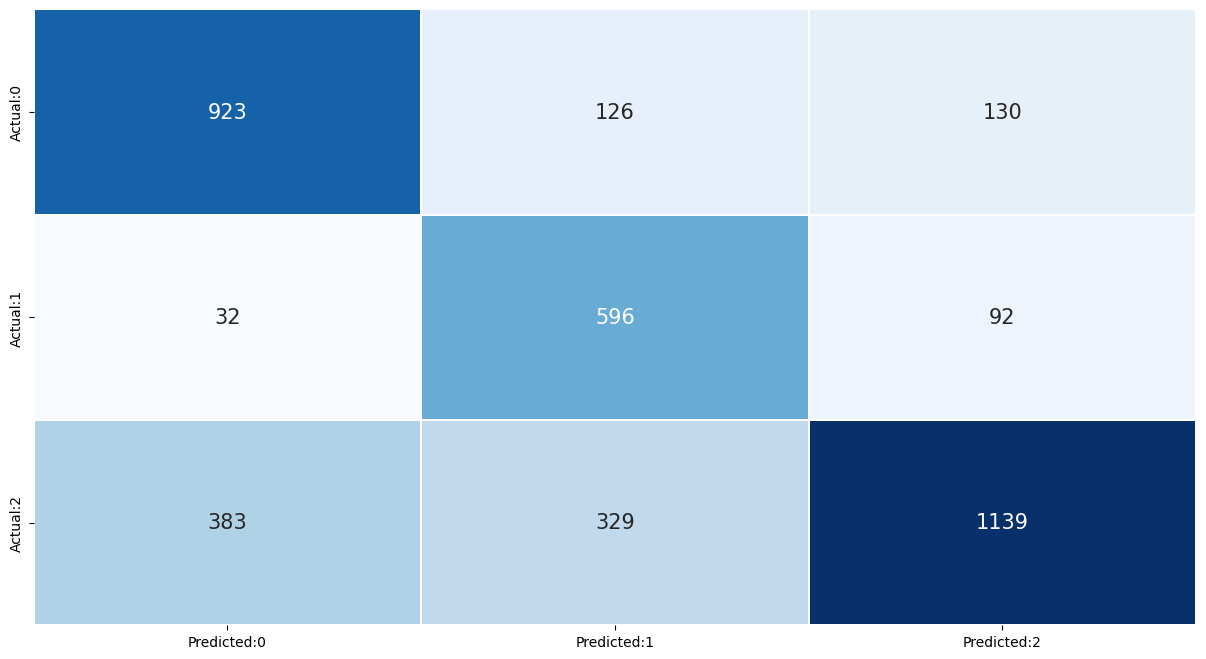

<Figure size 800x600 with 0 Axes>

array([[ 923,  126,  130],
       [  32,  596,   92],
       [ 383,  329, 1139]], dtype=int64)

In [148]:
knn = KNeighborsClassifier()
DT = DecisionTreeClassifier(random_state=34)
RF = RandomForestClassifier(random_state=34)
AB = AdaBoostClassifier(random_state=34)

models = [("knn", knn), ("DT", DT), ("RF", RF)]
SC = StackingClassifier(estimators =models, final_estimator = AB )
SC_model = SC.fit(scaled_xtrain, y_train)
SC_ypred = SC_model.predict(scaled_xtest)
print(classification_report(y_test, SC_ypred))

accuracy = accuracy_score(y_test, SC_ypred)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(y_test, SC_ypred)

confusion_matrix(y_test, SC_ypred)

**Classification Report Interpretation:**

- **Precision (the ability of the classifier not to label a sample as positive if it is negative):**
  - Class 0: 69% of instances predicted as class 0.
  - Class 1: 57% of instances predicted as class 1.
  - Class 2: 84% of instances predicted as class 2.

- **Recall (the ability of the classifier to find all the positive samples):**
  - Class 0: The model correctly identified 78% of all actual class 0 instances.
  - Class 1: The model correctly identified 83% of all actual class 1 instances.
  - Class 2: The model correctly identified 62% of all actual class 2 instances.

- **F1-score (a weighted harmonic mean of precision and recall; the best value is 1 and the worst is 0):**
  - Class 0: The F1-score is 0.73, indicating a good balance between precision and recall for class 0.
  - Class 1: The F1-score is 0.67, suggesting a balanced performance for class 1.
  - Class 2: The F1-score is 0.71, which is relatively high, indicating a good balance between precision and recall for class 2.

- **Support indicates the number of actual occurrences of each class in the test set:**
  - Class 0: 1179 instances.
  - Class 1: 720 instances.
  - Class 2: 1851 instances.

- **Accuracy:** Overall, the model correctly predicted 70.88% of all cases.

- **Macro Avg:** The average precision, recall, and F1-score for the model without taking class imbalance into account are 70%, 74%, and 71%, respectively.

- **Weighted Avg:** When considering class imbalance, the average precision, recall, and F1-score are 74%, 71%, and 71%, respectively.

**Confusion Matrix Interpretation:**

- **Class 0:** Correctly predicted 923 times, but there were 126 false positives where class 1 was predicted instead of class 0, and 130 false negatives where class 2 was predicted instead of class 0.
- **Class 1:** Correctly predicted 596 times, with 32 instances incorrectly predicted as class 0 and 92 instances incorrectly as class 2.
- **Class 2:** This class has the highest number of correct predictions at 1139 with false positives of 329 for class 0 and 383 for class 1.

***Summary:***
The model performs well, with a good balance between precision and recall for all classes. The accuracy of 70.88% indicates that the model is effective, and further optimization or the use of a more sophisticated model may enhance its predictive performance.


### 12.8 Voting Classifier

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      1179
           1       0.61      0.55      0.58       720
           2       0.70      0.72      0.71      1851

    accuracy                           0.67      3750
   macro avg       0.65      0.64      0.64      3750
weighted avg       0.66      0.67      0.66      3750

Accuracy: 0.6656


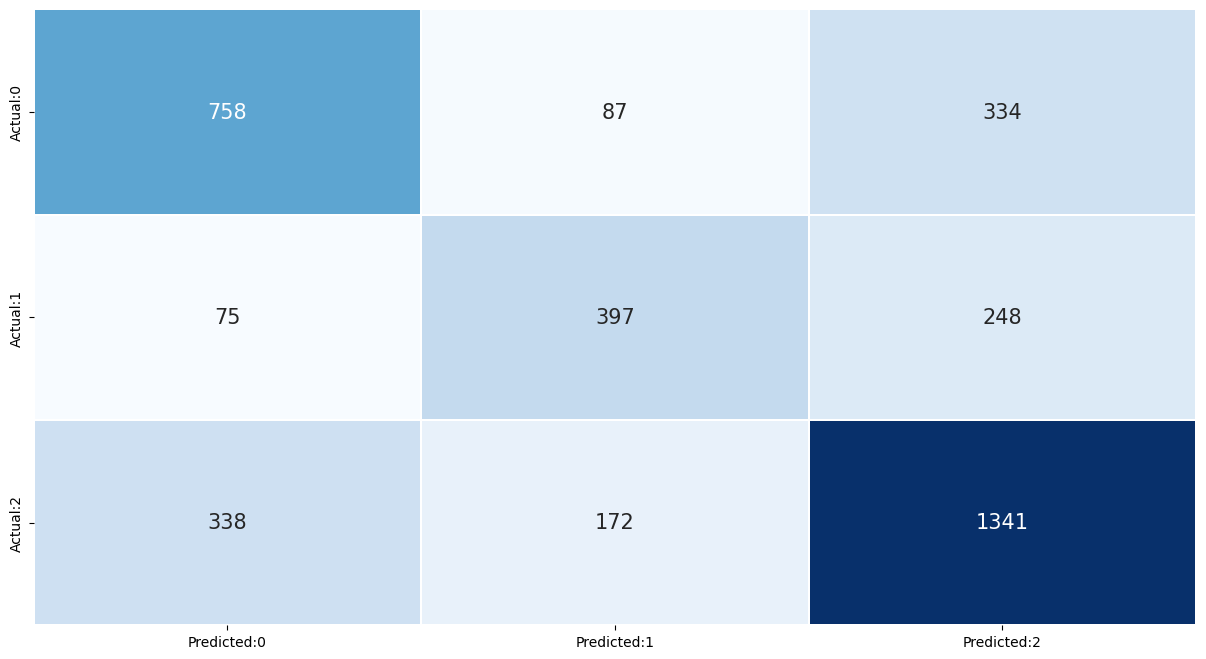

<Figure size 800x600 with 0 Axes>

array([[ 758,   87,  334],
       [  75,  397,  248],
       [ 338,  172, 1341]], dtype=int64)

In [149]:
knn = KNeighborsClassifier()
DT = DecisionTreeClassifier(random_state=34)
RF = RandomForestClassifier(random_state=34)
models = [("knn", knn), ("DT", DT), ("RF", RF)]

VC = VotingClassifier(estimators = models, voting="soft")
VC_model = VC.fit(scaled_xtrain, y_train)
VC_ypred = VC_model.predict(scaled_xtest)
print(classification_report(y_test, VC_ypred))

accuracy = accuracy_score(y_test, VC_ypred)
print(f"Accuracy: {accuracy}")

plot_confusion_matrix(y_test, VC_ypred)

confusion_matrix(y_test, VC_ypred)

**Classification Report Interpretation:**

- **Precision (the ability of the classifier not to label a sample as positive if it is negative):**
  - Class 0: 65% of instances predicted as class 0.
  - Class 1: 61% of instances predicted as class 1.
  - Class 2: 70% of instances predicted as class 2.

- **Recall (the ability of the classifier to find all the positive samples):**
  - Class 0: The model correctly identified 64% of all actual class 0 instances.
  - Class 1: The model correctly identified 55% of all actual class 1 instances.
  - Class 2: The model correctly identified 72% of all actual class 2 instances.

- **F1-score (a weighted harmonic mean of precision and recall; the best value is 1 and the worst is 0):**
  - Class 0: The F1-score is 0.65, indicating a good balance between precision and recall for class 0.
  - Class 1: The F1-score is 0.58, suggesting a relatively balanced performance for class 1.
  - Class 2: The F1-score is 0.71, which is relatively high, indicating a good balance between precision and recall for class 2.

- **Support indicates the number of actual occurrences of each class in the test set:**
  - Class 0: 1179 instances.
  - Class 1: 720 instances.
  - Class 2: 1851 instances.

- **Accuracy:** Overall, the model correctly predicted 66.56% of all cases.

- **Macro Avg:** The average precision, recall, and F1-score for the model without taking class imbalance into account are 65%, 64%, and 64%, respectively.

- **Weighted Avg:** When considering class imbalance, the average precision, recall, and F1-score are 66%, 67%, and 66%, respectively.

**Confusion Matrix Interpretation:**

- **Class 0:** Correctly predicted 758 times, but there were 87 false positives where class 1 was predicted instead of class 0, and 334 false negatives where class 2 was predicted instead of class 0.
- **Class 1:** Correctly predicted 397 times, with 75 instances incorrectly predicted as class 0 and 248 instances incorrectly as class 2.
- **Class 2:** This class has the highest number of correct predictions at 1341 with false positives of 172 for class 0 and 338 for class 1.

***Summary:***
The model performs reasonably well, with a good balance between precision and recall for class 0 and class 2. The accuracy of 66.56% indicates that the model is moderately effective, and further optimization or the use of a more sophisticated model may enhance its predictive performance.


# 13. Multiclass ROC-AUC Curve for RandomForest Classifier

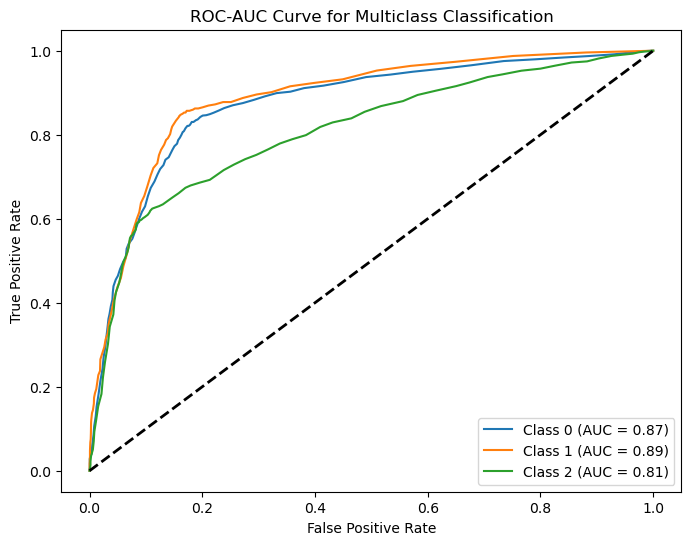

In [150]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Assuming RandomForestClassifier, modify based on your model
model = RandomForestClassifier(n_estimators=100, random_state=42)
classifier = OneVsRestClassifier(model)

# Binarize the target labels for both training and testing sets
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))  # Use the classes from the training set

# Train the classifier
classifier.fit(x_train, y_train_bin)

# Get decision function scores
y_score = classifier.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

**AUC Values:**
The AUC values are provided in the legend for each class. AUC can range from 0 to 1, where 1 indicates perfect classification, and 0.5 indicates no discriminative power.

- Class 0: AUC = 0.87, which means there is an 87% chance that the model will correctly distinguish between class 0 and not class 0.

- Class 1: AUC = 0.89, indicating a slightly better performance than class 0, with an 89% chance of correctly distinguishing class 1 from the other classes.

- Class 2: AUC = 0.81, which suggests the model is less effective at distinguishing class 2 from not class 2 compared to the other classes but still performs well above random chance.

**Overall Interpretation:**

The curves are all above the diagonal line, indicating that the model has a good level of discrimination for all classes.
None of the curves intersect with the diagonal, reinforcing that the model performs significantly better than a random guess.

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
Class 1 has the highest AUC, which suggests that the model is most accurate in distinguishing instances of class 1 from the other classes.

Class 2 has the lowest AUC, which might indicate some challenges the model faces in classifying instances of class 2 accurately.

There is a convergence of the curves at the lower left corner, indicating that the model has a high true positive rate at low false positive rates for all classes, which is desirable.

**Practical Implications:**

The model is likely to be useful in a practical setting, given its ability to discriminate between classes.
However, improvements could be made, especially for class 2, to further enhance model performance.
Depending on the application, one might prioritize improving the precision or recall for certain classes, especially if the costs of false positives or false negatives are high.

# 13. Model Comparison:

In [172]:
from prettytable import PrettyTable

Table = PrettyTable(["Model","F1-Score"])

Table.add_row(["Base Model 1 - Logistic Regression" , "0.67"])
Table.add_row(["Base Model 2 - DecisionTreeCalssifie" , "0.62"])
Table.add_row(["Base Model 3 - KNN" , "0.63"])
Table.add_row(["Base Model 4 - Random Forest Classifier" , "0.71"])
Table.add_row(["Random forest top 20 features" , "0.71"])
Table.add_row(["RandomForestClassifier: Hyperparameter Tuning using RandomizedSearchCV 1" , "0.71"])
Table.add_row(["RandomForestClassifier: Hyperparameter Tuning using RandomizedSearchCV 2" , "0.72"])
Table.add_row(["Random Forest Classification with SMOTE Oversampling" , "0.72"])
Table.add_row(["AdaBoost Classifier" , "0.68"])
Table.add_row(["AdaBoost Classifier ith SMOTE Oversampling" , "0.68"])
Table.add_row(["AdaBoost Hyperparameter Tuning" , "0.70"])
Table.add_row(["Gradient Boosting Classifier" , "0.72"])
Table.add_row(["Gradient Boosting Classifier with SMOTE Oversampling" , "0.72"])
Table.add_row(["Stacking Classifier" , "0.71"])
Table.add_row(["Voting Classifier" , "0.66"]) 

Table.sortby = "F1-Score"
Table.reversesort = True
Table

Model,F1-Score
RandomForestClassifier: Hyperparameter Tuning using RandomizedSearchCV 2,0.72
Random Forest Classification with SMOTE Oversampling,0.72
Gradient Boosting Classifier with SMOTE Oversampling,0.72
Gradient Boosting Classifier,0.72
Stacking Classifier,0.71
RandomForestClassifier: Hyperparameter Tuning using RandomizedSearchCV 1,0.71
Random forest top 20 features,0.71
Base Model 4 - Random Forest Classifier,0.71
AdaBoost Hyperparameter Tuning,0.70
AdaBoost Classifier ith SMOTE Oversampling,0.68


**The highest F1-scores are achieved by the models:**
- "RandomForestClassifier: Hyperparameter Tuning using RandomizedSearchCV 2" with an F1-score of 0.72.
- "Gradient Boosting Classifier" with an F1-score of 0.72.
- "Gradient Boosting Classifier with SMOTE Oversampling" with an F1-score of 0.72.
- "Random Forest Classification with SMOTE Oversampling" with an F1-score of 0.72.

When multiple models achieve the same F1-score, it's a good practice to consider additional metrics and factors to make an informed decision on the final model. 

**Precision, Recall, and Accuracy:** Examine precision, recall, and accuracy for each class as well as overall. A model with balanced precision and recall, along with high accuracy, is generally preferable.

In [187]:
Table2 = PrettyTable(["Model", "precision","recall","F1-Score","Accuracy"])

Table2.add_row(["RandomForestClassifier: Hyperparameter Tuning using RandomizedSearchCV 2, class 0", "0.71","0.77","0.74", "71.65"])
Table2.add_row(["RandomForestClassifier: Hyperparameter Tuning using RandomizedSearchCV 2, class 1", "0.58" ,"0.79" , "0.67", "71.65"])
Table2.add_row(["RandomForestClassifier: Hyperparameter Tuning using RandomizedSearchCV 2, class 2", "0.81" , "0.66" ,"0.73", "71.65"])

Table2.add_row(["Gradient Boosting Classifier, class 0", "0.72"   ,   "0.73"  ,    "0.72", "71.97"])
Table2.add_row(["Gradient Boosting Classifier, class 1", "0.61"    ,  "0.74"    ,  "0.67", "71.97"])
Table2.add_row(["Gradient Boosting Classifier, class 2", "0.78"    ,  "0.71"   ,   "0.74" , "71.97"])

Table2.add_row(["Gradient Boosting Classifier with SMOTE Oversampling, class 0", "0.72"  ,    "0.73"   ,   "0.72", "71.97"])
Table2.add_row(["Gradient Boosting Classifier with SMOTE Oversampling, class 1","0.61"    ,  "0.74"     , "0.67", "71.97" ])
Table2.add_row(["Gradient Boosting Classifier with SMOTE Oversampling, class 2","0.78"    ,  "0.71"    , "0.7", "71.97"])

Table2.add_row(["Random Forest Classification with SMOTE Oversampling, class 0", "0.70"   ,   "0.78"    ,  "0.74", "71.41"])
Table2.add_row(["Random Forest Classification with SMOTE Oversampling, class 1", "0.57"   ,  "0.81"    ,  "0.67", "71.41"])
Table2.add_row(["Random Forest Classification with SMOTE Oversampling, class 2", "0.82"    ,  "0.64"     , "0.72", "71.41"])

Table2

Model,precision,recall,F1-Score,Accuracy
"RandomForestClassifier: Hyperparameter Tuning using RandomizedSearchCV 2, class 0",0.71,0.77,0.74,71.65
"RandomForestClassifier: Hyperparameter Tuning using RandomizedSearchCV 2, class 1",0.58,0.79,0.67,71.65
"RandomForestClassifier: Hyperparameter Tuning using RandomizedSearchCV 2, class 2",0.81,0.66,0.73,71.65
"Gradient Boosting Classifier, class 0",0.72,0.73,0.72,71.97
"Gradient Boosting Classifier, class 1",0.61,0.74,0.67,71.97
"Gradient Boosting Classifier, class 2",0.78,0.71,0.74,71.97
"Gradient Boosting Classifier with SMOTE Oversampling, class 0",0.72,0.73,0.72,71.97
"Gradient Boosting Classifier with SMOTE Oversampling, class 1",0.61,0.74,0.67,71.97
"Gradient Boosting Classifier with SMOTE Oversampling, class 2",0.78,0.71,0.7,71.97
"Random Forest Classification with SMOTE Oversampling, class 0",0.70,0.78,0.74,71.41


In [180]:
# Calculate overall F1-score for each model
overall_f1_scores = {
    "RandomForestClassifier_RS2": (0.74 + 0.67 + 0.73) / 3,
    "GradientBoostingClassifier": (0.72 + 0.67 + 0.74) / 3,
    "GradientBoosting_SMOTE": (0.72 + 0.67 + 0.7) / 3,
    "RandomForest_SMOTE": (0.74 + 0.67 + 0.72) / 3
}

# Find the model with the highest overall F1-score
best_model = max(overall_f1_scores, key=overall_f1_scores.get)
print("Best Model:", best_model)


Best Model: RandomForestClassifier_RS2


### Comparision with Confusion Matrix

In [189]:
models = ['Gradient Boosting with SMOTE', 'Gradient Boosting', 'Random Forest with SMOTE', 'Random Forest GS2']
predictions = [gb_ypred_smote, gb_ypred, RF_ypred_smote, RF_ypred_gs2]

for model, y_pred in zip(models, predictions):
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model}:\n{cm}")

Confusion Matrix for Gradient Boosting with SMOTE:
[[ 860  105  214]
 [  22  534  164]
 [ 316  230 1305]]
Confusion Matrix for Gradient Boosting:
[[ 860  105  214]
 [  22  534  164]
 [ 316  230 1305]]
Confusion Matrix for Random Forest with SMOTE:
[[ 920  128  131]
 [  20  581  119]
 [ 368  306 1177]]
Confusion Matrix for Random Forest GS2:
[[ 903  119  157]
 [  21  567  132]
 [ 347  287 1217]]


Here are some general observations:

- **Gradient Boosting with SMOTE and Gradient Boosting** have identical confusion matrices, suggesting that SMOTE did not change the prediction outcomes for this dataset. They have a relatively lower number of false negatives for class 1 but more false positives for class 2.

- **Random Forest with SMOTE** has the highest number of true positives for class 0, but at the cost of more false positives for classes 1 and 2. However, it has fewer false negatives for class 1.

- **Random Forest GS2** strikes a balance with a relatively lower number of false positives for class 0 and a higher number of true positives for class 1.

If the priority is to correctly predict class 0 and class 1, the **Random Forest with SMOTE** may be the best model. 

If the priority is to correctly predict class 1, **Random Forest GS2** looks favorable. 

The "best" model will depend on the specific costs associated with false positives and false negatives.

If all classes are equally important, **Random Forest GS2** seems to offer a good balance across all classes.

**Random Forest with SMOTE** model exhibits commendable balance, mitigating extreme errors in any single class. 
It manages to correctly predict more instances of class 1 while maintaining a moderate false positive rate for classes 0 and 2